In [10]:
import ROOT as r
import math
import array
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import pandas as pd

#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________
import ERROR
import CONFIG
import DBPARSE
from PXPY import *
from ASYMMETRY import *
from UTILITIES import *
from SIMFITS import DistributionFits
from ROOT import gStyle, TChain, TH1F, TCanvas, TLegend
import CORRECTIONS
import CALCULATE
import GETFF
from joblib import Parallel, delayed
import importlib
#importlib.reload(ASYMMETRY)

###############################################################################
###############################################################################

#NEEDS INELASTIC ASYMMETRY, NITROGEN CONTAMINATION, GRINCH CUTS, AND ERROR PROP

###############################################################################
###############################################################################





Pass="1"
config="3"

W2min=CONFIG.Function_JSON("W2min",f"../config/Pass{Pass}/cuts{config}.cfg")
W2max=CONFIG.Function_JSON("W2max",f"../config/Pass{Pass}/cuts{config}.cfg")
dxmin=CONFIG.Function_JSON("dxmin",f"../config/Pass{Pass}/cuts{config}.cfg")
dxmax=CONFIG.Function_JSON("dxmax",f"../config/Pass{Pass}/cuts{config}.cfg")
dymin=CONFIG.Function_JSON("dymin",f"../config/Pass{Pass}/cuts{config}.cfg")
dymax=CONFIG.Function_JSON("dymax",f"../config/Pass{Pass}/cuts{config}.cfg")
dybgmin=CONFIG.Function_JSON("dybgmin",f"../config/Pass{Pass}/cuts{config}.cfg")
dybgmax=CONFIG.Function_JSON("dybgmax",f"../config/Pass{Pass}/cuts{config}.cfg")
coinmin=CONFIG.Function_JSON("coinmin",f"../config/Pass{Pass}/cuts{config}.cfg")
coinmax=CONFIG.Function_JSON("coinmax",f"../config/Pass{Pass}/cuts{config}.cfg")
Q2=CONFIG.Function_JSON("Q2",f"../config/cuts{config}.cfg")

#  "dxmin"	: -0.481,
#  "dxmax"	: 0.498, old gen2


print(f'W2min: {W2min}')
print(f'W2max: {W2max}')
print(f'dxmin: {dxmin}')
print(f'dxmax: {dxmax}')
print(f'dymin: {dymin}')
print(f'dymax: {dymax}')
print(f'dybgmin: {dybgmin}')
print(f'dybgmax: {dybgmax}')
print(f'Q2: {Q2}')
print(f'Coin Min: {coinmin} Coin Max: {coinmax}')

#in GeV^2
m=.939565
muN=-1.9103
if config=="2":
    Q2=3
    tau=Q2/(4*m**2)
    theta=29.5*pi/180
if config=="3":
    Q2=6.83
    #Q2=6.62 #seans number
    tau=Q2/(4*m**2)
    theta=36.5*pi/180
if config=="4":
    Q2=9.82
    tau=Q2/(4*m**2)
    theta=35*pi/180

# Target Spin Direction

if config=="2":
    spintheta=59.34
    spinphi=1.84
if config=="3":
    spintheta=70.94
    spinphi=.51
if config=="4":
    spintheta=74.07
    spinphi=.55





fileNum=1
#generic=np.load(f"/media/research/TOSHIBA EXT/GEn/NumpyData/Pass{Pass}/GEN{config}/He3/generic{fileNum}.npz")
genericSim=np.load(f"/media/research/TOSHIBA EXT/GEn/NumpySim/GEN{config}/simulation0.npz")
genericSimIN=np.load(f"/media/research/TOSHIBA EXT/GEn/NumpySim/GEN{config}/insimulation0.npz")

print(genericSim.files)
print(genericSimIN.files)


dataTarget = pd.read_csv('../DB/ProcessedHe3Pol.csv')
dataBeam = pd.read_csv('../DB/ProcessedBeamPol.csv')
target_run_num = dataTarget['Run Number'].to_numpy()
target_pol = dataTarget['Polarization'].to_numpy()
target_polE=dataTarget['Error'].to_numpy()
beam_run_num = dataBeam['Run Number'].to_numpy()
beam_pol = dataBeam['Polarization'].to_numpy()
beam_polE=dataBeam['Error'].to_numpy()

genericMaster = {}
base_dir = f"/media/research/TOSHIBA EXT/GEn/NumpyData/Pass{Pass}/GEN{config}/He3"
i = 0
while os.path.exists(f"{base_dir}/generic{i}.npz"):
    file_path = f"{base_dir}/generic{i}.npz"
    data = np.load(file_path)

    for key in data.files:
        if key not in genericMaster:
            genericMaster[key] = data[key]
        else:
            genericMaster[key] = np.concatenate((genericMaster[key], data[key]))

    data.close()
    i += 1

print(f"Loaded {i} files into genericMaster.")


generic=genericMaster

W2min: -0.5
W2max: 1.7
dxmin: -0.4
dxmax: 0.4
dymin: -0.5
dymax: 0.5
dybgmin: -1.3
dybgmax: 1.2
Q2: 6.83
Coin Min: 88 Coin Max: 100
['nu', 'Q2', 'W2', 'vz', 'vx', 'vy', 'dx', 'dy', 'eSH', 'ePS', 'etheta', 'ephi', 'trP', 'fnucl', 'weight']
['nu', 'Q2', 'W2', 'vz', 'vx', 'vy', 'dx', 'dy', 'eSH', 'ePS', 'etheta', 'trP', 'fnucl', 'weight', 'mc_sig']
Loaded 13 files into genericMaster.


# Cuts

### Making the correct helicity

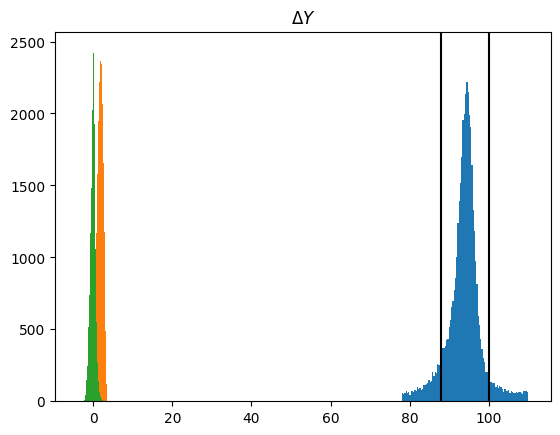

<Figure size 2000x1200 with 0 Axes>

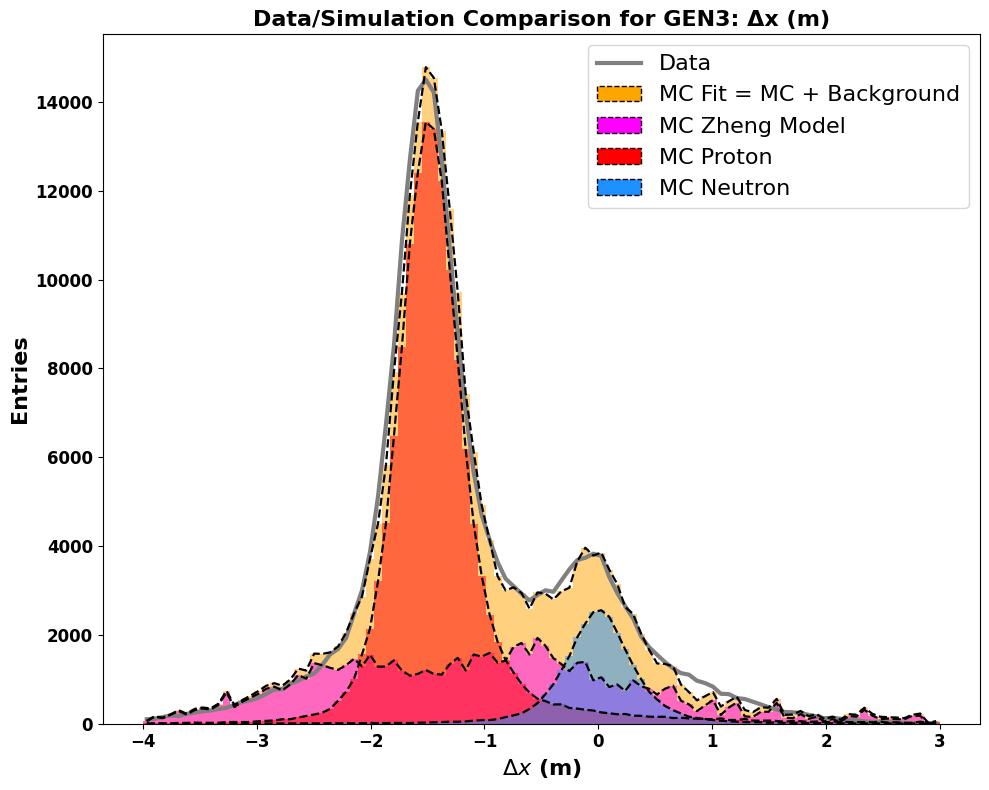

Total entries in fit: 243983.31360878627
χ² = 14620.14
ndf = 97
Reduced χ² = 150.72


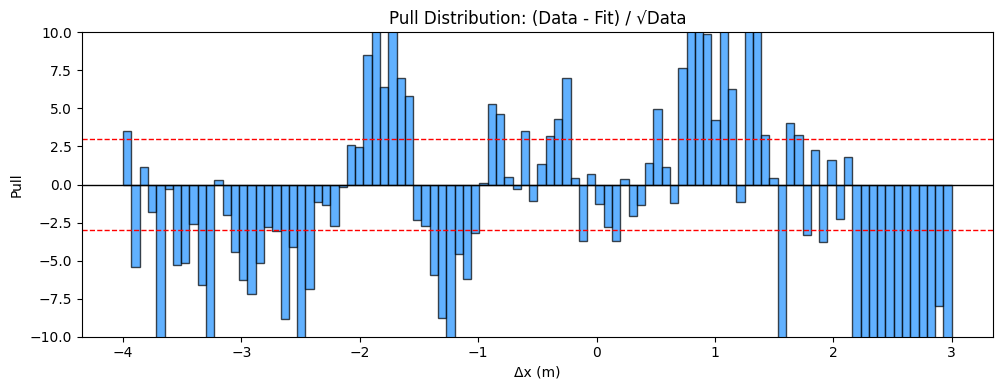

Total events in range (-0.4, 0.4):
  Sim Proton:   3458.48
  Sim Neutron:  21335.79
  Background:   13049.37
  Total:        37843.65
Fraction of events in range (-0.4, 0.4):
Proton Fraction: 0.09
Background Fraction: 0.34
Neutron Fraction: 0.56


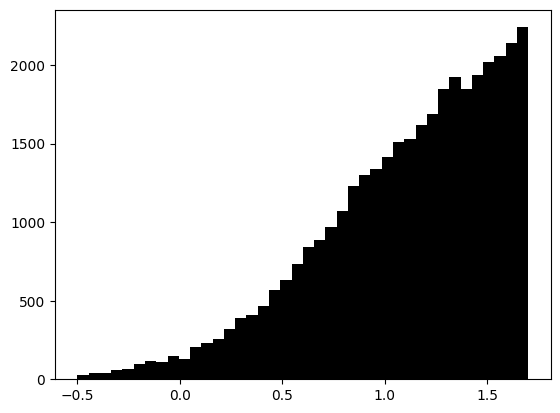

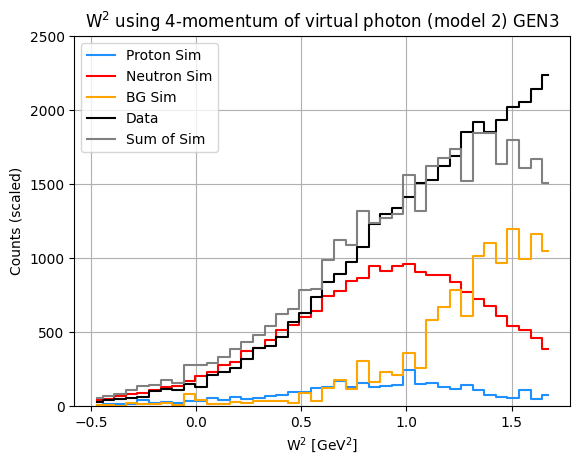

N_plus: 6780 N_minus: 6790
f_acc: 0.0633+=0.0014 A_acc: -0.000737+-0.0086
f_p: 0.0914+=0.0016 A_p: 0.0000192
N_plus: 18323 N_minus: 17524
A_raw: 0.0223+=0.0053
A_phys_weighted_avg: 0.17993+-0.04217+-0.02519
Combined Error: 0.04912
epsilon = 0.6214947260728597
tau_avg = 1.8819136655086781
Q2 = 6.6231617884632685
Px: 0.9917 Pz: -0.0316
A = 0.05942 ± 0.01622
B = 0.49586 (no propagated error)
C = 0.15519 ± 0.04912
GEn/GMn*muN: 0.62215+--0.20538


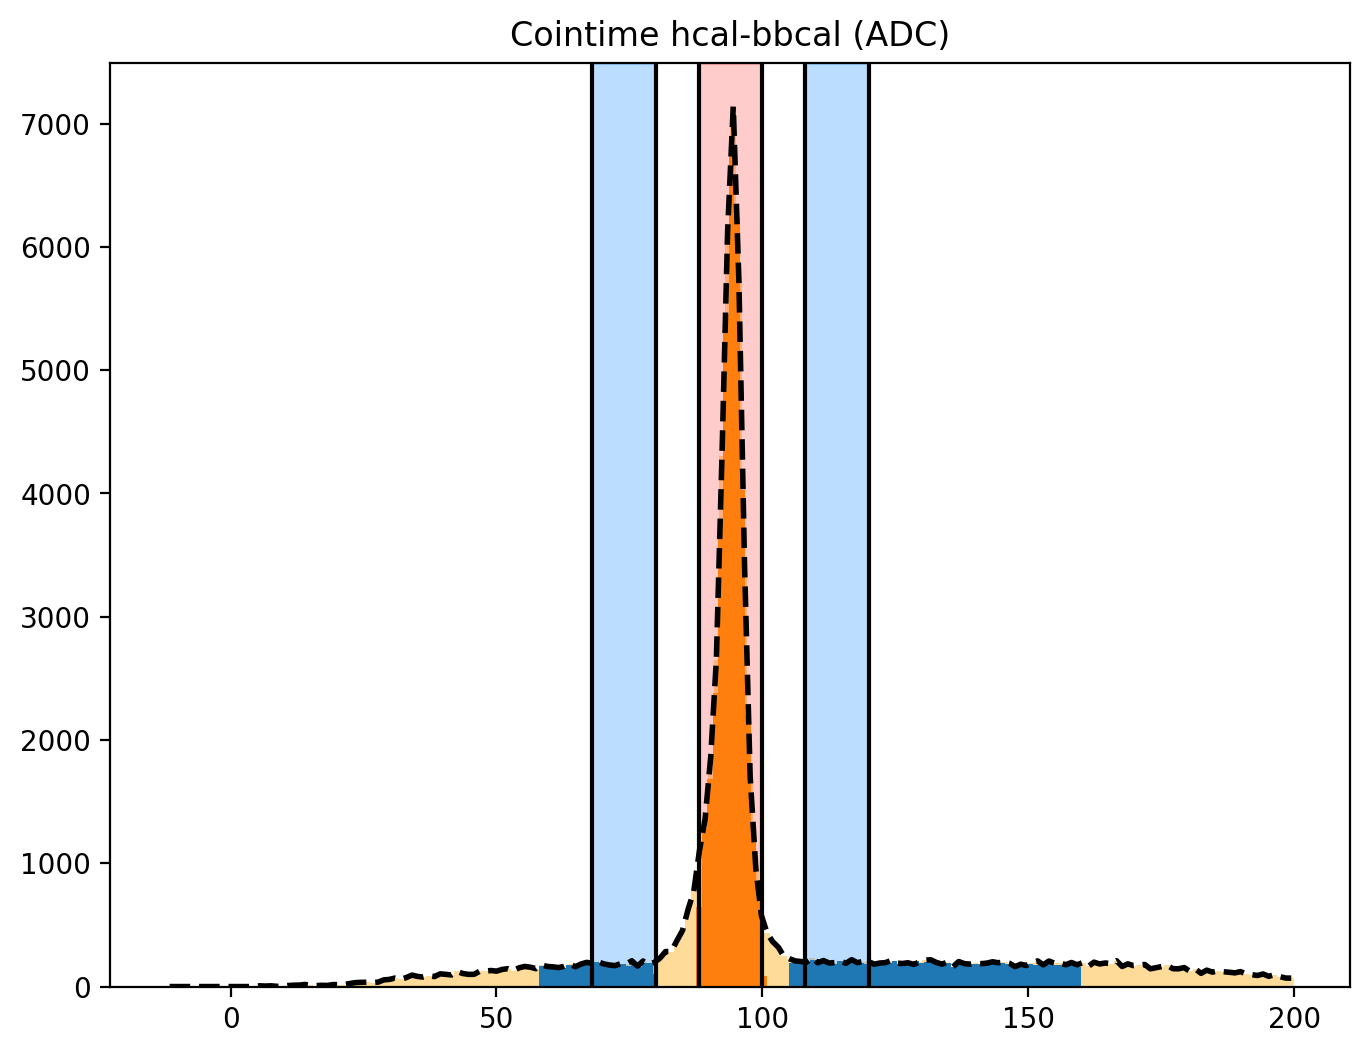

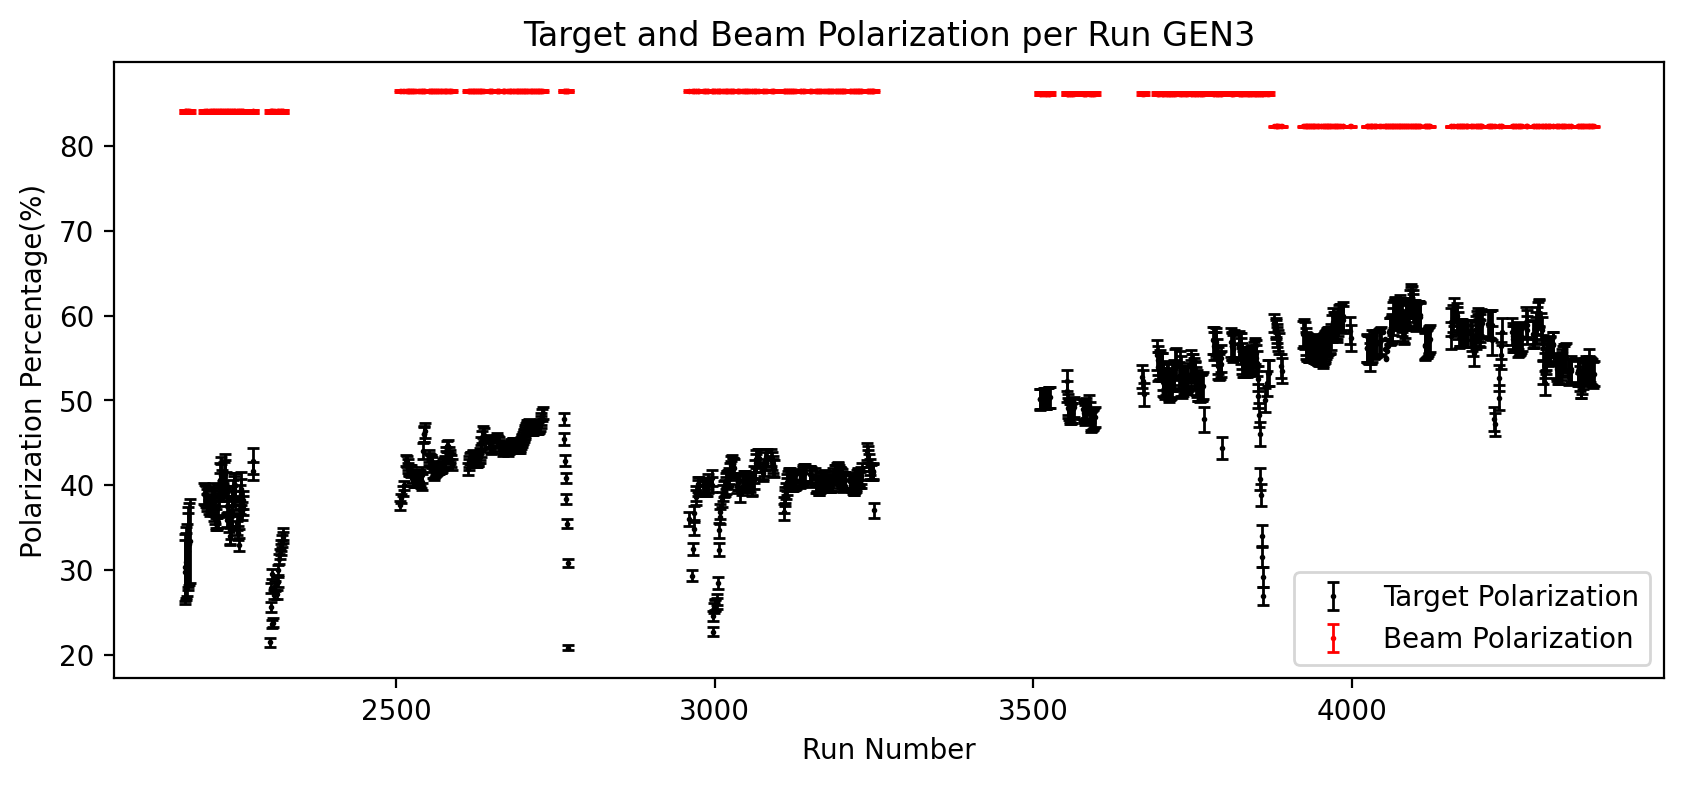

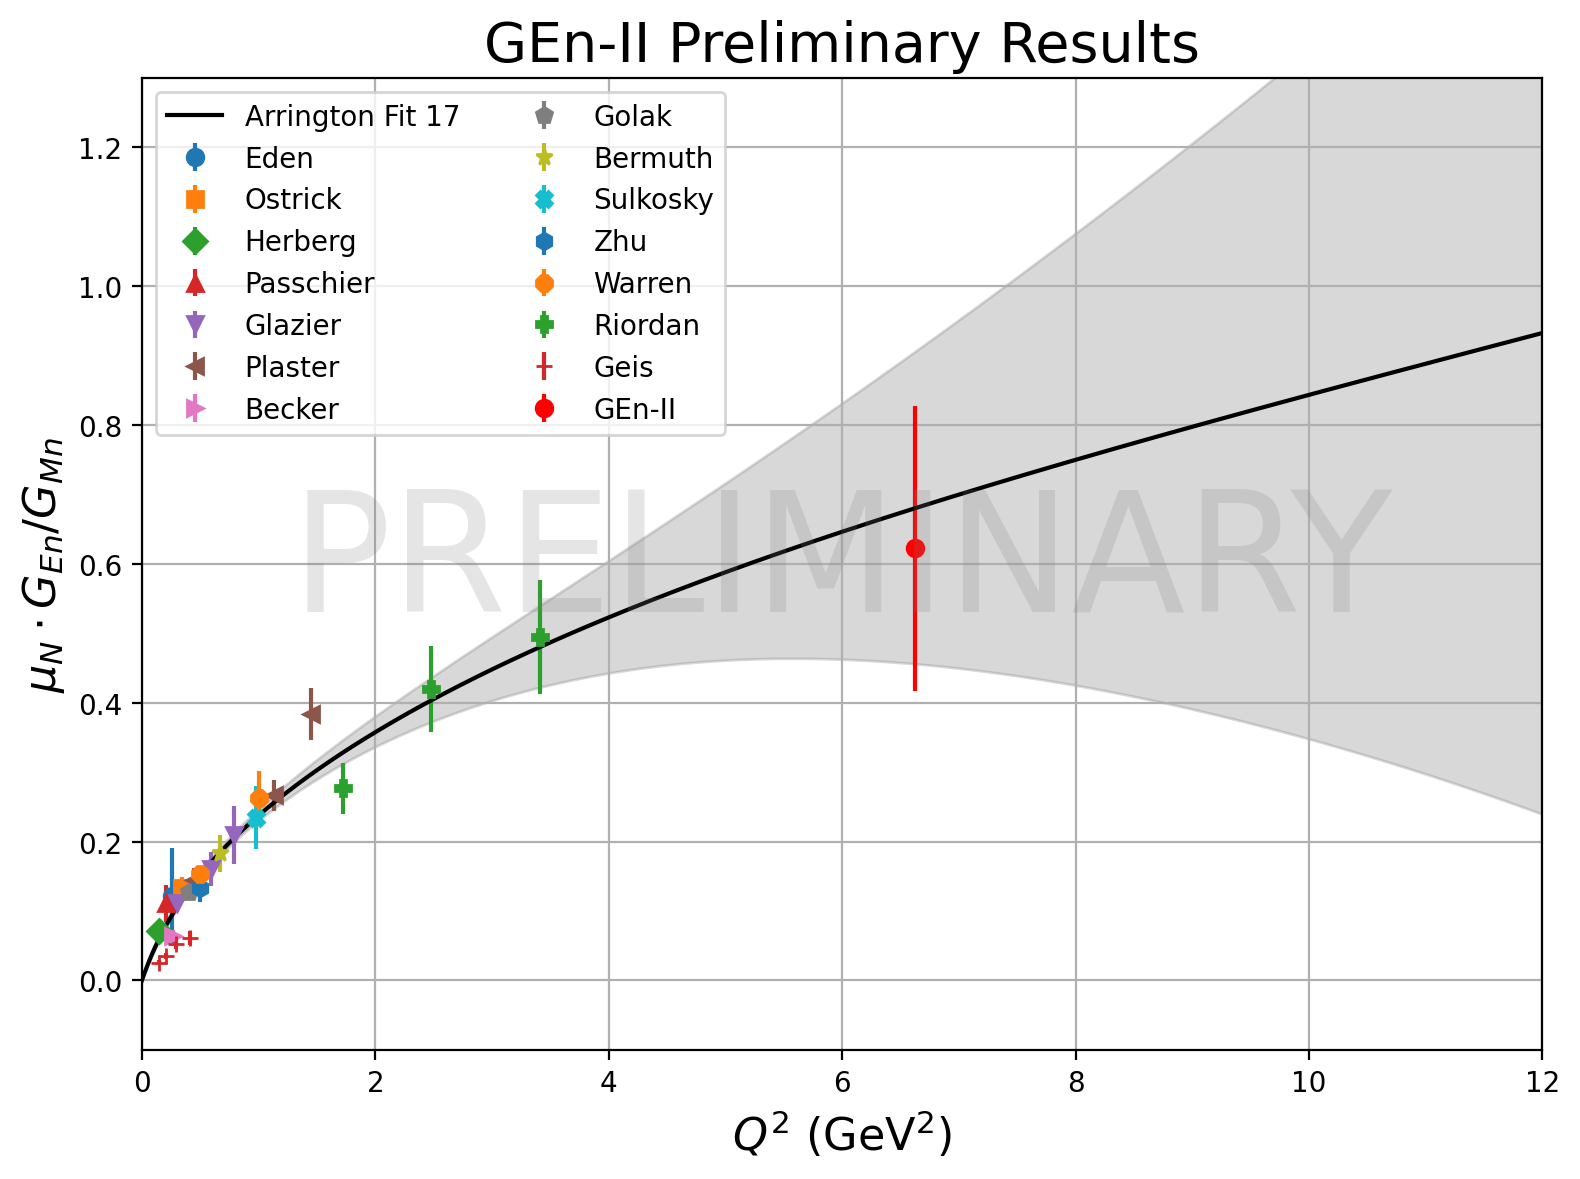

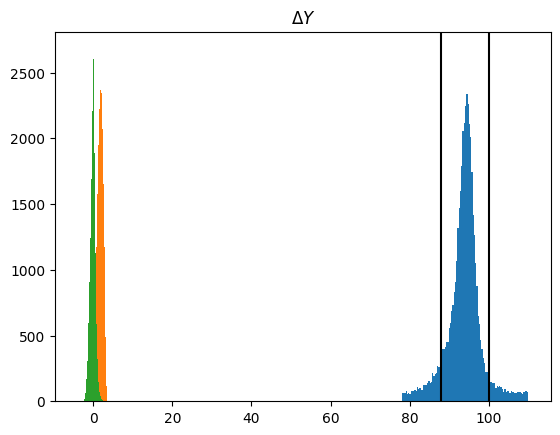

<Figure size 2000x1200 with 0 Axes>

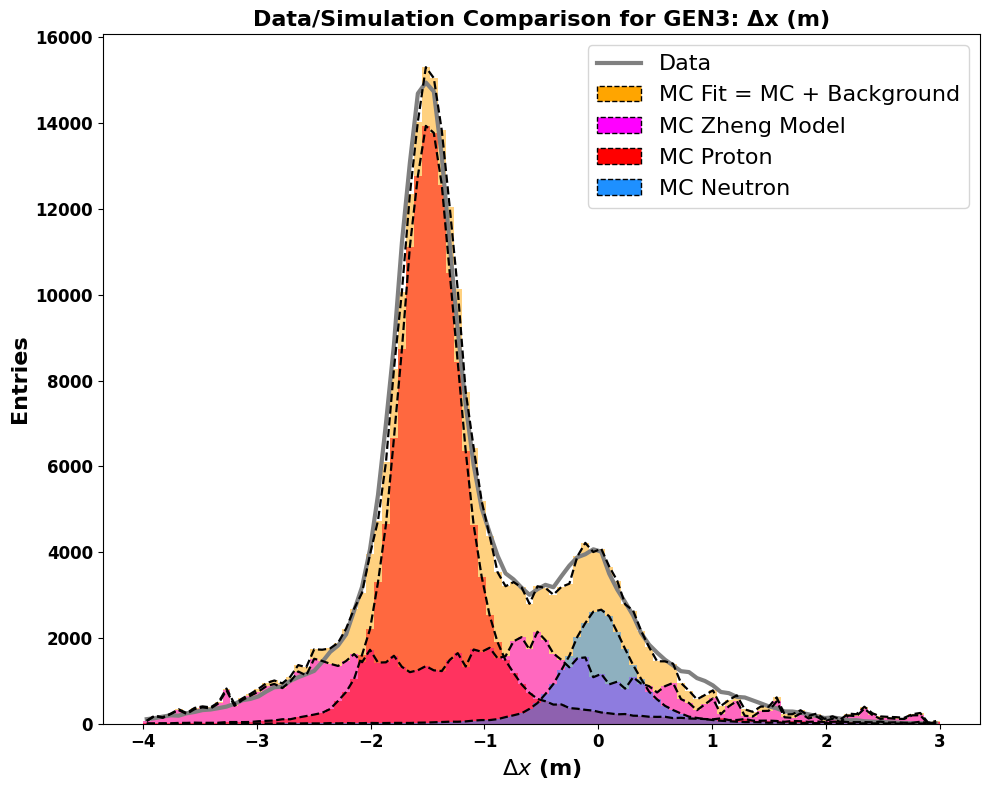

Total entries in fit: 257526.59751423096
χ² = 16742.55
ndf = 97
Reduced χ² = 172.60


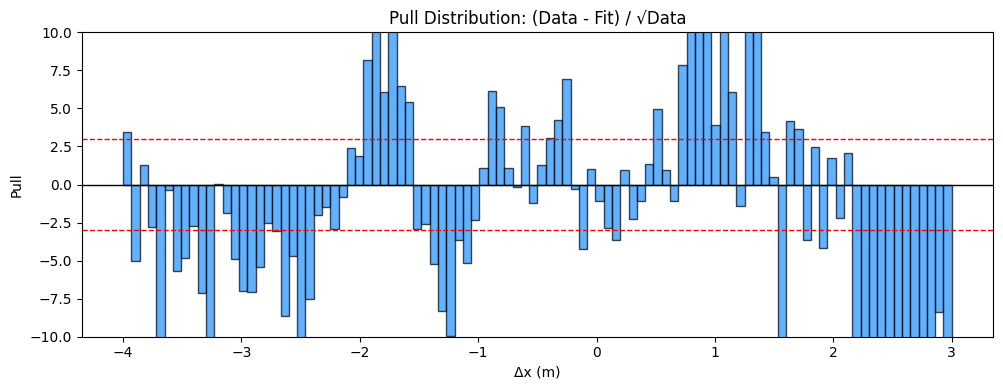

Total events in range (-0.4, 0.4):
  Sim Proton:   3558.29
  Sim Neutron:  22195.40
  Background:   14492.12
  Total:        40245.81
Fraction of events in range (-0.4, 0.4):
Proton Fraction: 0.09
Background Fraction: 0.36
Neutron Fraction: 0.55


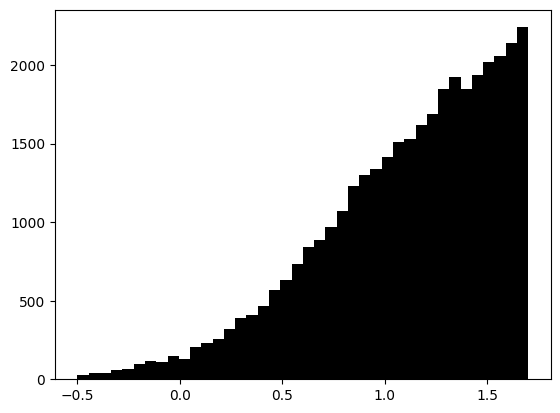

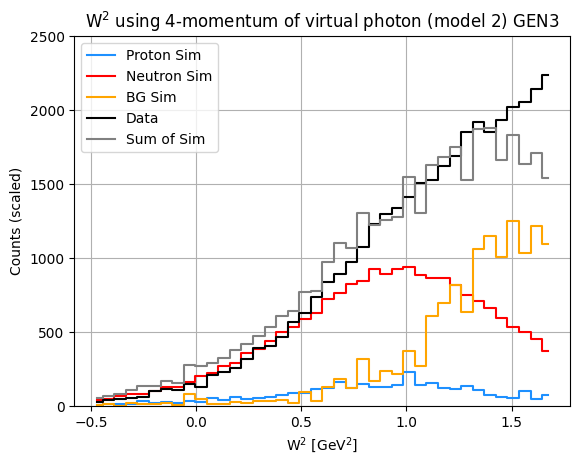

N_plus: 7378 N_minus: 7389
f_acc: 0.0648+=0.0013 A_acc: -0.000745+-0.0082
f_p: 0.0884+=0.0015 A_p: 0.0000192
N_plus: 19090 N_minus: 19004
A_raw: 0.0023+=0.0051
A_phys_weighted_avg: 0.02285+-0.04232+-0.00553
Combined Error: 0.04268
epsilon = 0.6225227133696667
tau_avg = 1.874913264549242
Q2 = 6.598524745336252
Px: 0.9917 Pz: -0.0303
A = 0.00759 ± 0.01417
B = 0.49651 (no propagated error)
C = -0.00089 ± 0.04268
GEn/GMn*muN: -0.00344+--0.16421


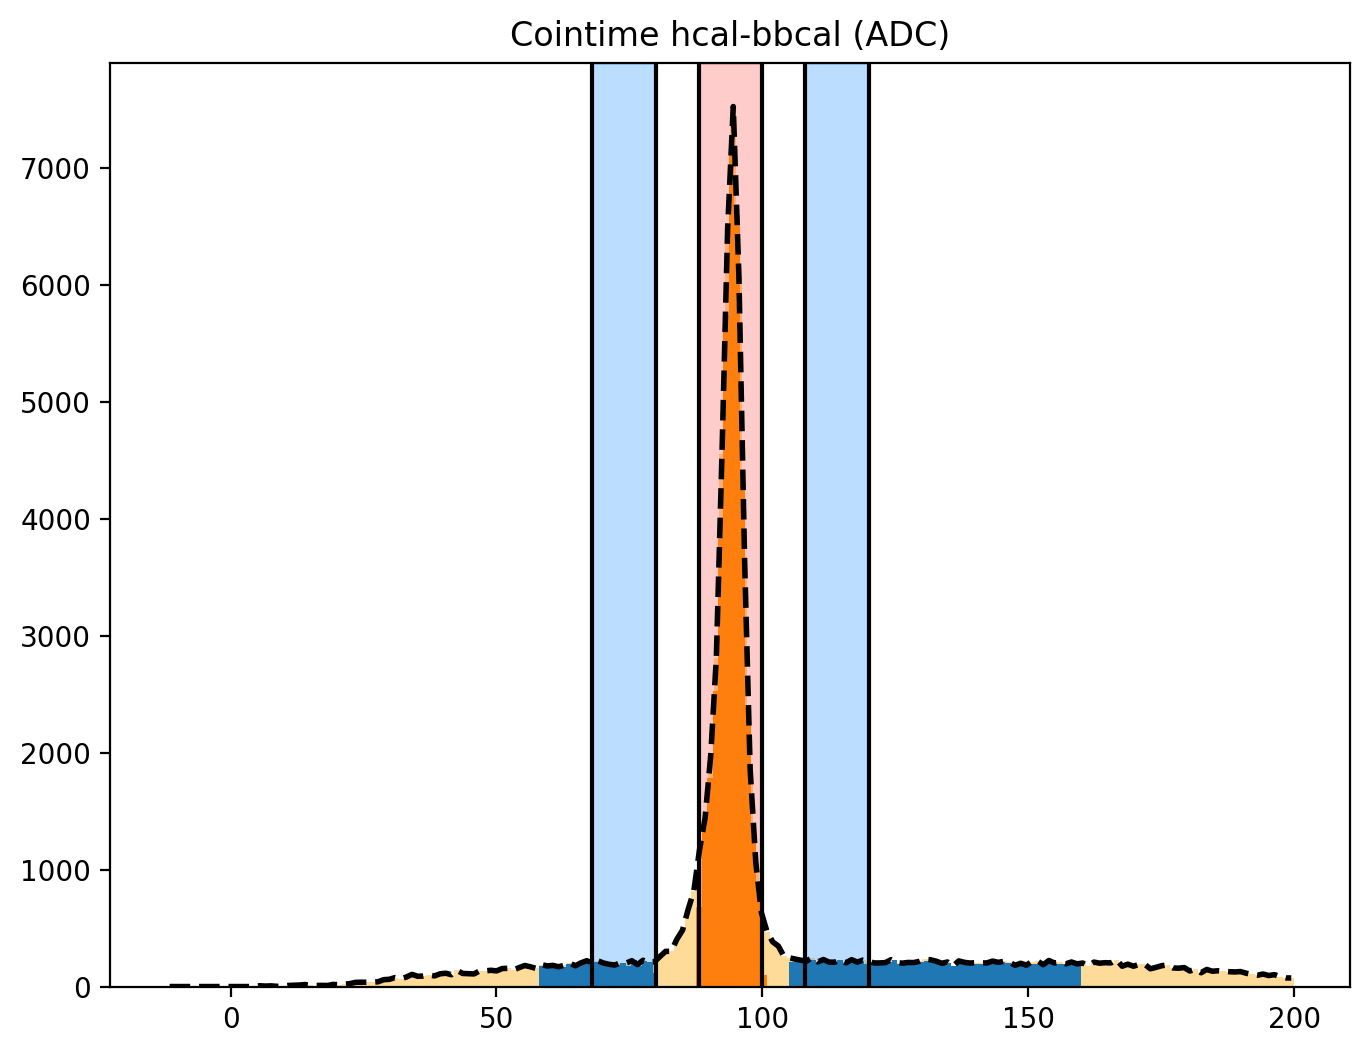

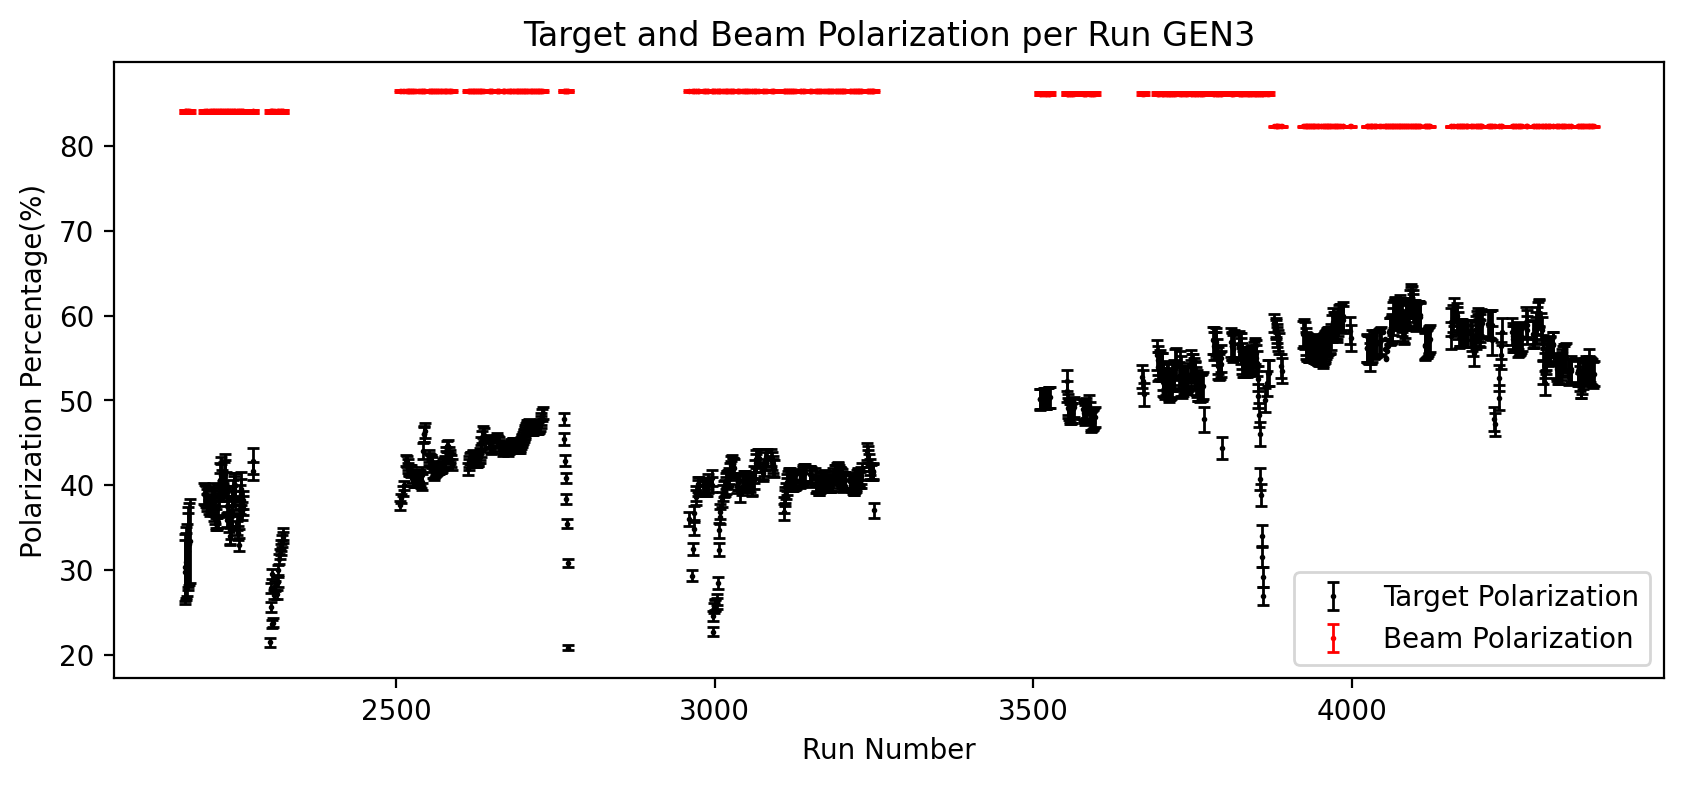

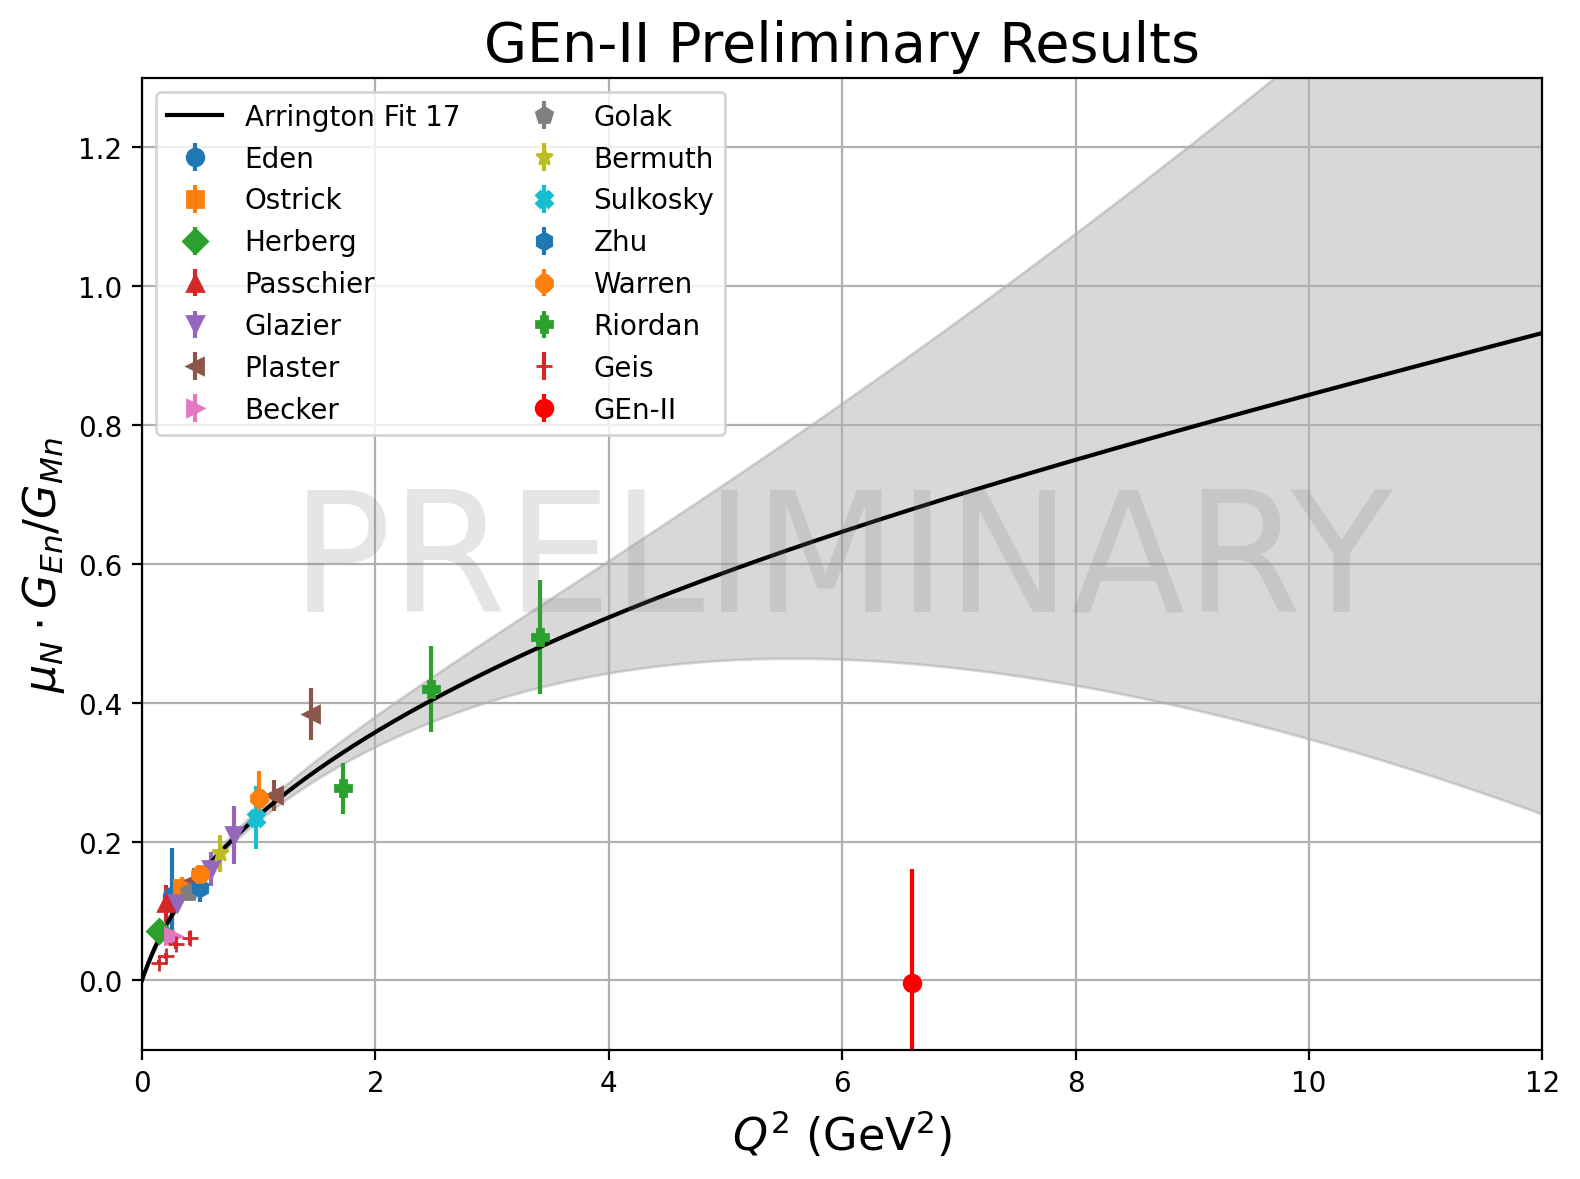

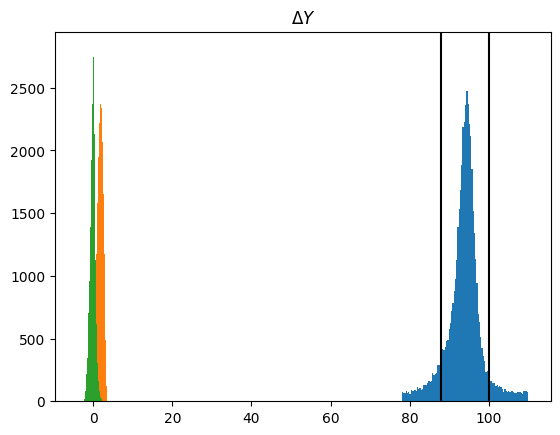

<Figure size 2000x1200 with 0 Axes>

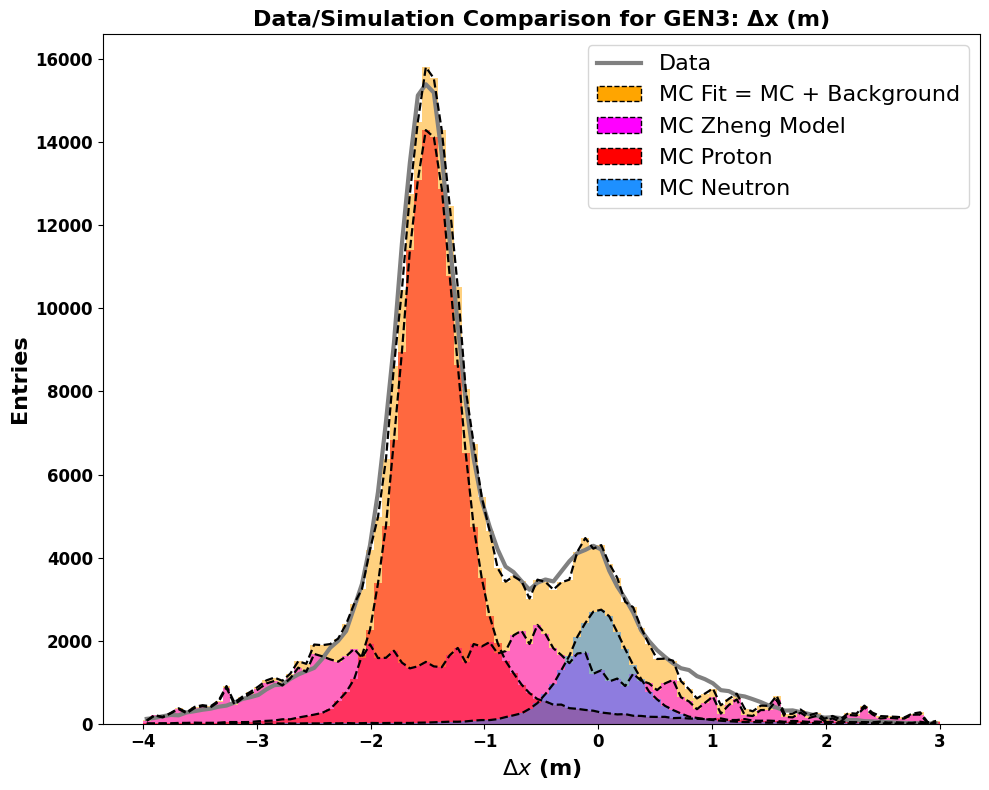

Total entries in fit: 271294.89228068595
χ² = 18693.91
ndf = 97
Reduced χ² = 192.72


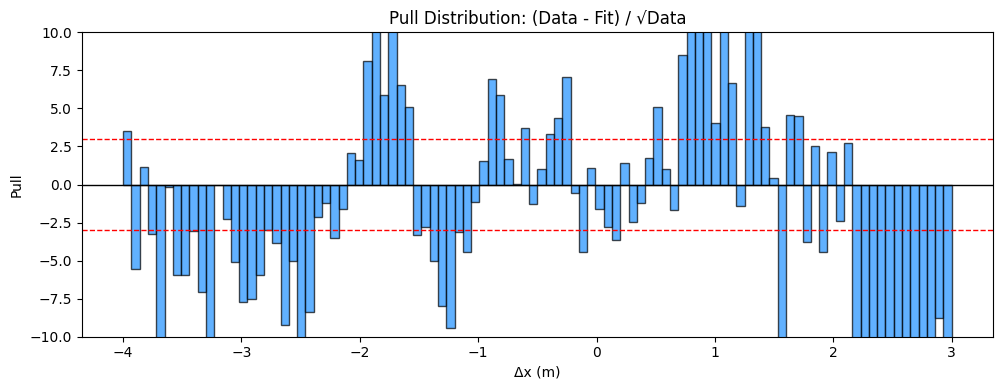

Total events in range (-0.4, 0.4):
  Sim Proton:   3648.46
  Sim Neutron:  22922.65
  Background:   16070.54
  Total:        42641.65
Fraction of events in range (-0.4, 0.4):
Proton Fraction: 0.09
Background Fraction: 0.38
Neutron Fraction: 0.54


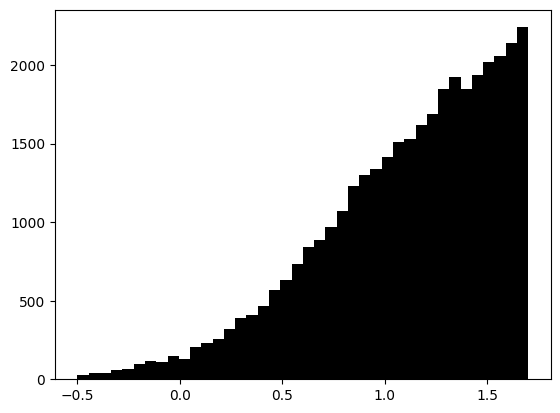

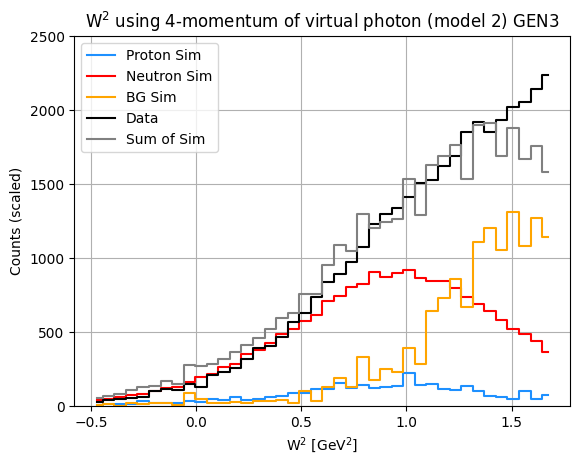

N_plus: 7983 N_minus: 7993
f_acc: 0.0665+=0.0013 A_acc: -0.000626+-0.0079
f_p: 0.0856+=0.0015 A_p: 0.0000192
N_plus: 20556 N_minus: 19761
A_raw: 0.0197+=0.0050
A_phys_weighted_avg: 0.16677+-0.04284+-0.02345
Combined Error: 0.04884
epsilon = 0.6235177504209116
tau_avg = 1.8681376681107817
Q2 = 6.574678873845049
Px: 0.9917 Pz: -0.0291
A = 0.05566 ± 0.01630
B = 0.49715 (no propagated error)
C = 0.14399 ± 0.04884
GEn/GMn*muN: 0.57251+--0.20124


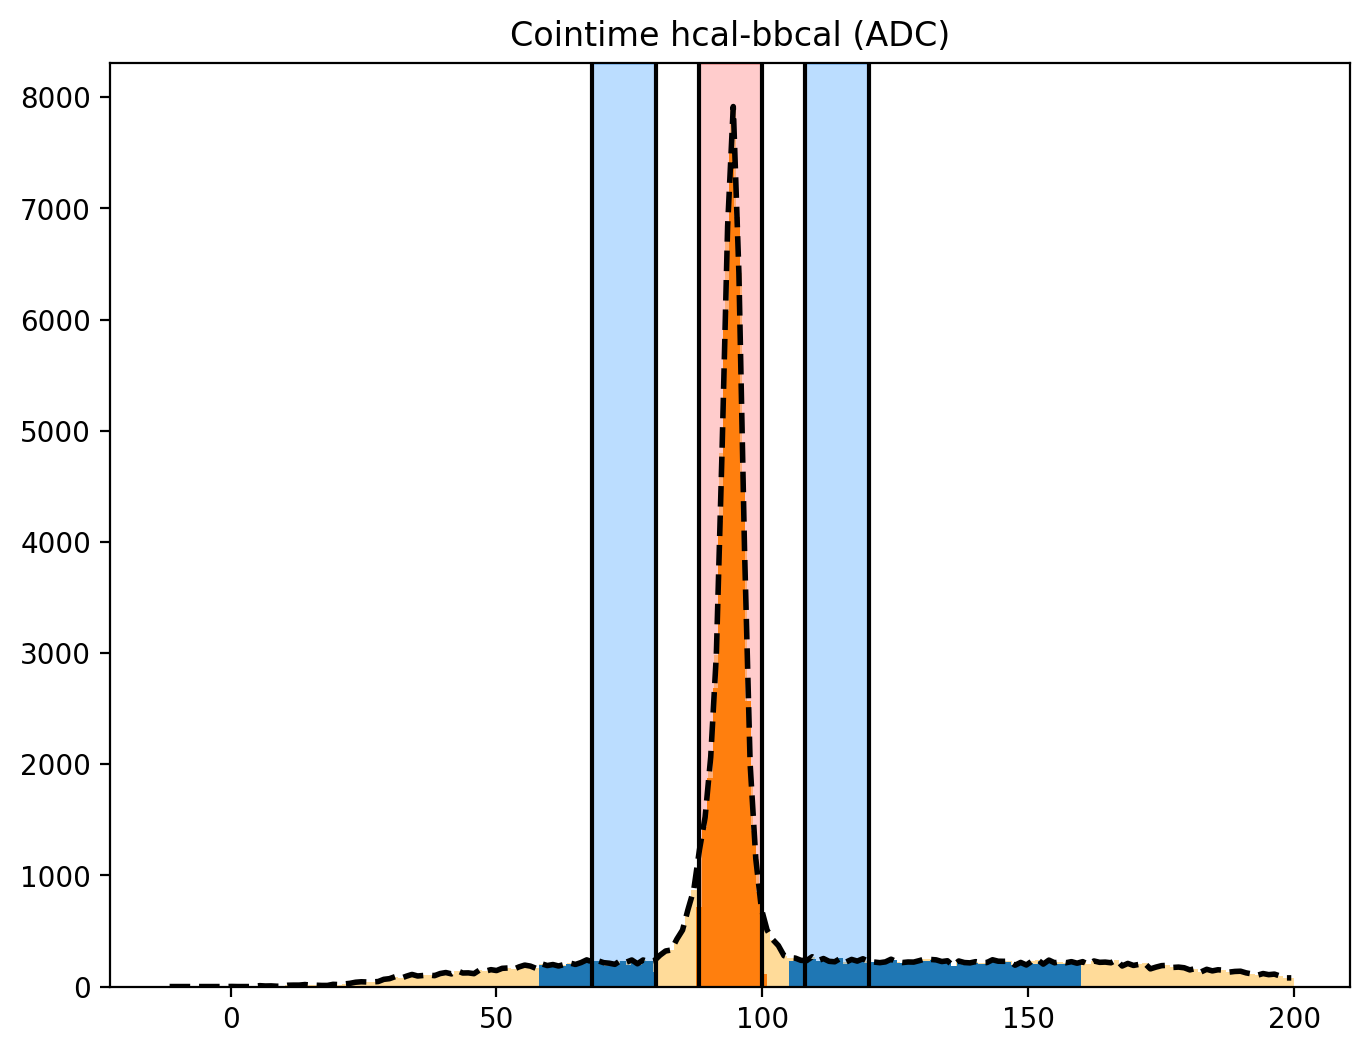

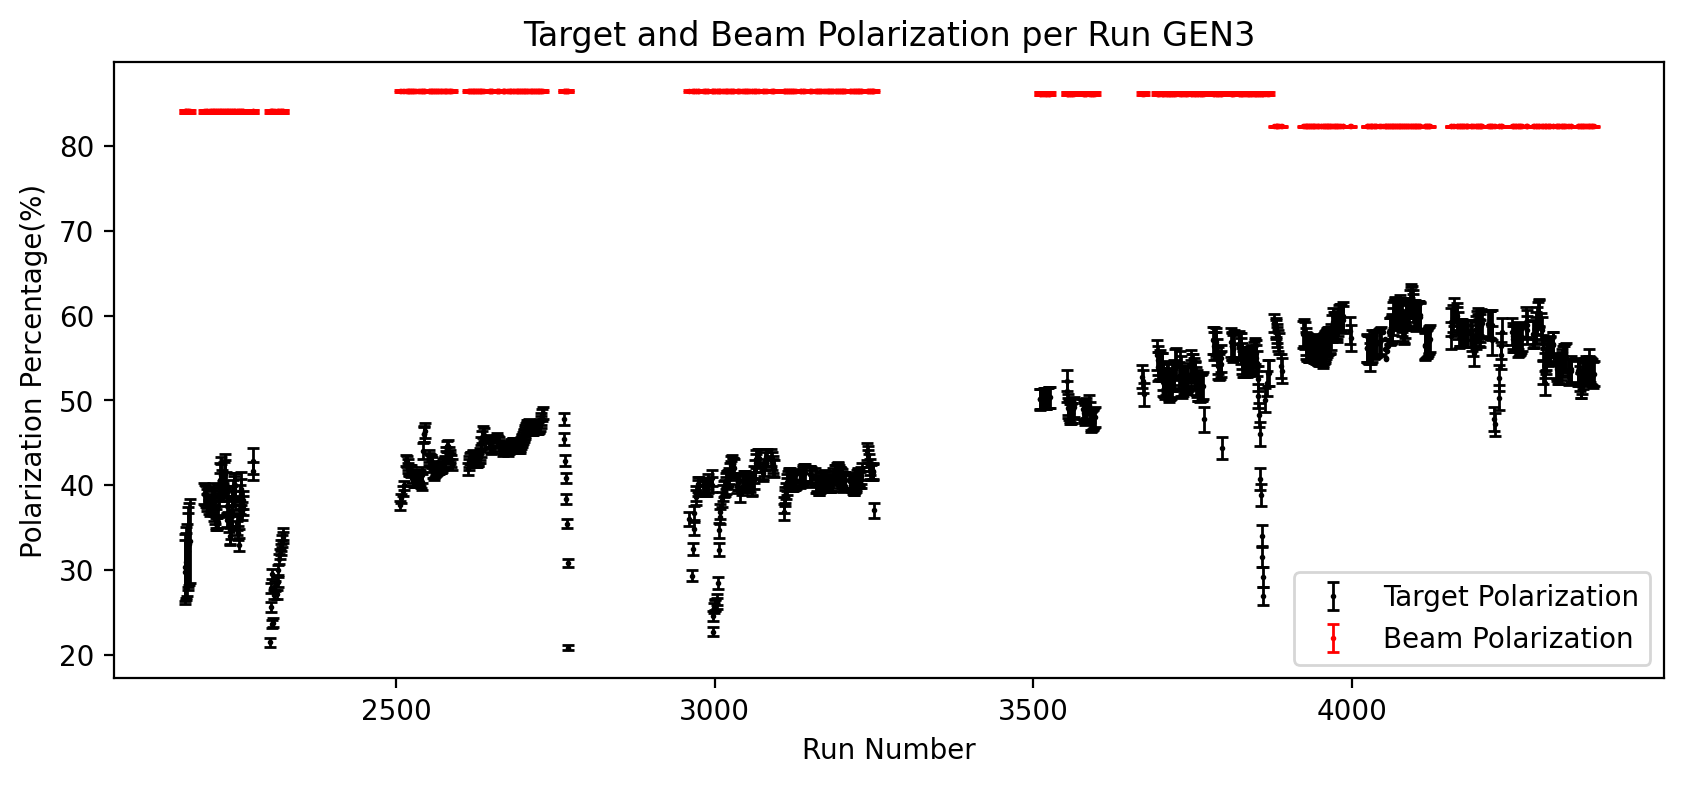

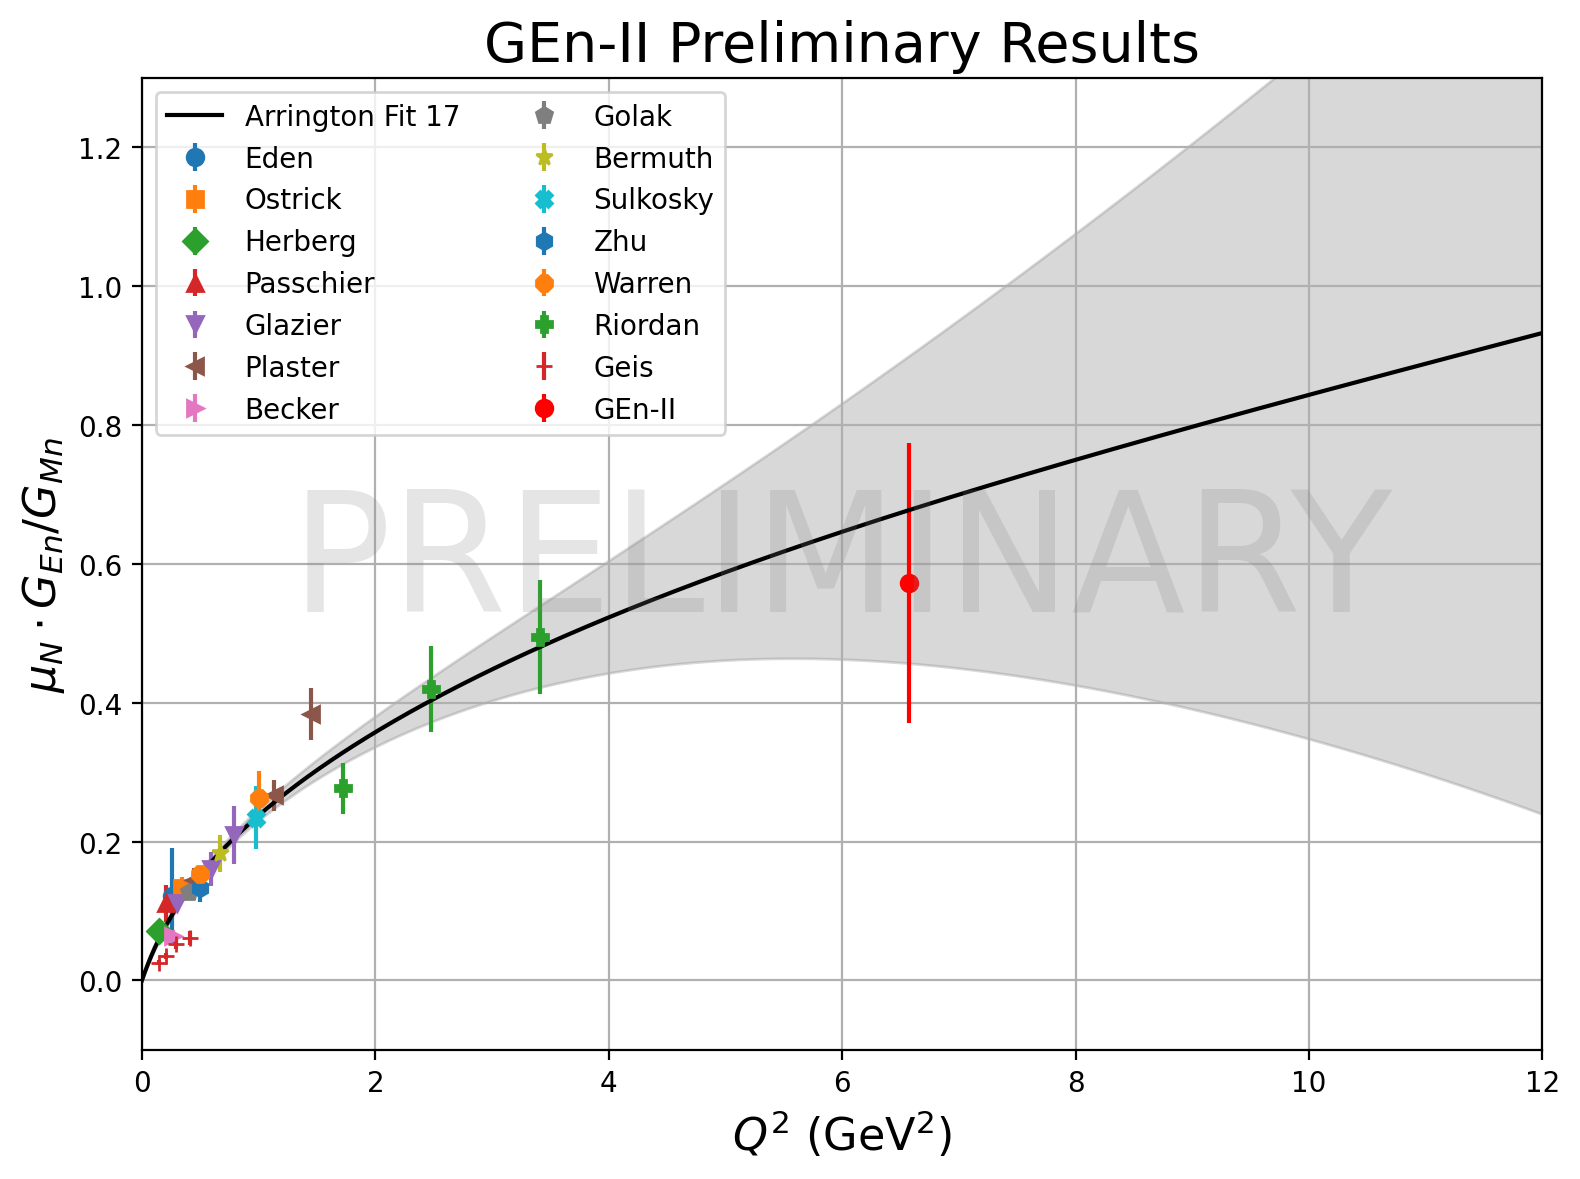

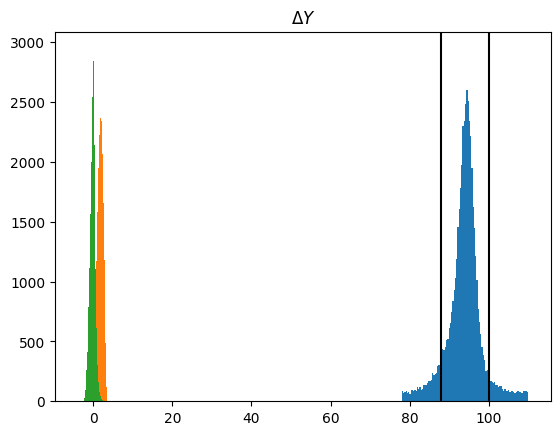

<Figure size 2000x1200 with 0 Axes>

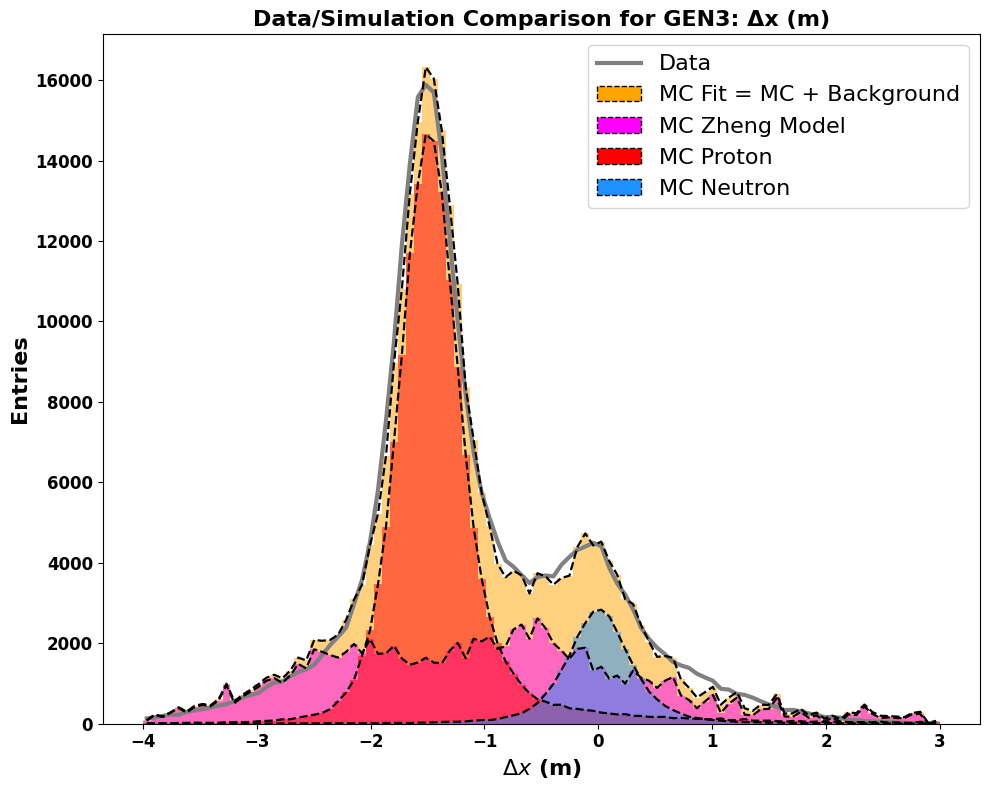

Total entries in fit: 285464.5453913823
χ² = 20804.11
ndf = 97
Reduced χ² = 214.48


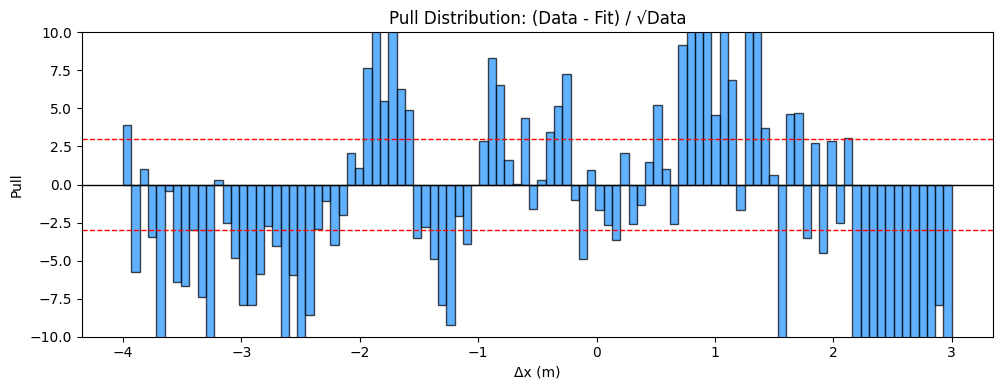

Total events in range (-0.4, 0.4):
  Sim Proton:   3741.31
  Sim Neutron:  23668.03
  Background:   17695.35
  Total:        45104.68
Fraction of events in range (-0.4, 0.4):
Proton Fraction: 0.08
Background Fraction: 0.39
Neutron Fraction: 0.52


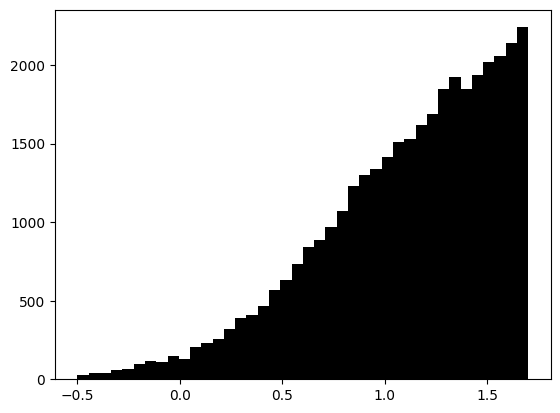

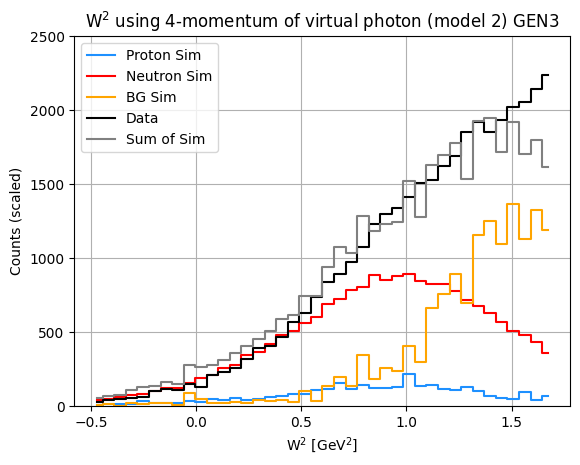

N_plus: 8642 N_minus: 8622
f_acc: 0.0679+=0.0013 A_acc: 0.001158+-0.0076
f_p: 0.0829+=0.0014 A_p: 0.0000192
N_plus: 21417 N_minus: 21245
A_raw: 0.0040+=0.0048
A_phys_weighted_avg: 0.03699+-0.04330+-0.00701
Combined Error: 0.04387
epsilon = 0.6245389437444314
tau_avg = 1.8611790110749467
Q2 = 6.5501887432809
Px: 0.9917 Pz: -0.0279
A = 0.01241 ± 0.01472
B = 0.49781 (no propagated error)
C = 0.01520 ± 0.04387
GEn/GMn*muN: 0.05838+--0.16860


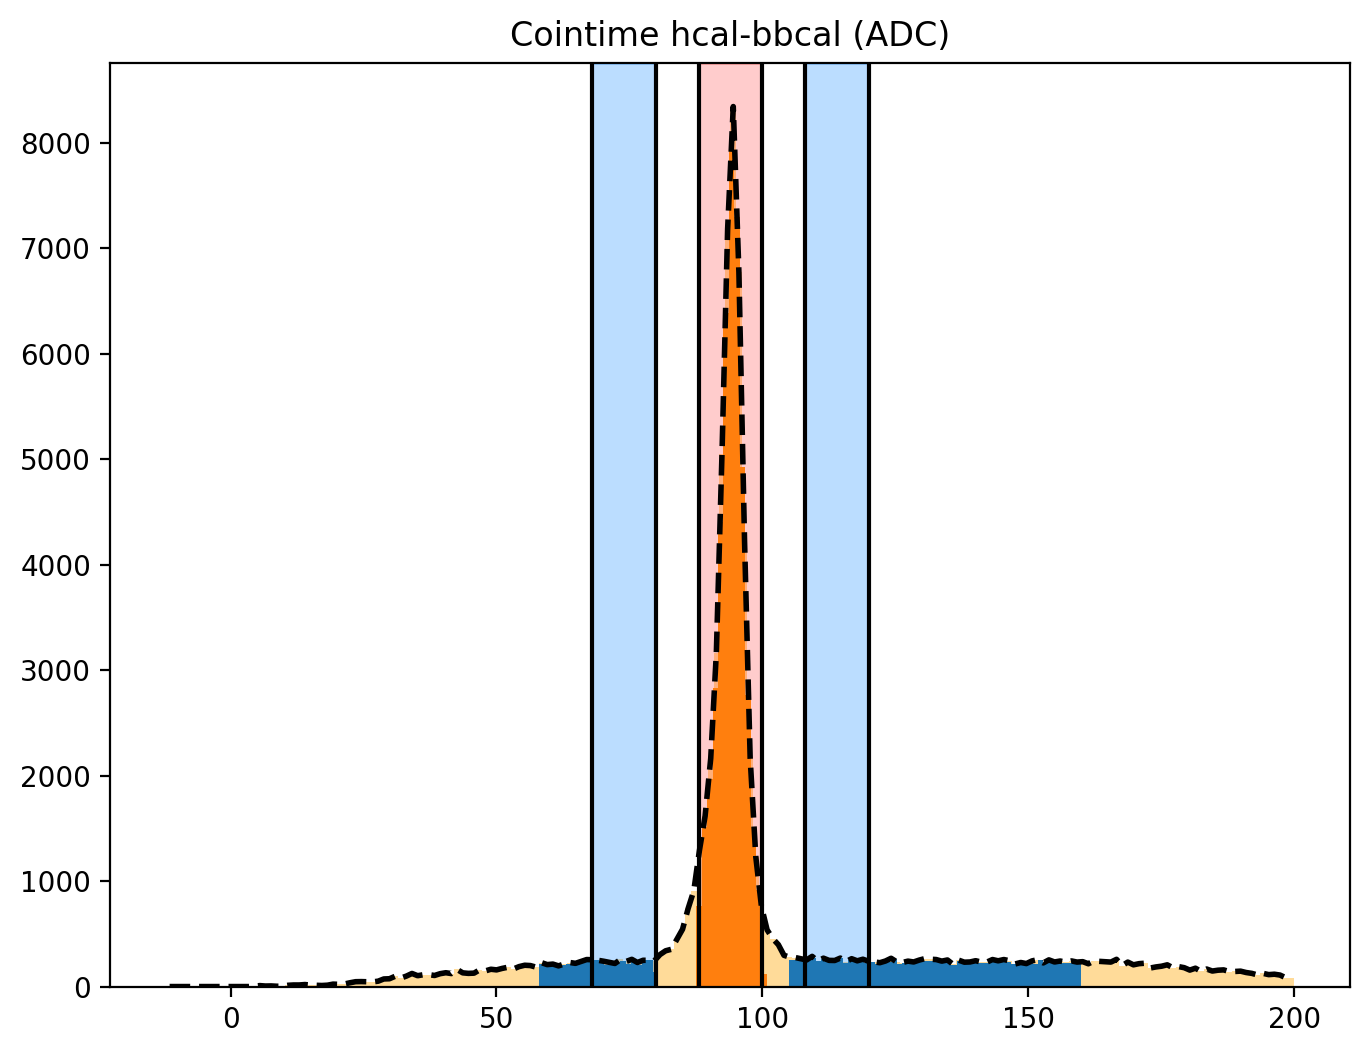

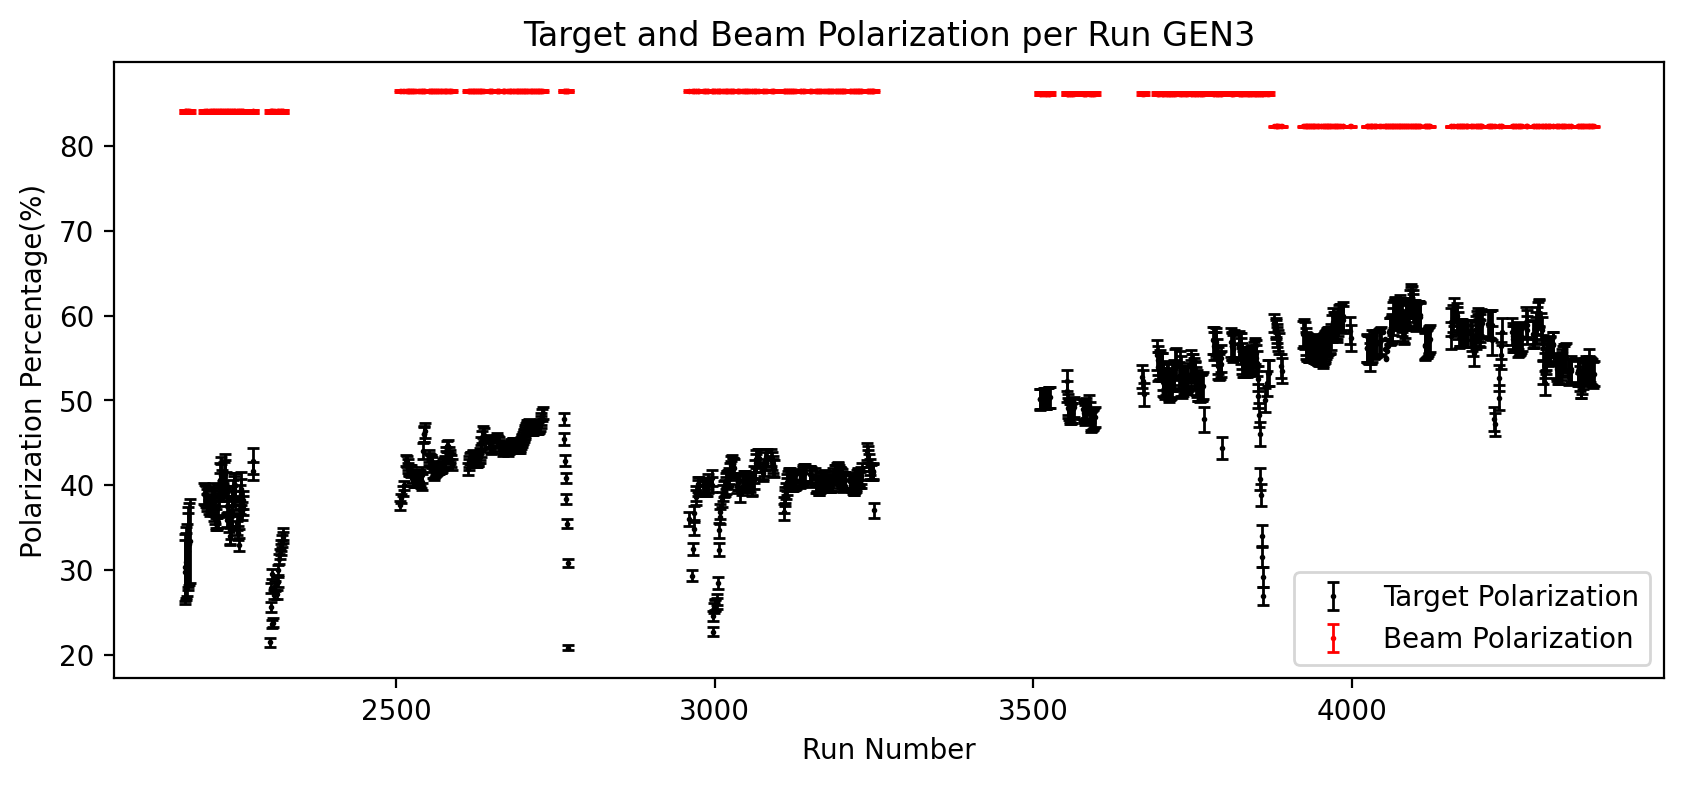

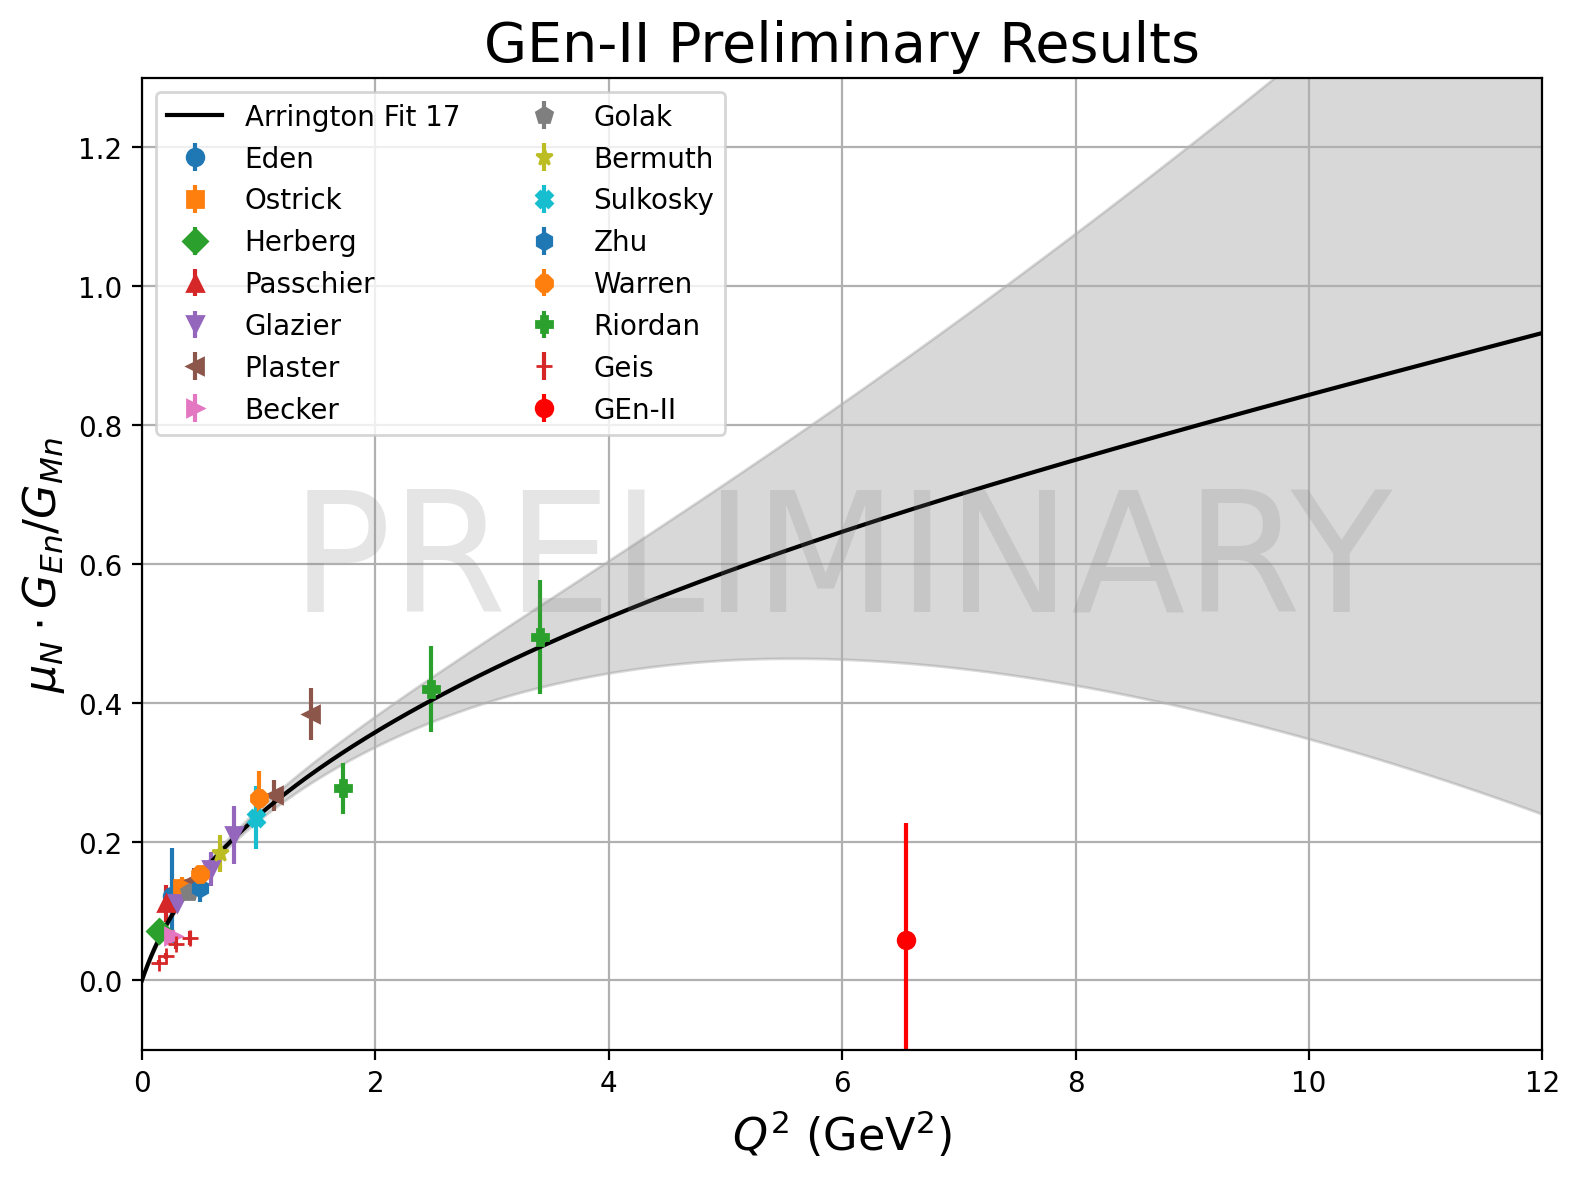

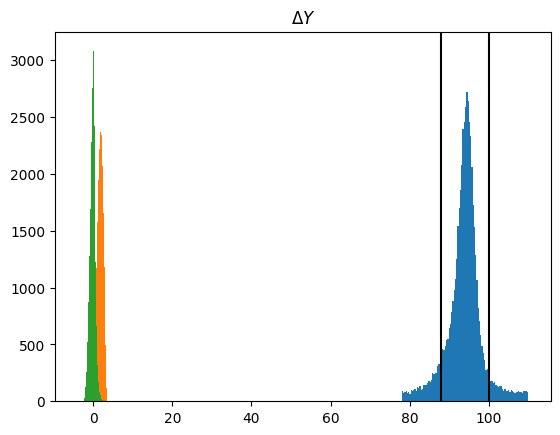

<Figure size 2000x1200 with 0 Axes>

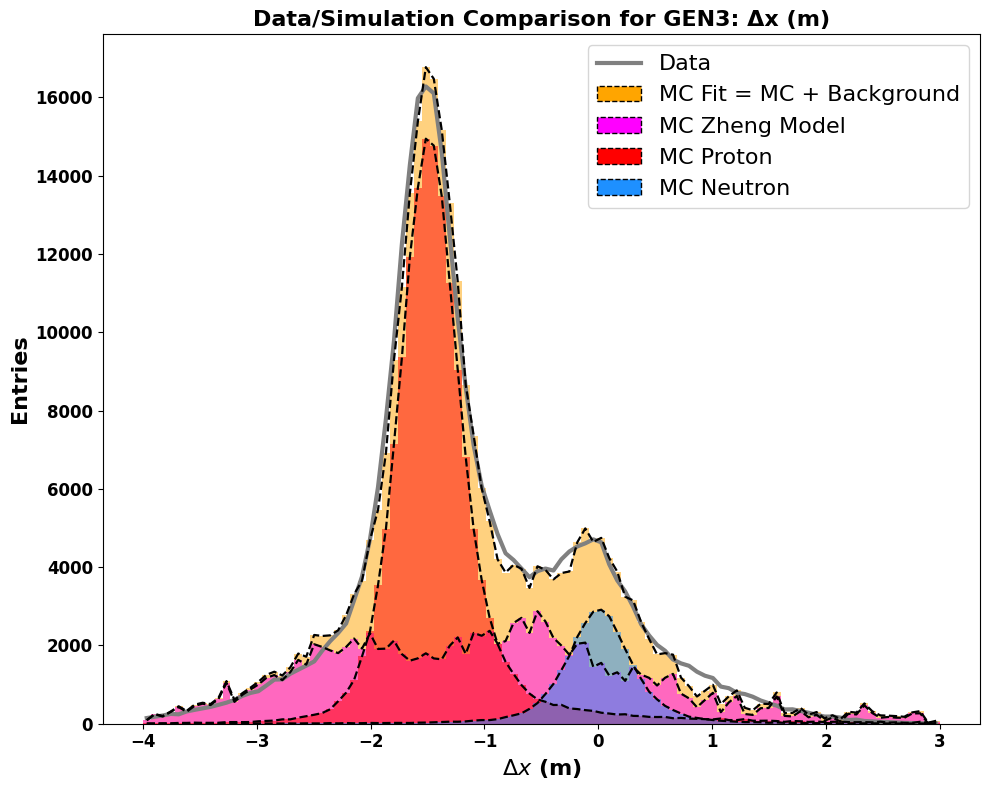

Total entries in fit: 299356.04745342786
χ² = 23239.08
ndf = 97
Reduced χ² = 239.58


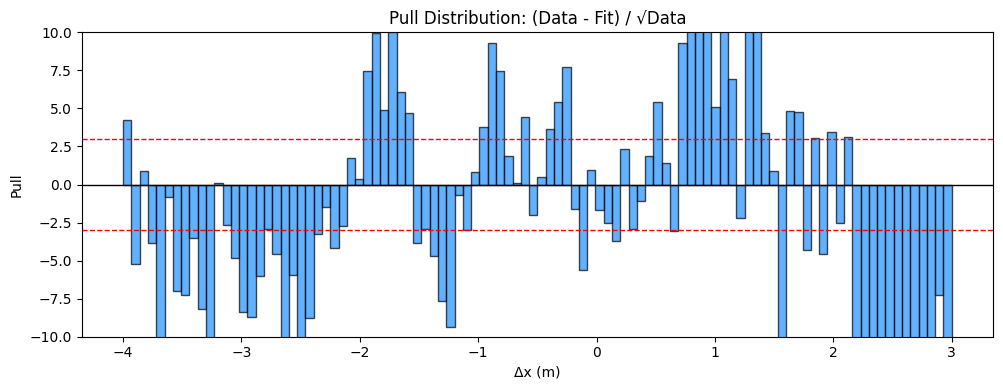

Total events in range (-0.4, 0.4):
  Sim Proton:   3815.67
  Sim Neutron:  24320.47
  Background:   19422.46
  Total:        47558.60
Fraction of events in range (-0.4, 0.4):
Proton Fraction: 0.08
Background Fraction: 0.41
Neutron Fraction: 0.51


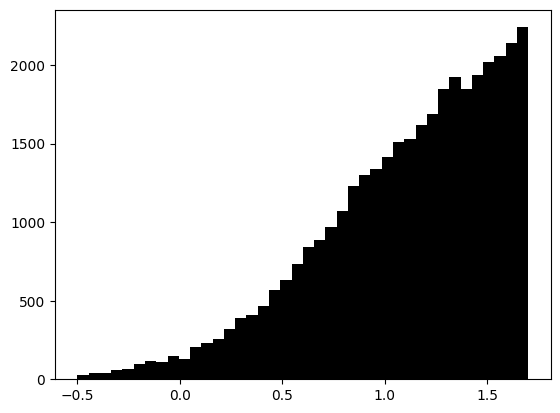

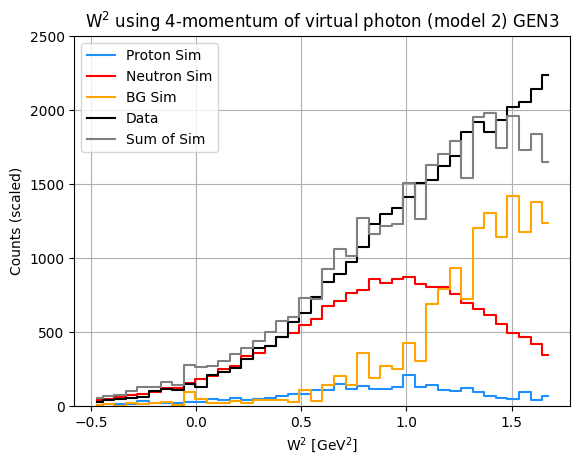

N_plus: 9291 N_minus: 9309
f_acc: 0.0697+=0.0013 A_acc: -0.000968+-0.0073
f_p: 0.0802+=0.0013 A_p: 0.0000192
N_plus: 22894 N_minus: 22041
A_raw: 0.0190+=0.0047
A_phys_weighted_avg: 0.17051+-0.04401+-0.02402
Combined Error: 0.05014
epsilon = 0.6255691226336599
tau_avg = 1.8543501180470146
Q2 = 6.526155301051829
Px: 0.9917 Pz: -0.0267
A = 0.05752 ± 0.01691
B = 0.49844 (no propagated error)
C = 0.14966 ± 0.05014
GEn/GMn*muN: 0.59497+--0.20714


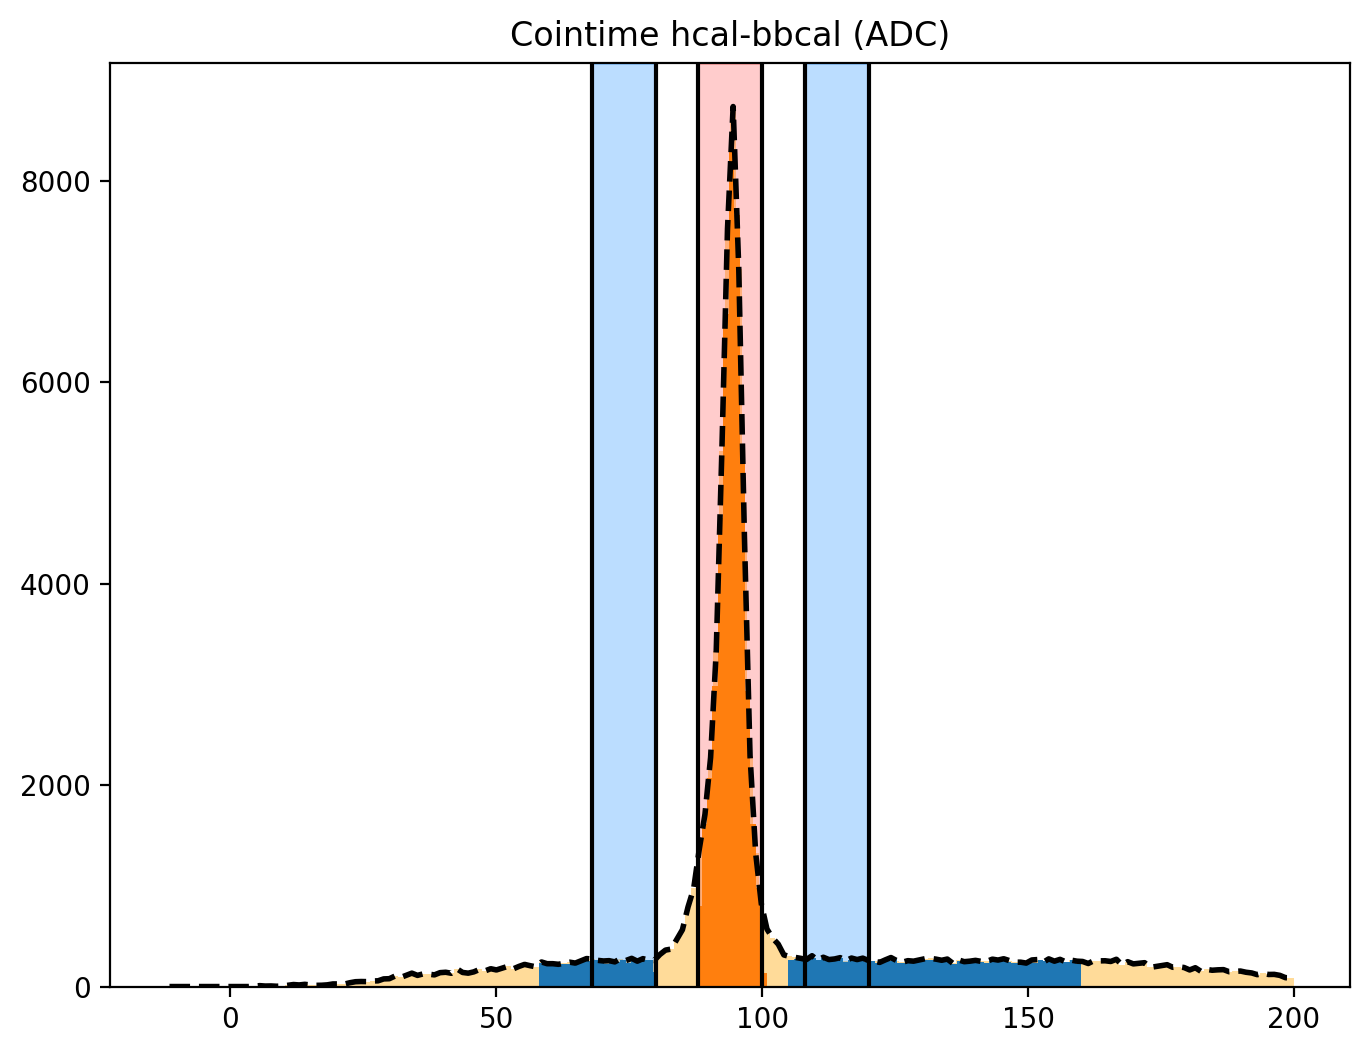

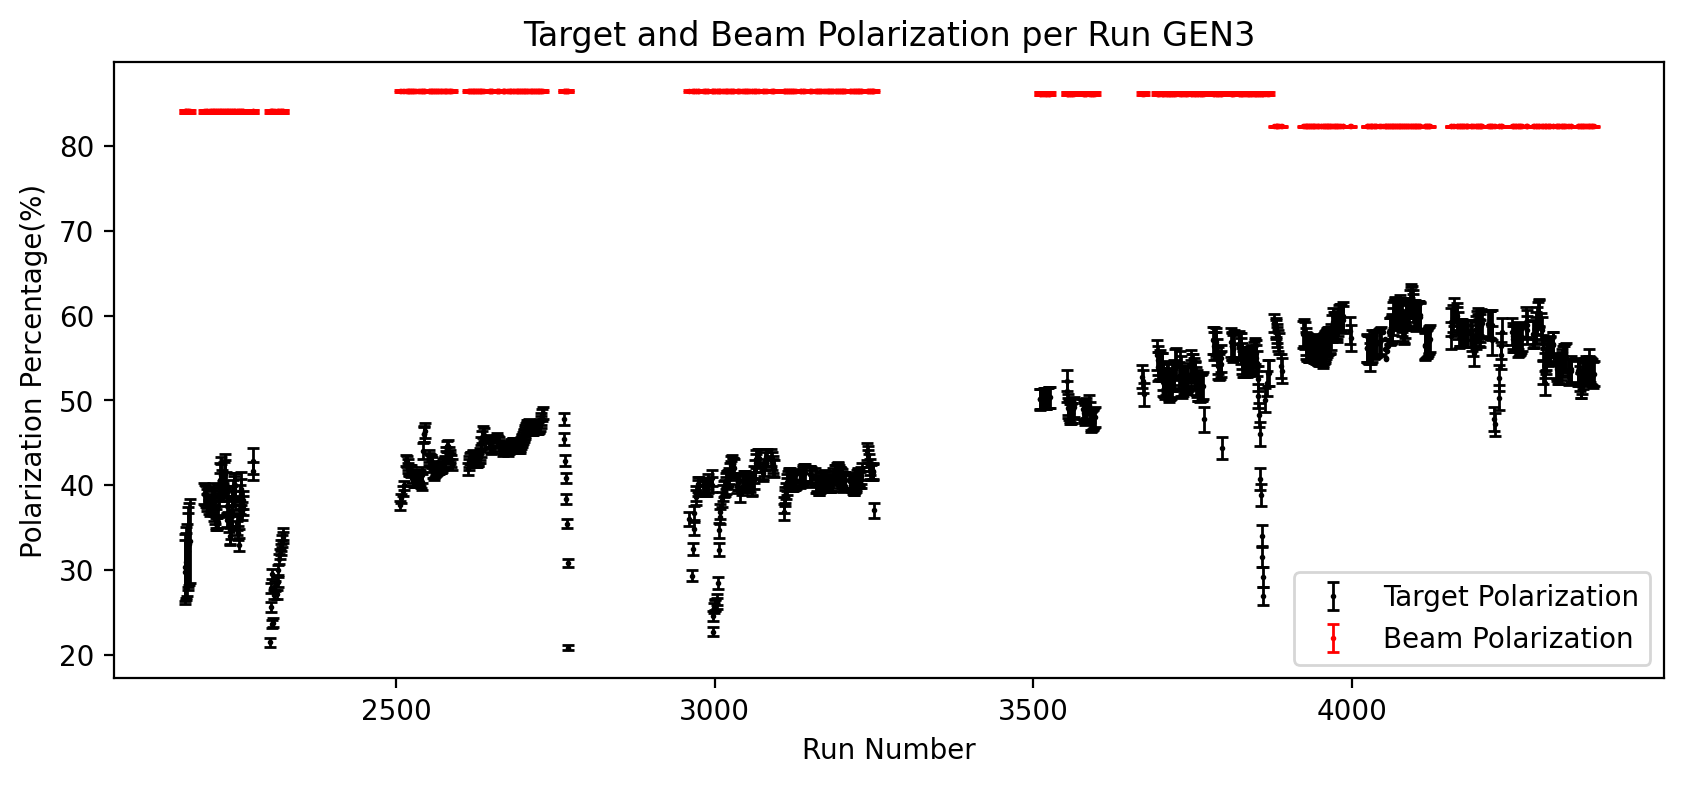

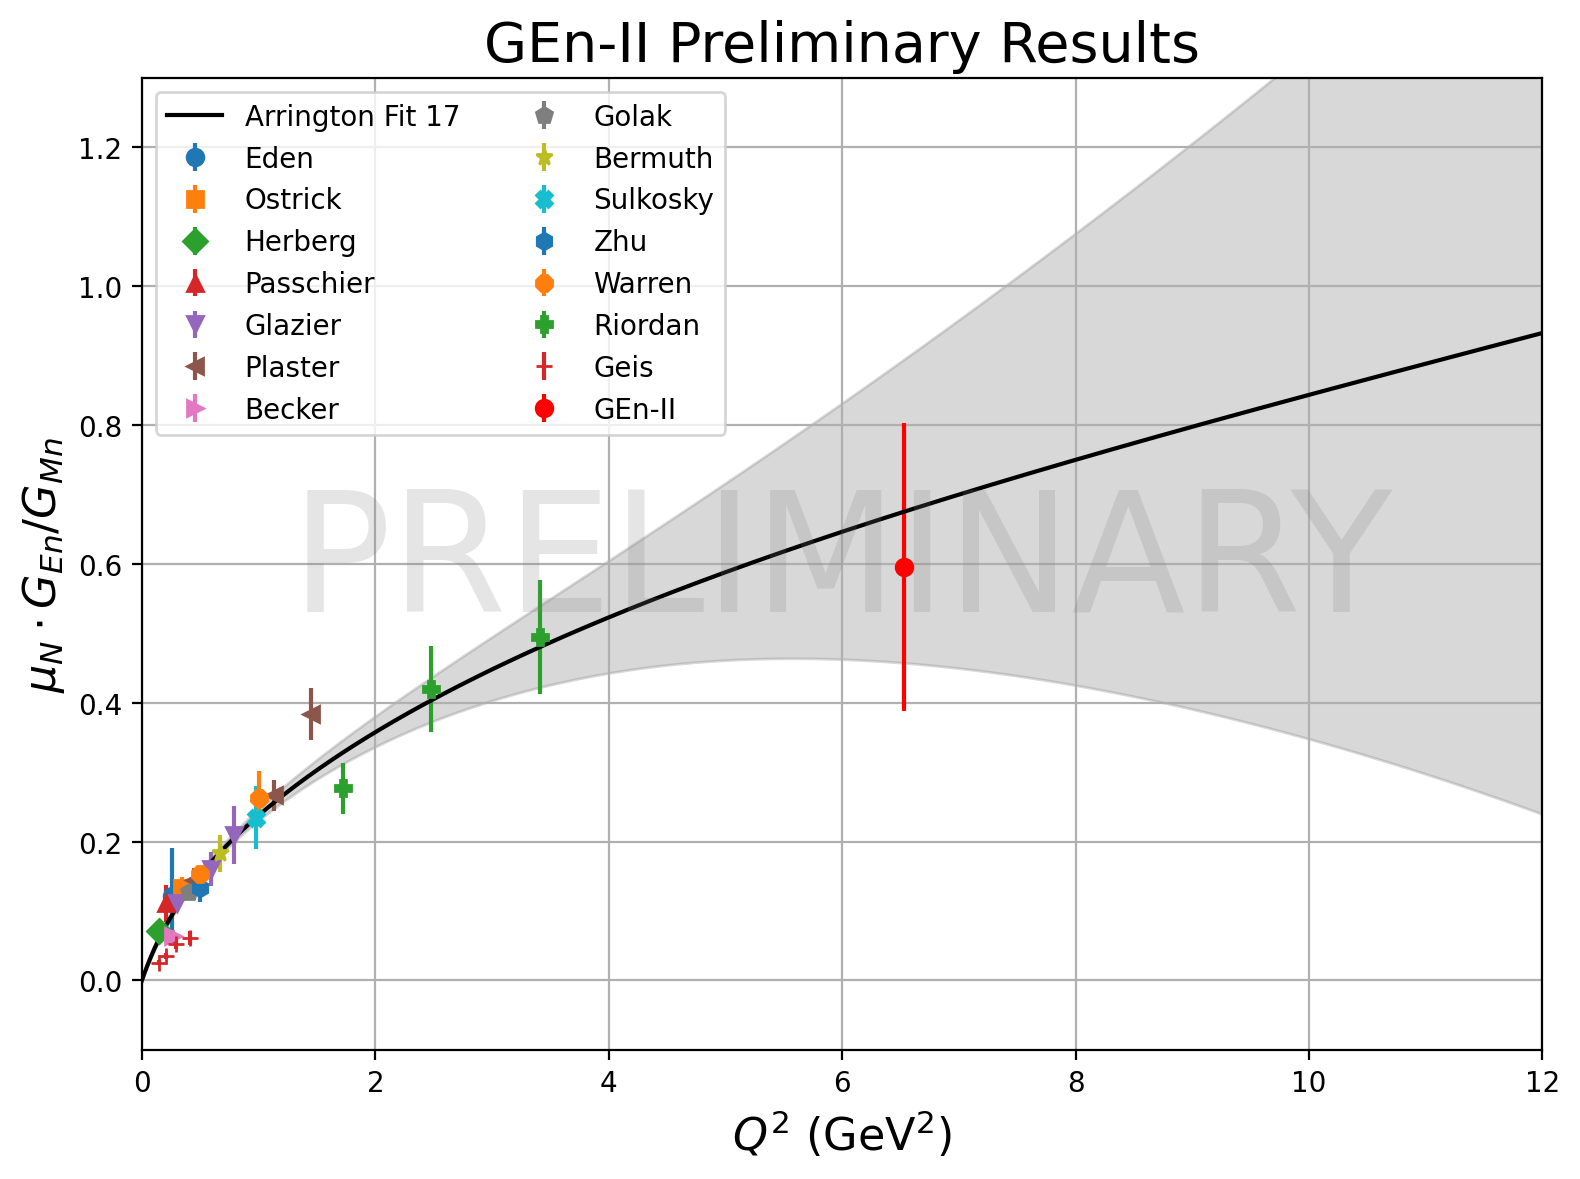

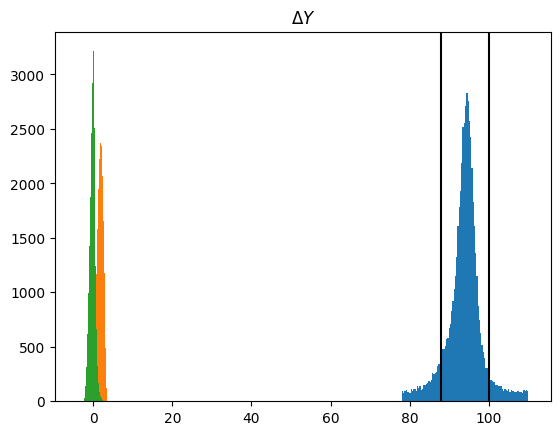

<Figure size 2000x1200 with 0 Axes>

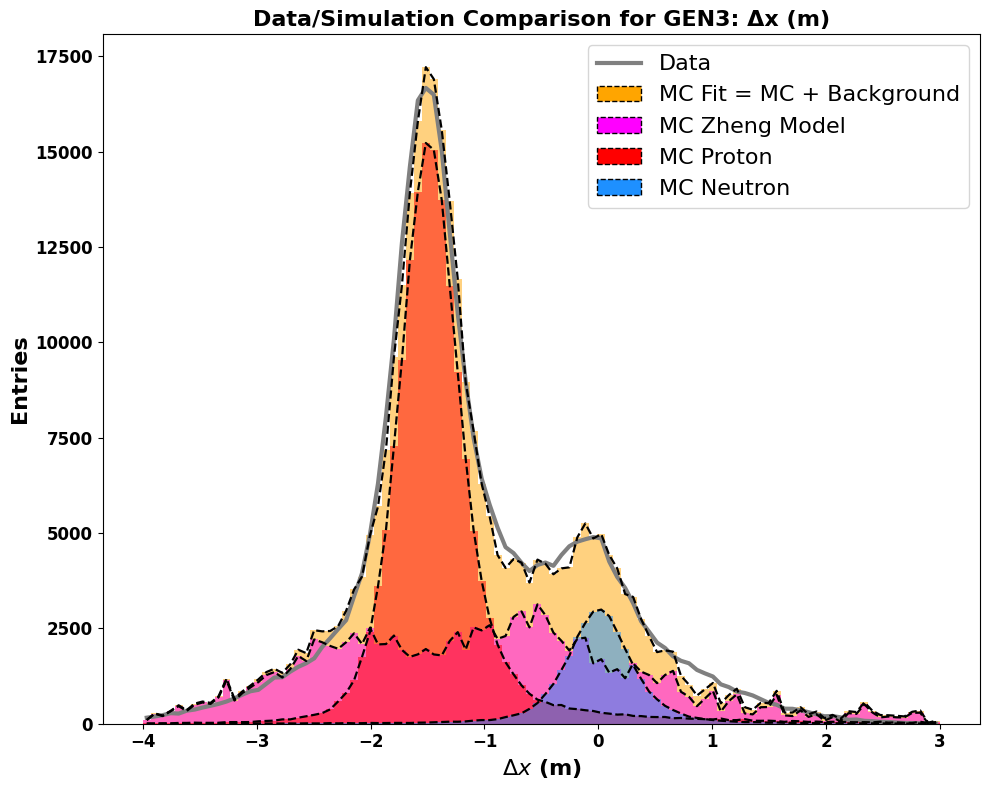

Total entries in fit: 313056.7095347051
χ² = 26326.57
ndf = 97
Reduced χ² = 271.41


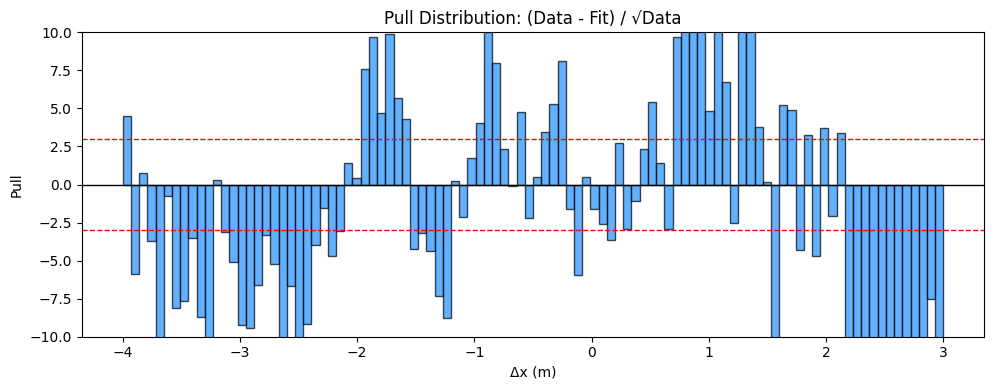

Total events in range (-0.4, 0.4):
  Sim Proton:   3886.29
  Sim Neutron:  24982.36
  Background:   21140.81
  Total:        50009.46
Fraction of events in range (-0.4, 0.4):
Proton Fraction: 0.08
Background Fraction: 0.42
Neutron Fraction: 0.50


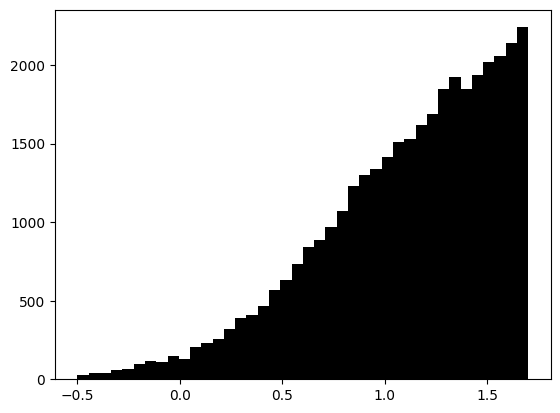

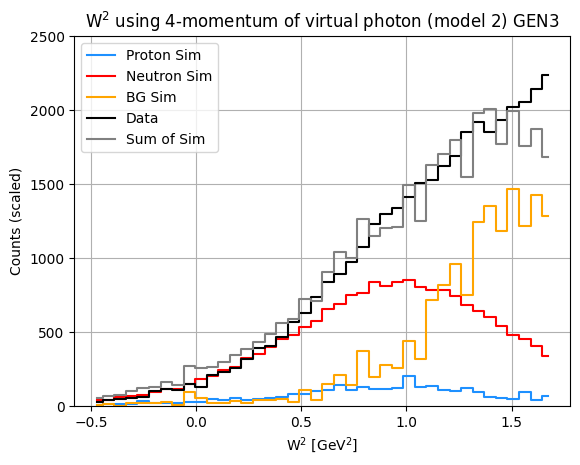

N_plus: 9955 N_minus: 9976
f_acc: 0.0710+=0.0013 A_acc: -0.001054+-0.0071
f_p: 0.0777+=0.0013 A_p: 0.0000192
N_plus: 23722 N_minus: 23492
A_raw: 0.0049+=0.0046
A_phys_weighted_avg: 0.05130+-0.04465+-0.00874
Combined Error: 0.04550
epsilon = 0.6265865352407485
tau_avg = 1.8476511965136262
Q2 = 6.502579277381338
Px: 0.9917 Pz: -0.0256
A = 0.01740 ± 0.01543
B = 0.49907 (no propagated error)
C = 0.03137 ± 0.04550
GEn/GMn*muN: 0.12035+--0.17492


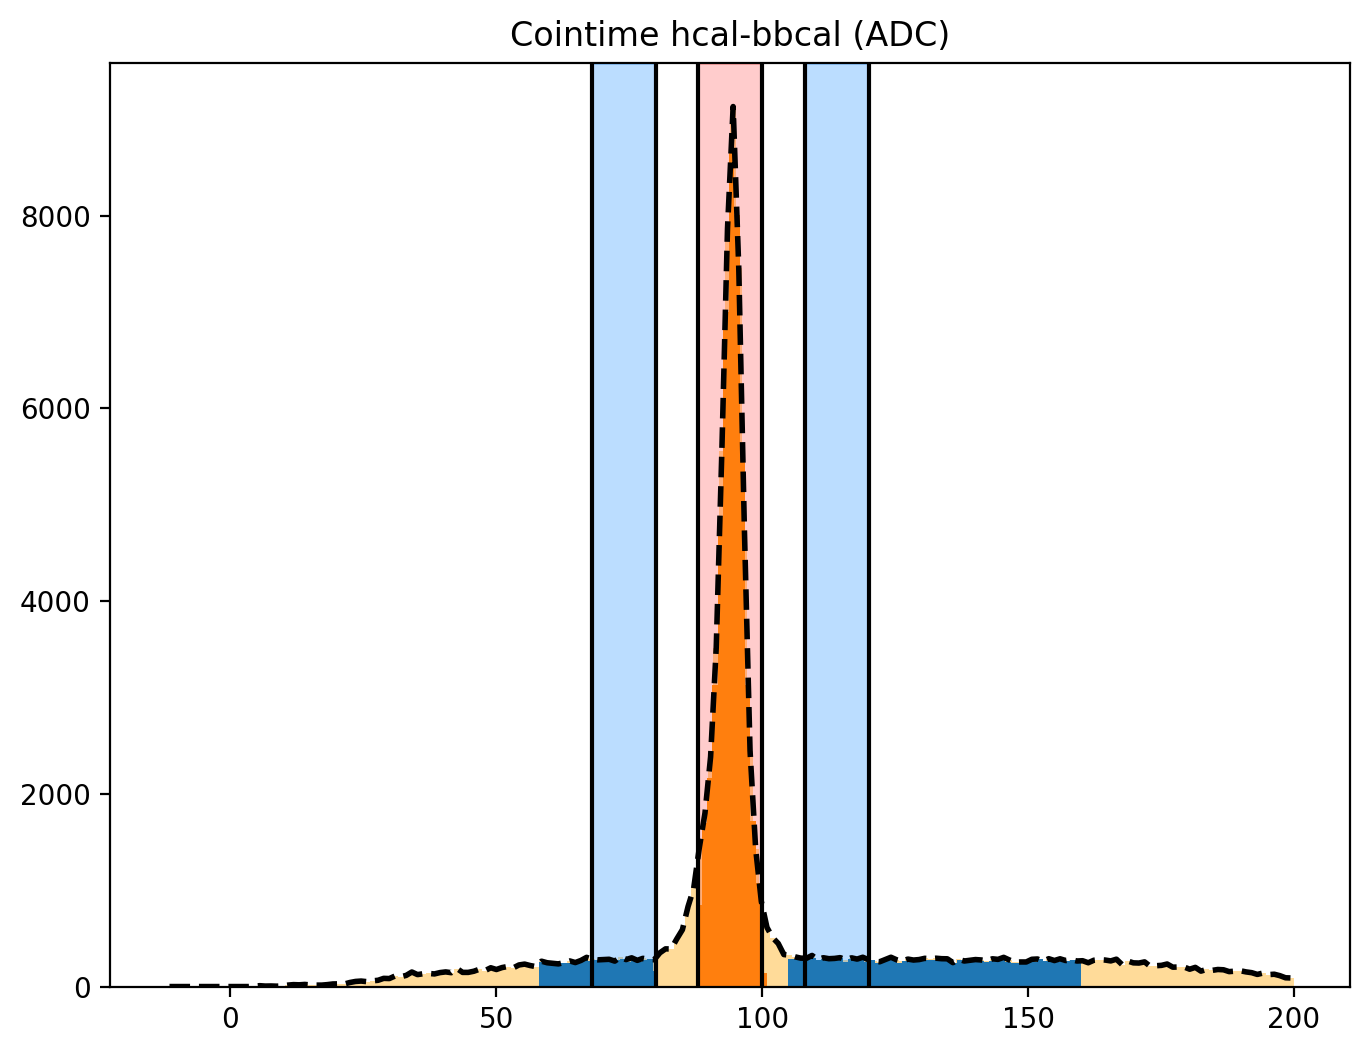

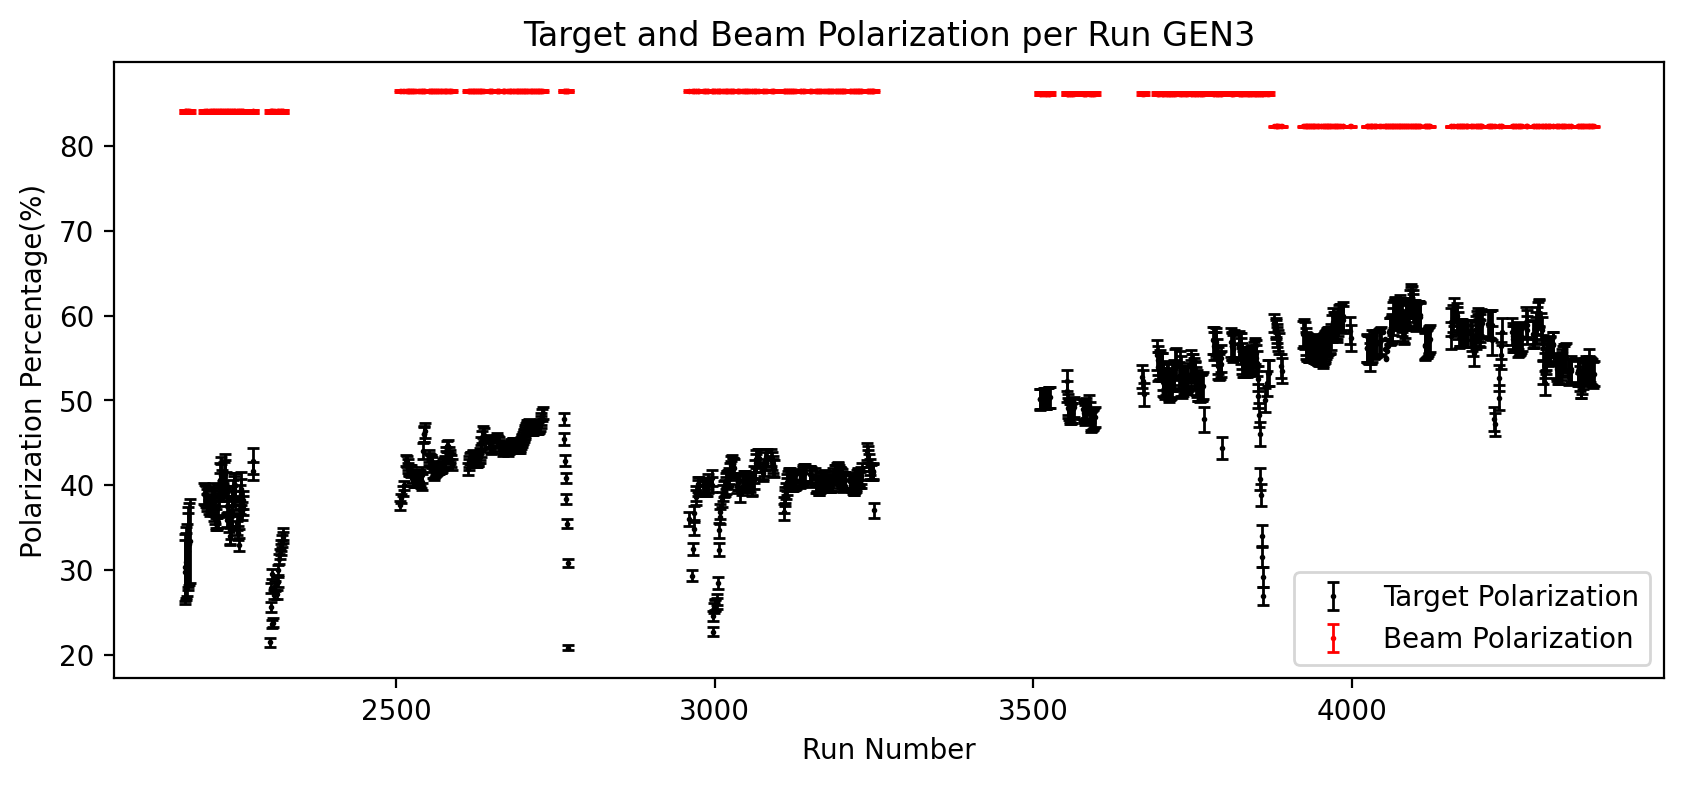

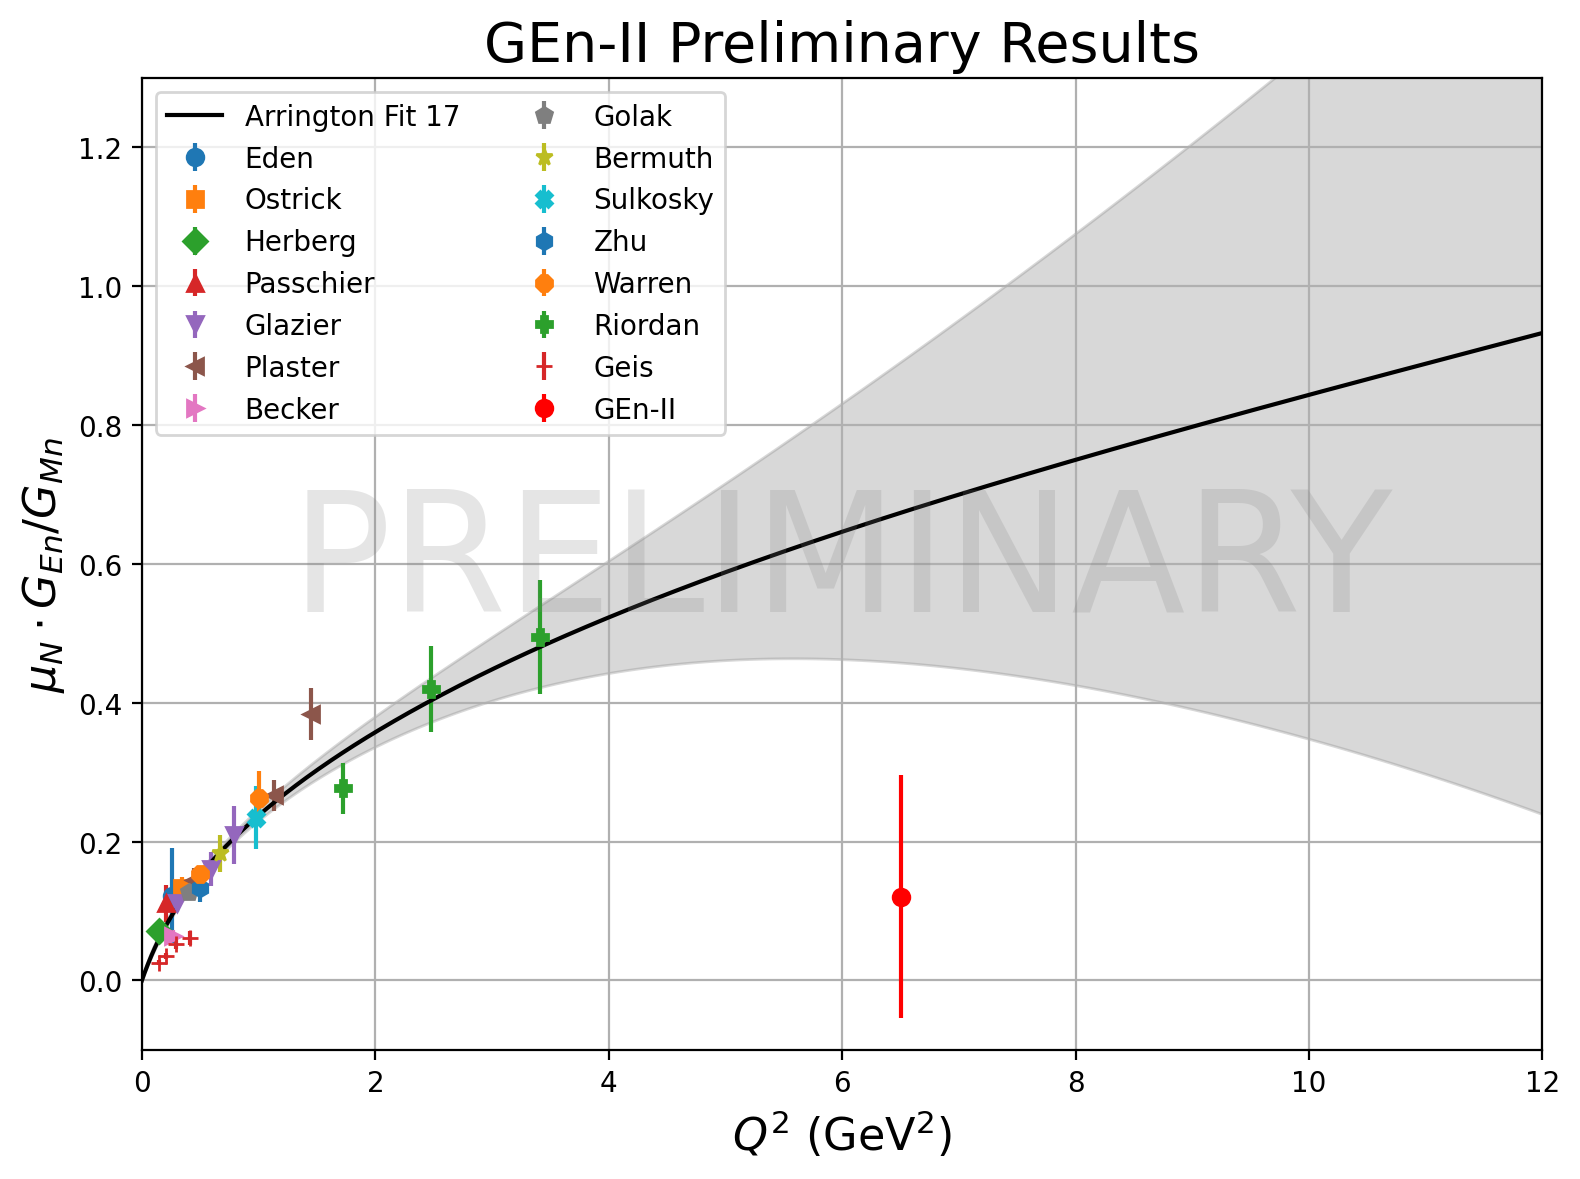

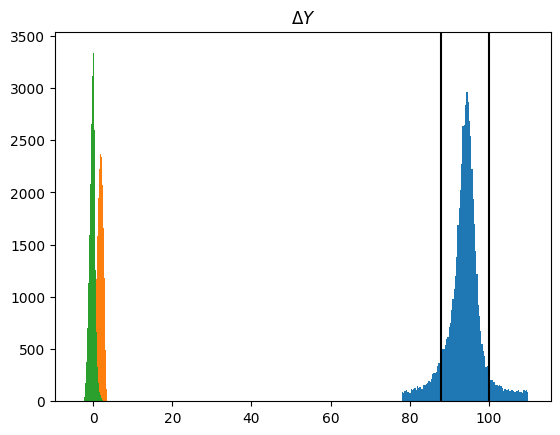

<Figure size 2000x1200 with 0 Axes>

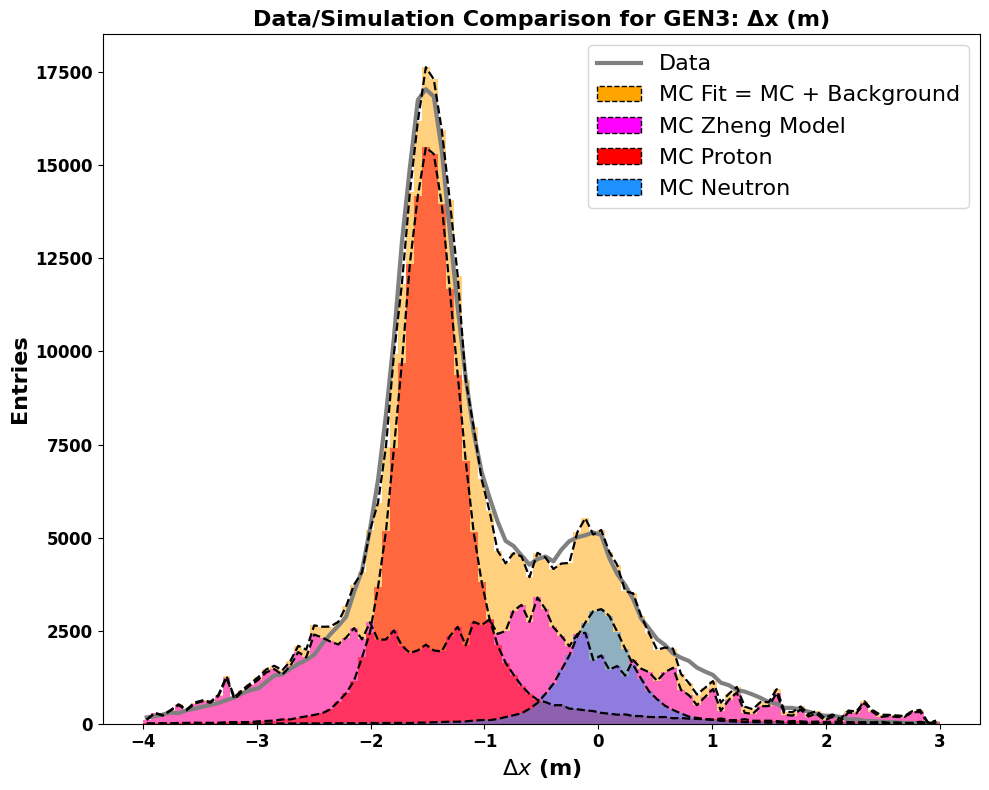

Total entries in fit: 326971.3631874841
χ² = 29815.46
ndf = 97
Reduced χ² = 307.38


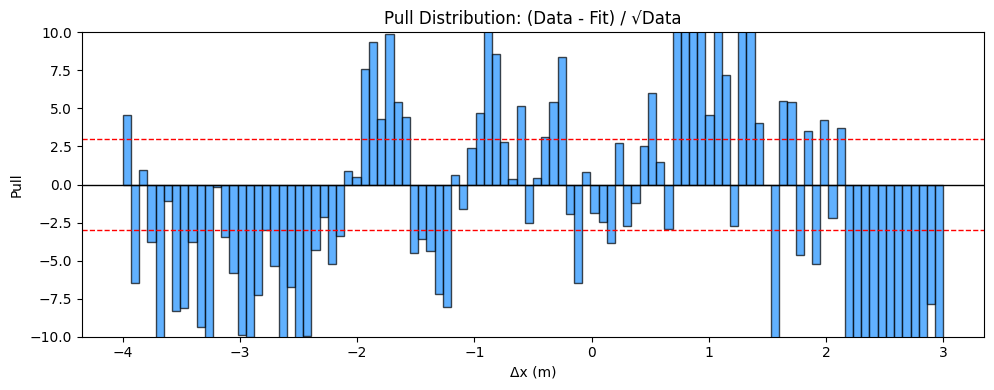

Total events in range (-0.4, 0.4):
  Sim Proton:   3952.78
  Sim Neutron:  25699.30
  Background:   22912.87
  Total:        52564.94
Fraction of events in range (-0.4, 0.4):
Proton Fraction: 0.08
Background Fraction: 0.44
Neutron Fraction: 0.49


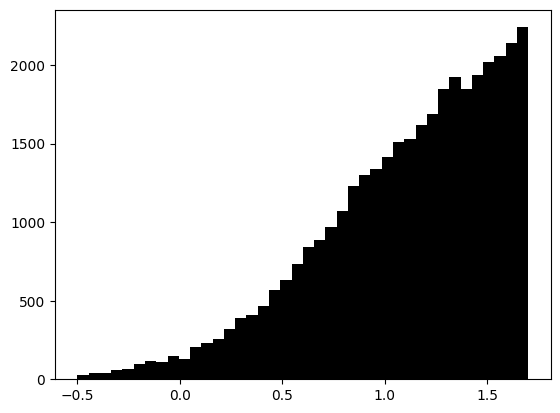

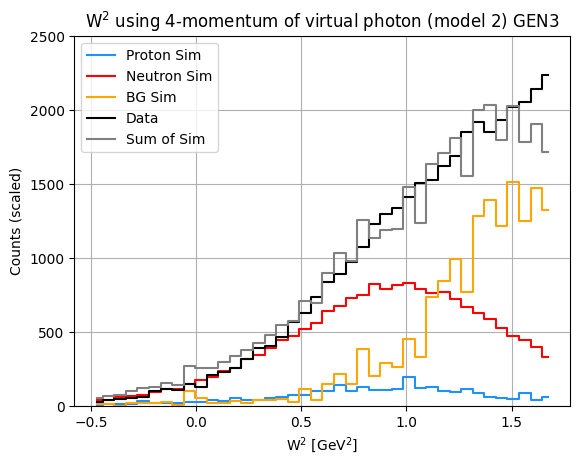

N_plus: 10634 N_minus: 10657
f_acc: 0.0721+=0.0012 A_acc: -0.001080+-0.0069
f_p: 0.0752+=0.0012 A_p: 0.0000192
N_plus: 25165 N_minus: 24398
A_raw: 0.0155+=0.0045
A_phys_weighted_avg: 0.15082+-0.04518+-0.02144
Combined Error: 0.05001
epsilon = 0.6276461425552464
tau_avg = 1.840757761375318
Q2 = 6.47831868719802
Px: 0.9917 Pz: -0.0244
A = 0.05143 ± 0.01705
B = 0.49972 (no propagated error)
C = 0.13181 ± 0.05001
GEn/GMn*muN: 0.51836+--0.20254


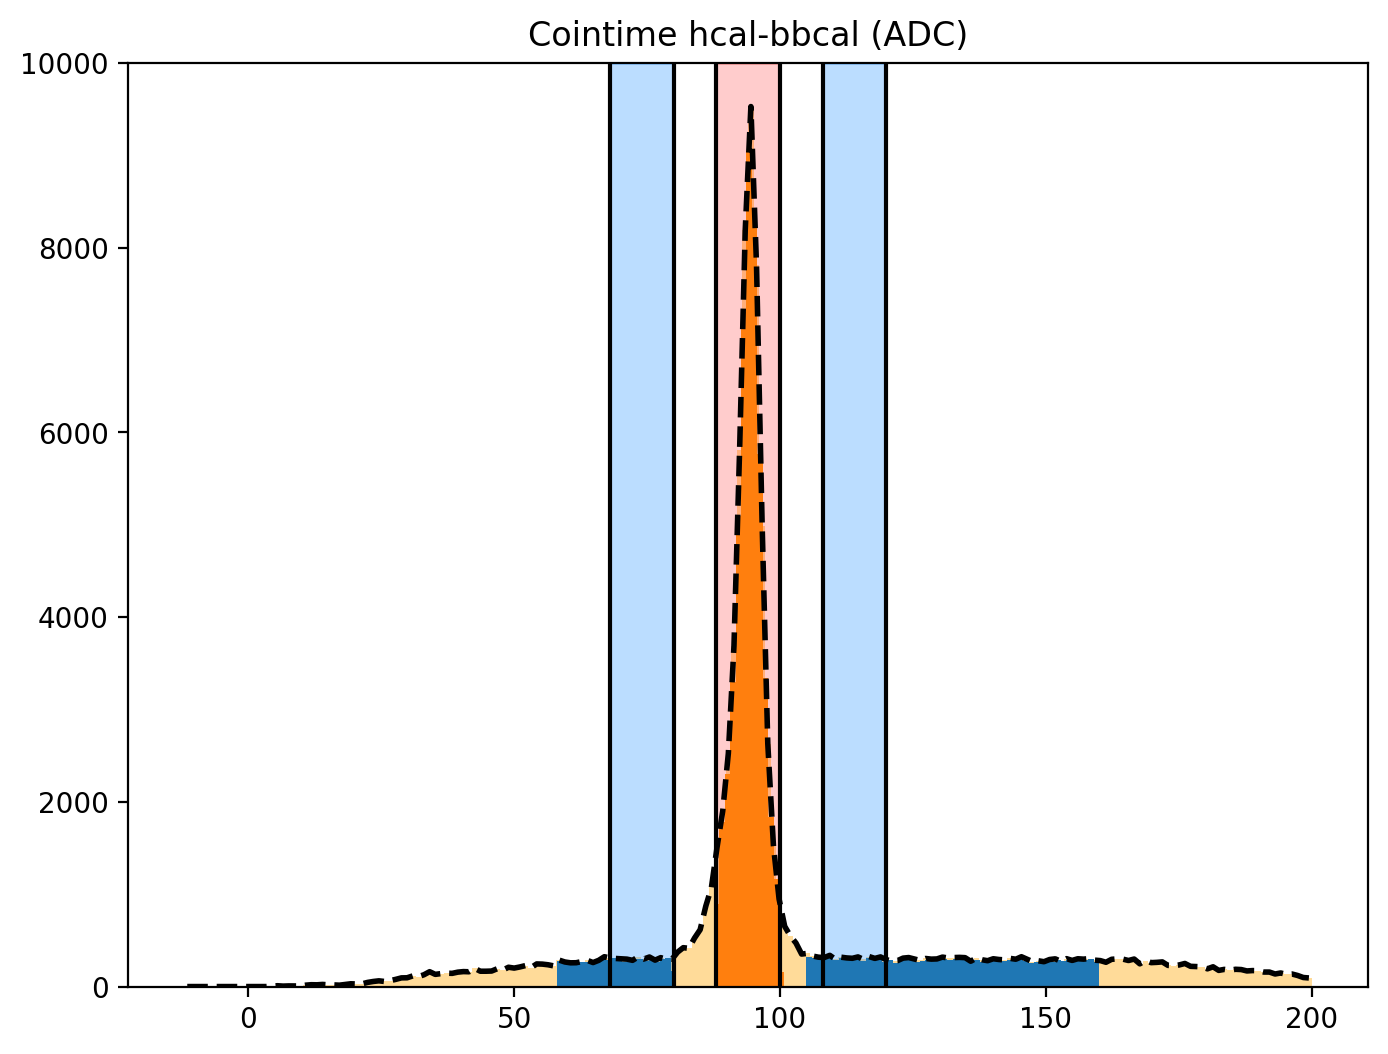

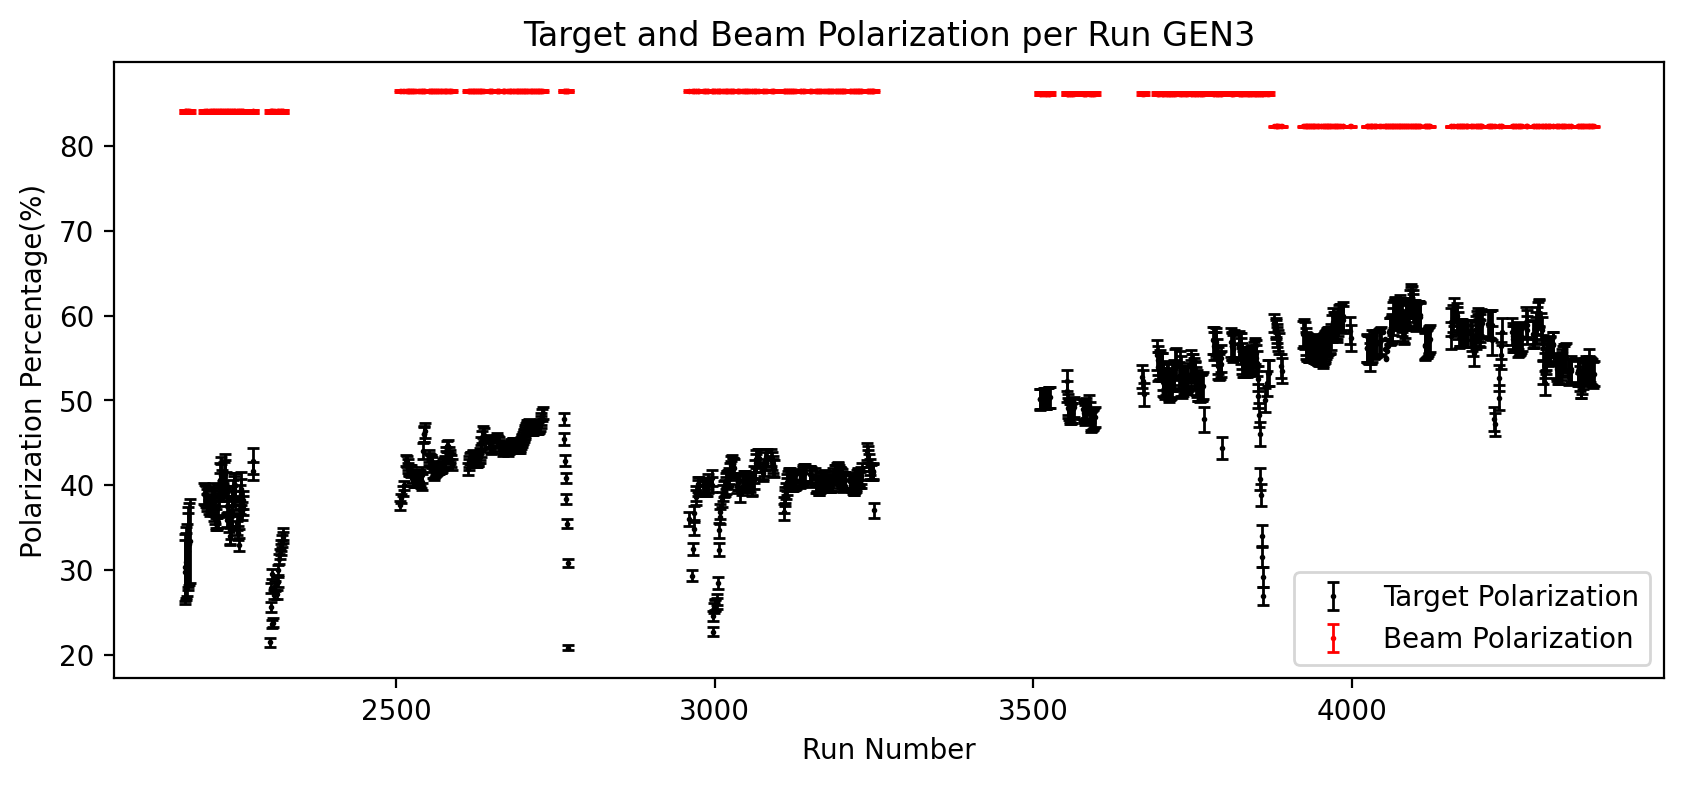

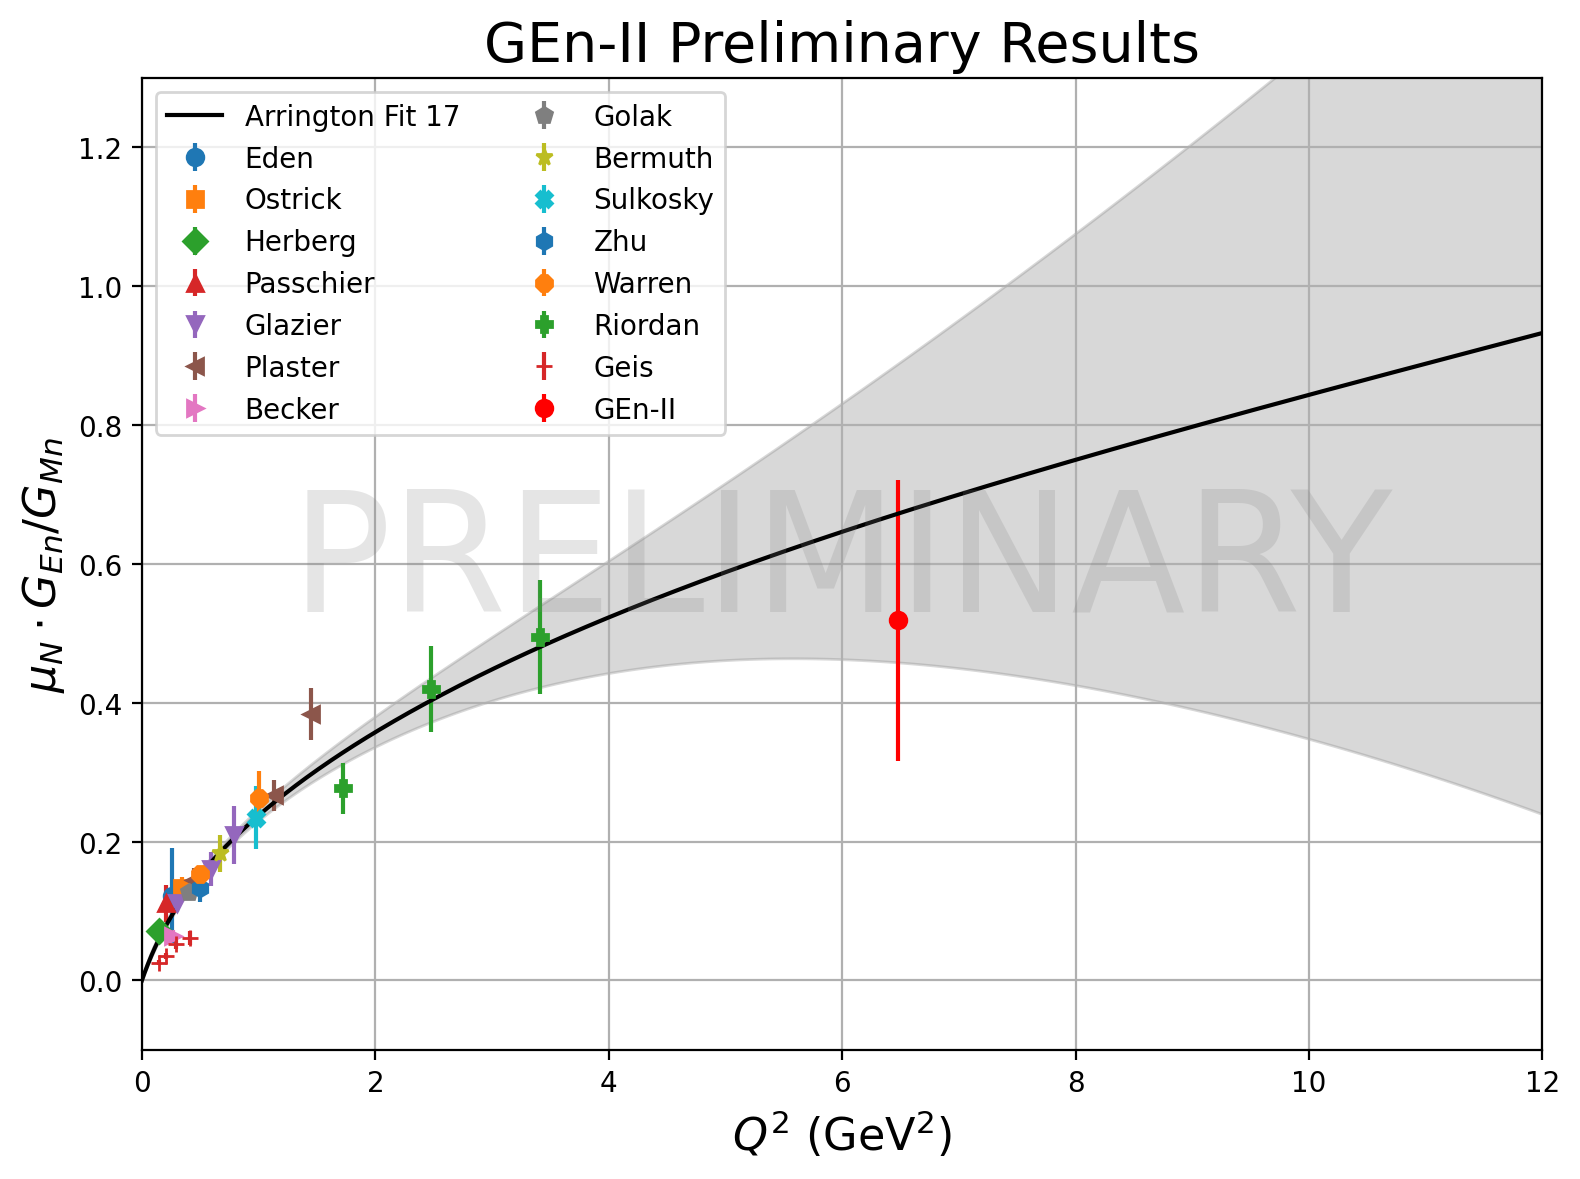

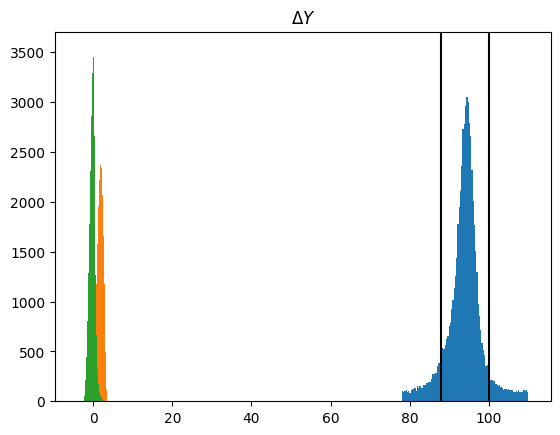

<Figure size 2000x1200 with 0 Axes>

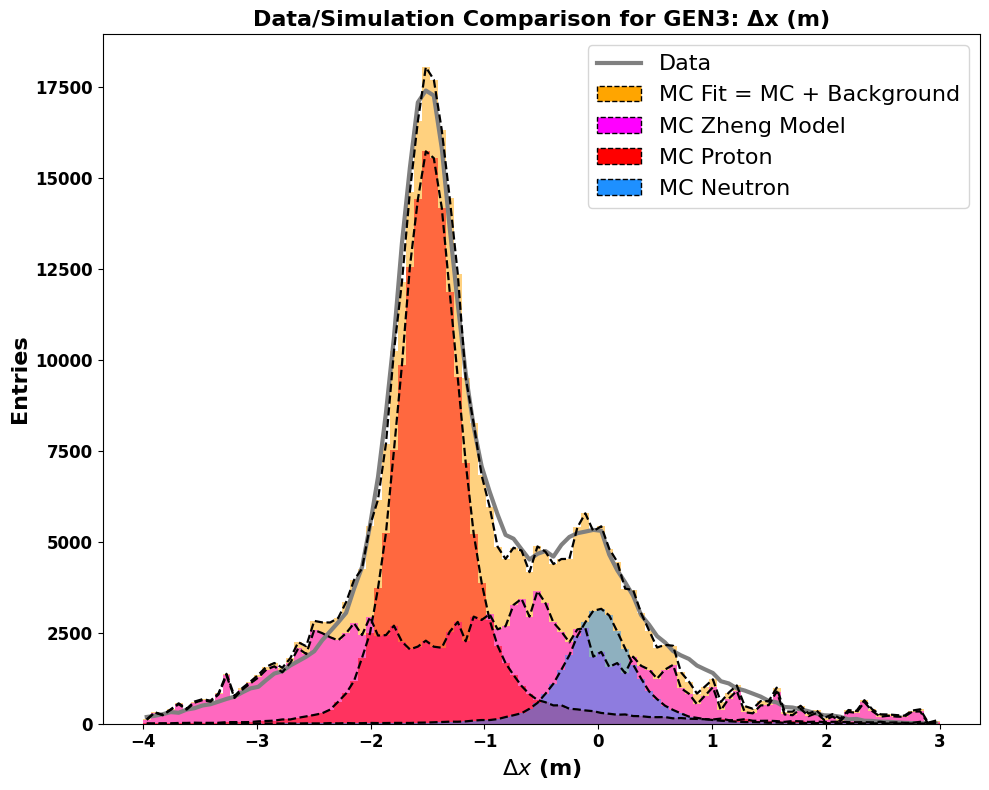

Total entries in fit: 340398.21274768905
χ² = 32029.23
ndf = 97
Reduced χ² = 330.20


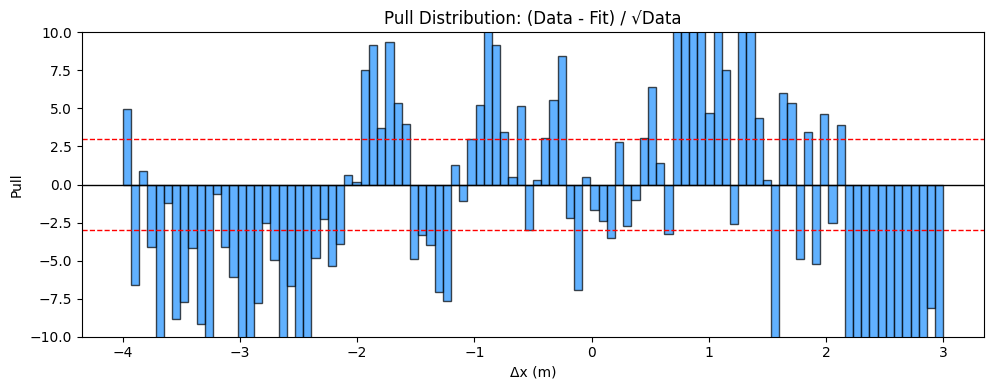

Total events in range (-0.4, 0.4):
  Sim Proton:   4015.10
  Sim Neutron:  26360.92
  Background:   24642.40
  Total:        55018.41
Fraction of events in range (-0.4, 0.4):
Proton Fraction: 0.07
Background Fraction: 0.45
Neutron Fraction: 0.48


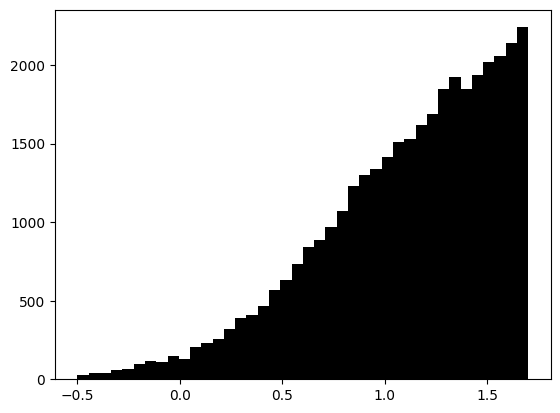

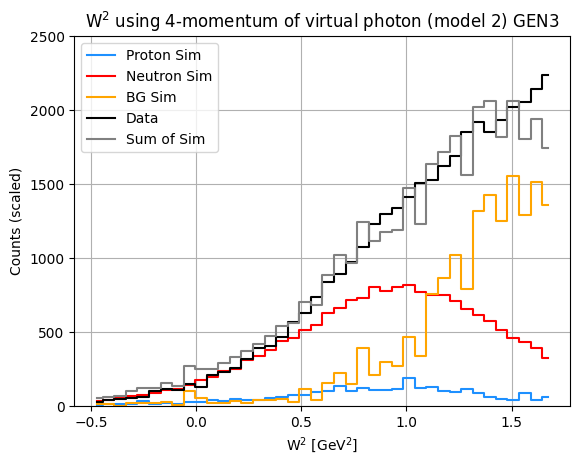

N_plus: 11309 N_minus: 11424
f_acc: 0.0736+=0.0012 A_acc: -0.005059+-0.0066
f_p: 0.0730+=0.0012 A_p: 0.0000192
N_plus: 26035 N_minus: 25802
A_raw: 0.0045+=0.0044
A_phys_weighted_avg: 0.05265+-0.04574+-0.00905
Combined Error: 0.04662
epsilon = 0.6286416276846806
tau_avg = 1.834262974763673
Q2 = 6.455461091071875
Px: 0.9917 Pz: -0.0233
A = 0.01804 ± 0.01598
B = 0.50034 (no propagated error)
C = 0.03452 ± 0.04662
GEn/GMn*muN: 0.13212+--0.17890


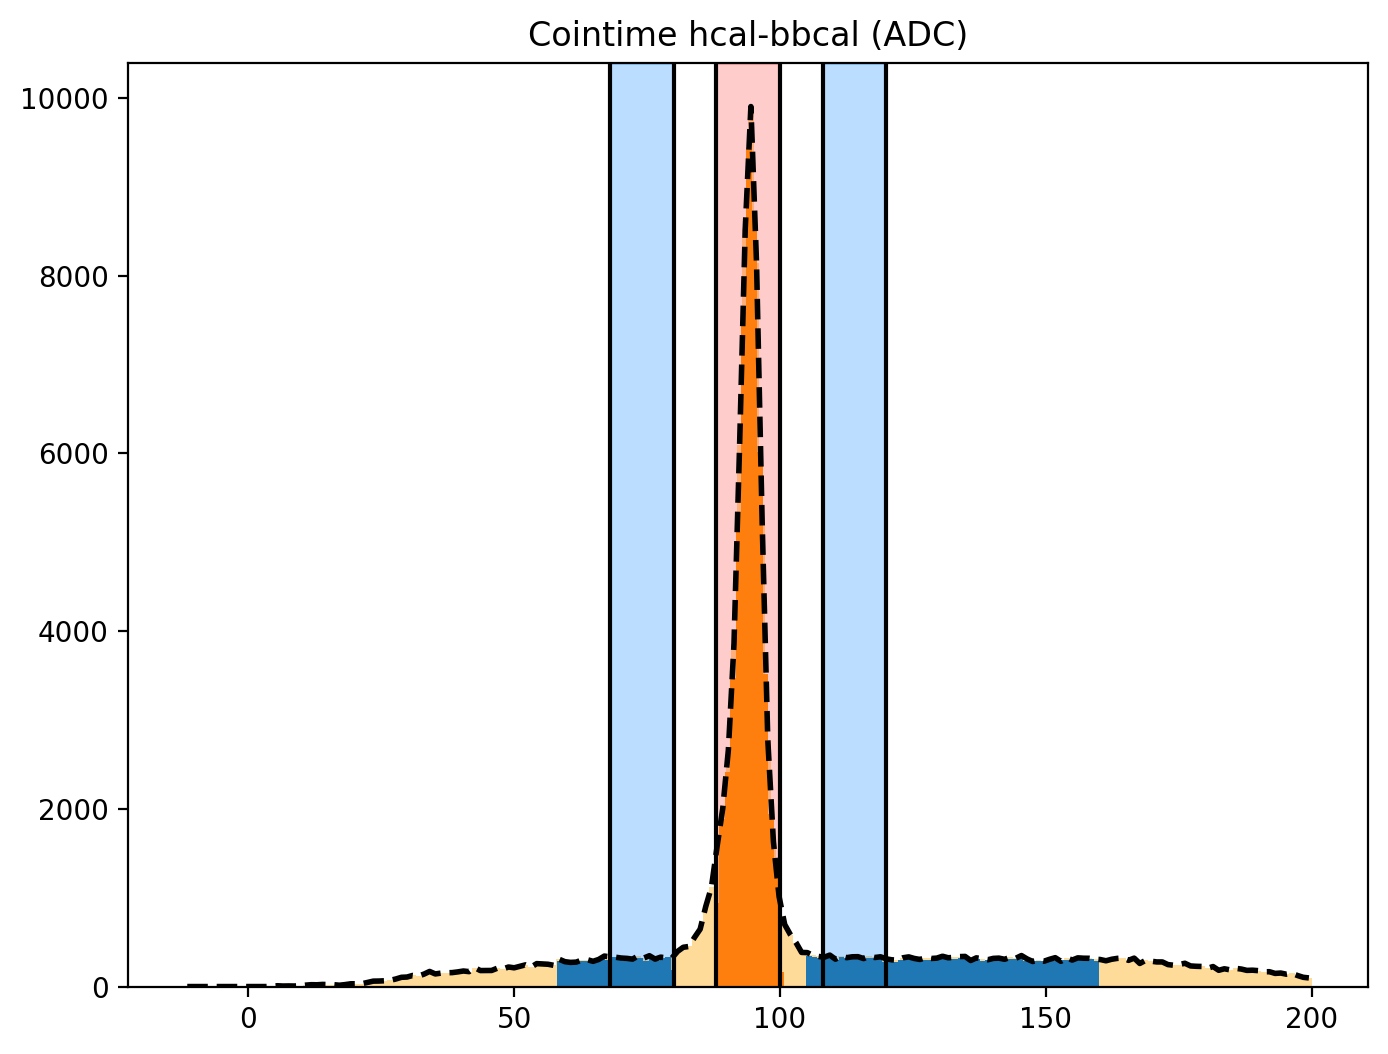

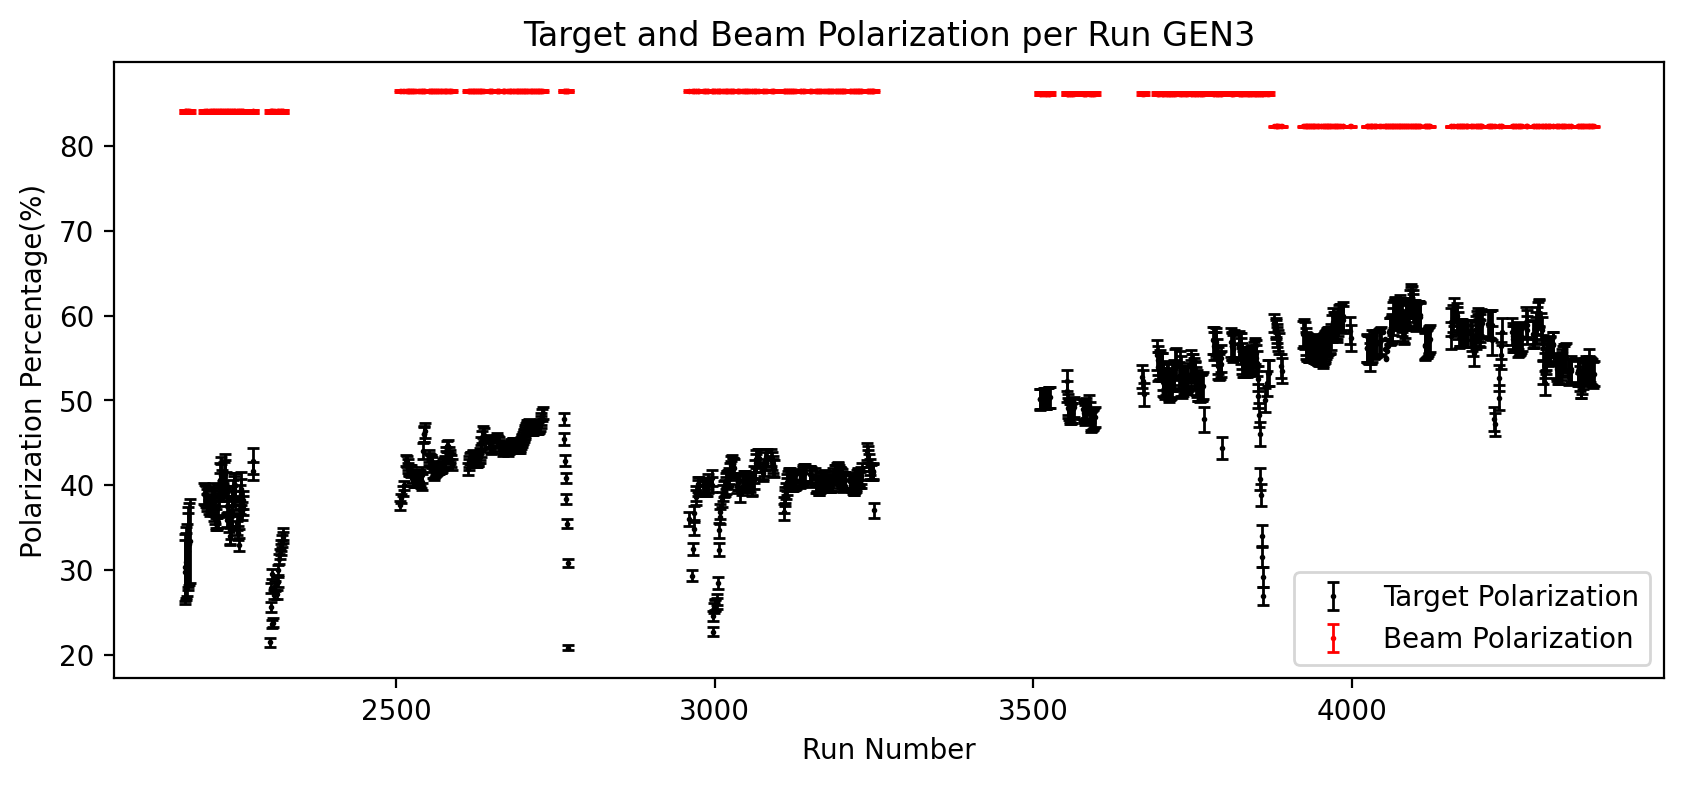

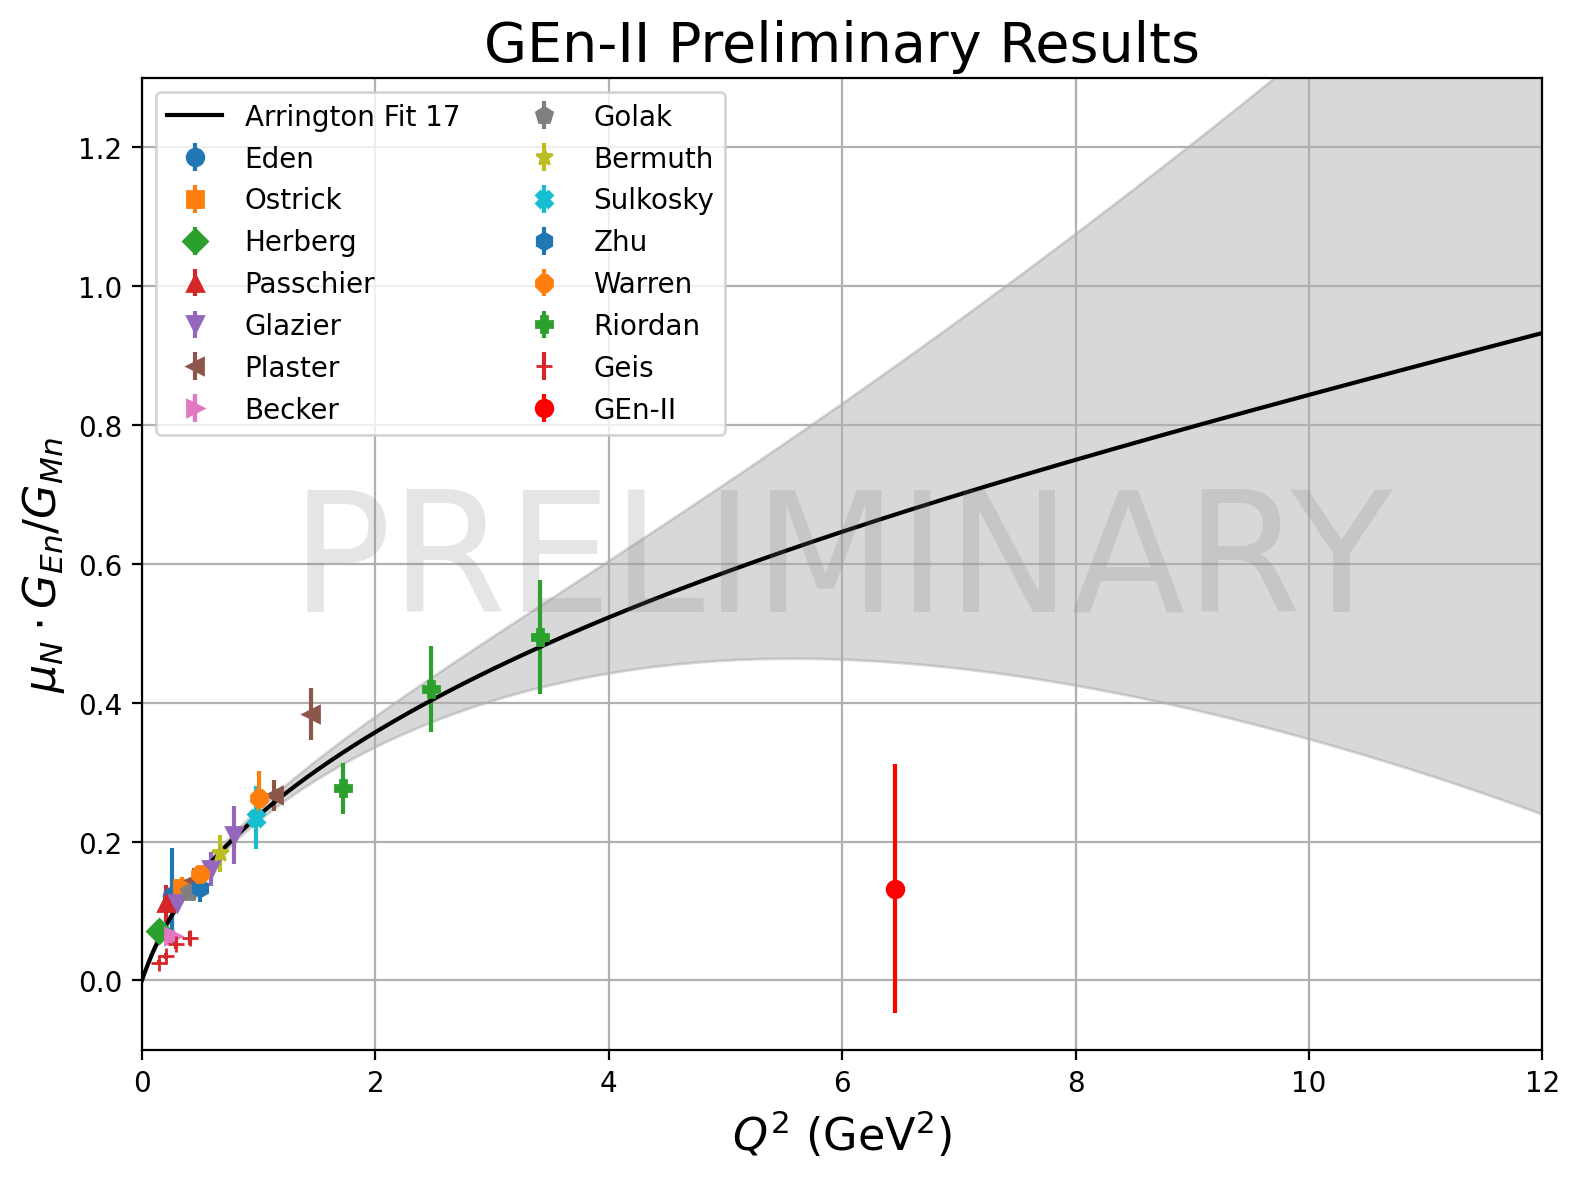

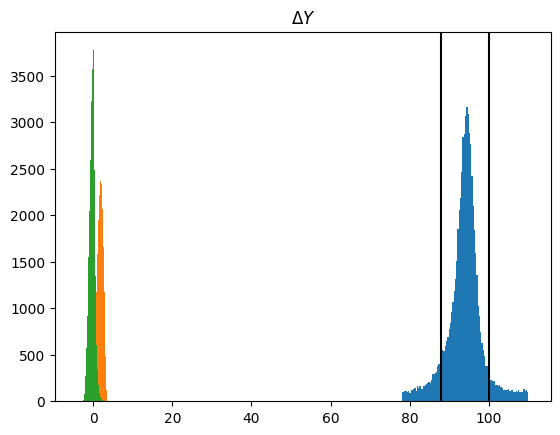

<Figure size 2000x1200 with 0 Axes>

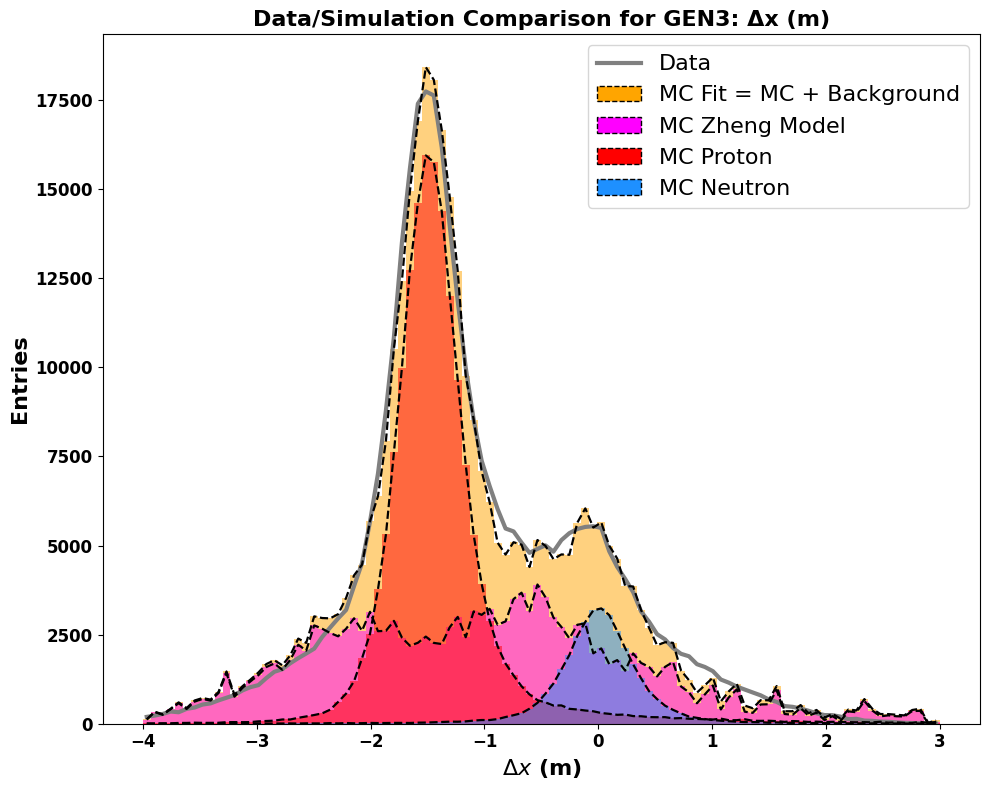

Total entries in fit: 353725.731637194
χ² = 35046.24
ndf = 97
Reduced χ² = 361.30


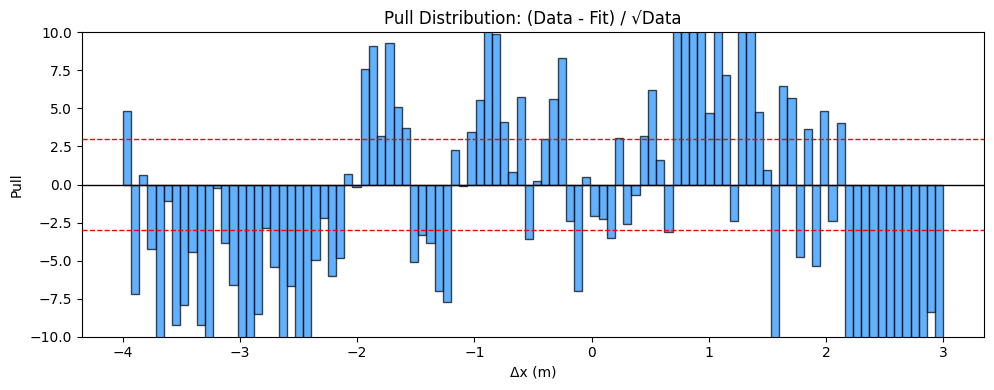

Total events in range (-0.4, 0.4):
  Sim Proton:   4071.19
  Sim Neutron:  27017.83
  Background:   26399.53
  Total:        57488.56
Fraction of events in range (-0.4, 0.4):
Proton Fraction: 0.07
Background Fraction: 0.46
Neutron Fraction: 0.47


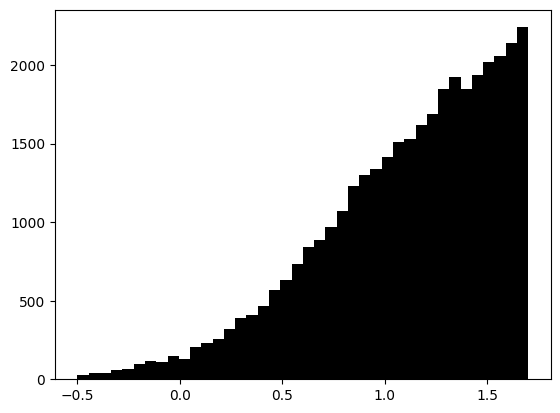

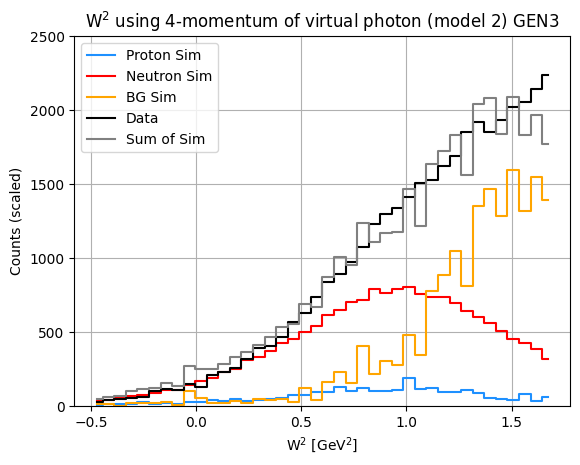

N_plus: 12054 N_minus: 12080
f_acc: 0.0746+=0.0012 A_acc: -0.001077+-0.0064
f_p: 0.0708+=0.0011 A_p: 0.0000192
N_plus: 27465 N_minus: 26664
A_raw: 0.0148+=0.0043
A_phys_weighted_avg: 0.15422+-0.04627+-0.02197
Combined Error: 0.05122
epsilon = 0.629676333743742
tau_avg = 1.8276420192959757
Q2 = 6.432159459301793
Px: 0.9917 Pz: -0.0222
A = 0.05313 ± 0.01765
B = 0.50096 (no propagated error)
C = 0.13696 ± 0.05122
GEn/GMn*muN: 0.53835+--0.20782


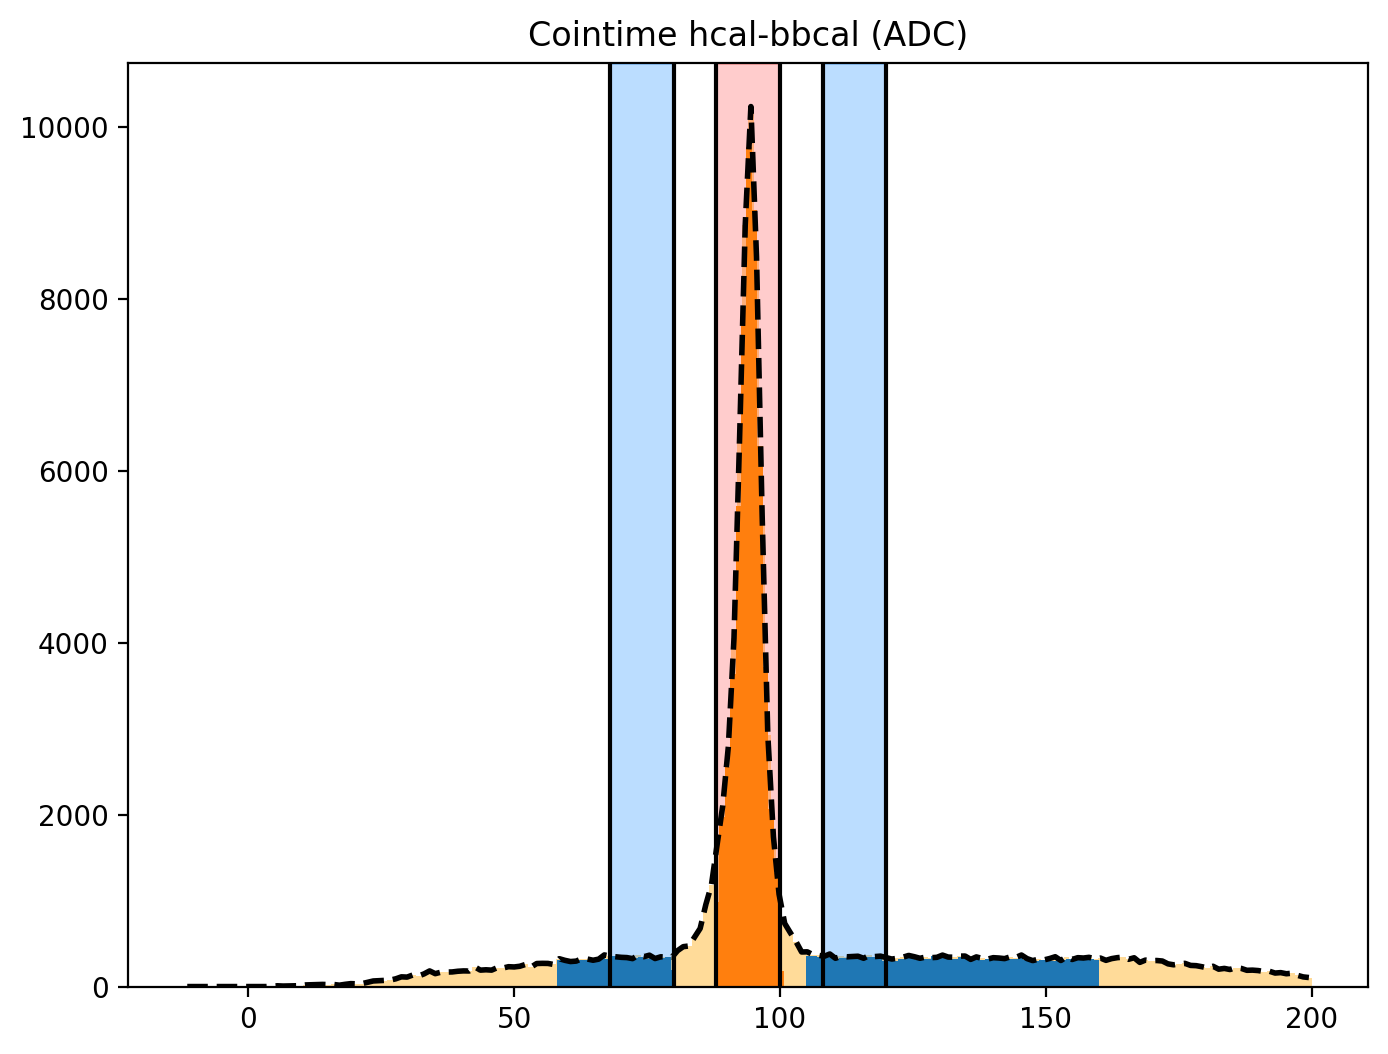

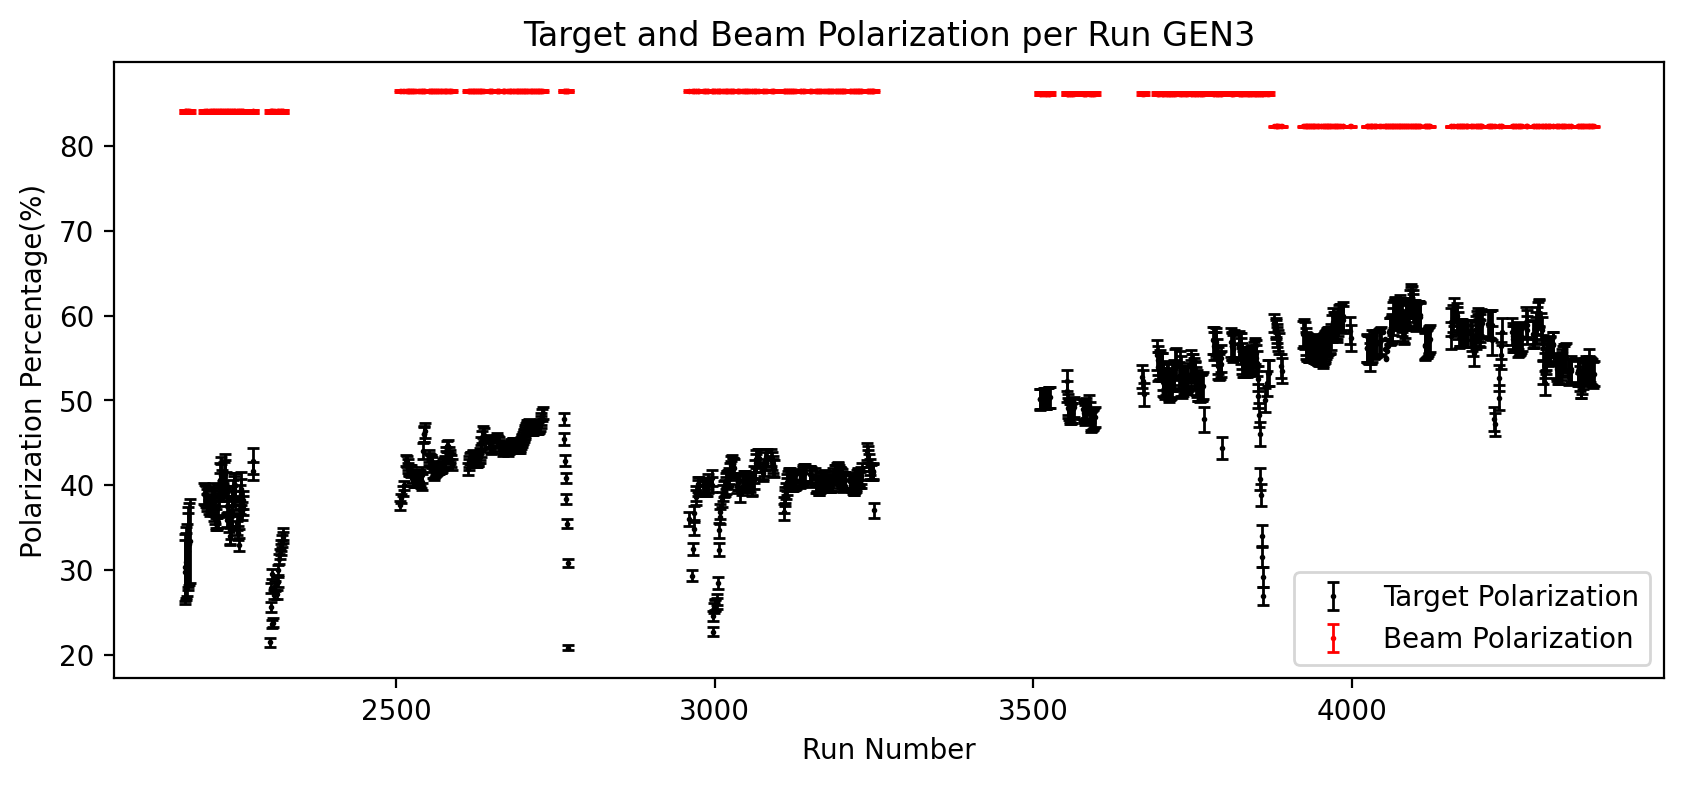

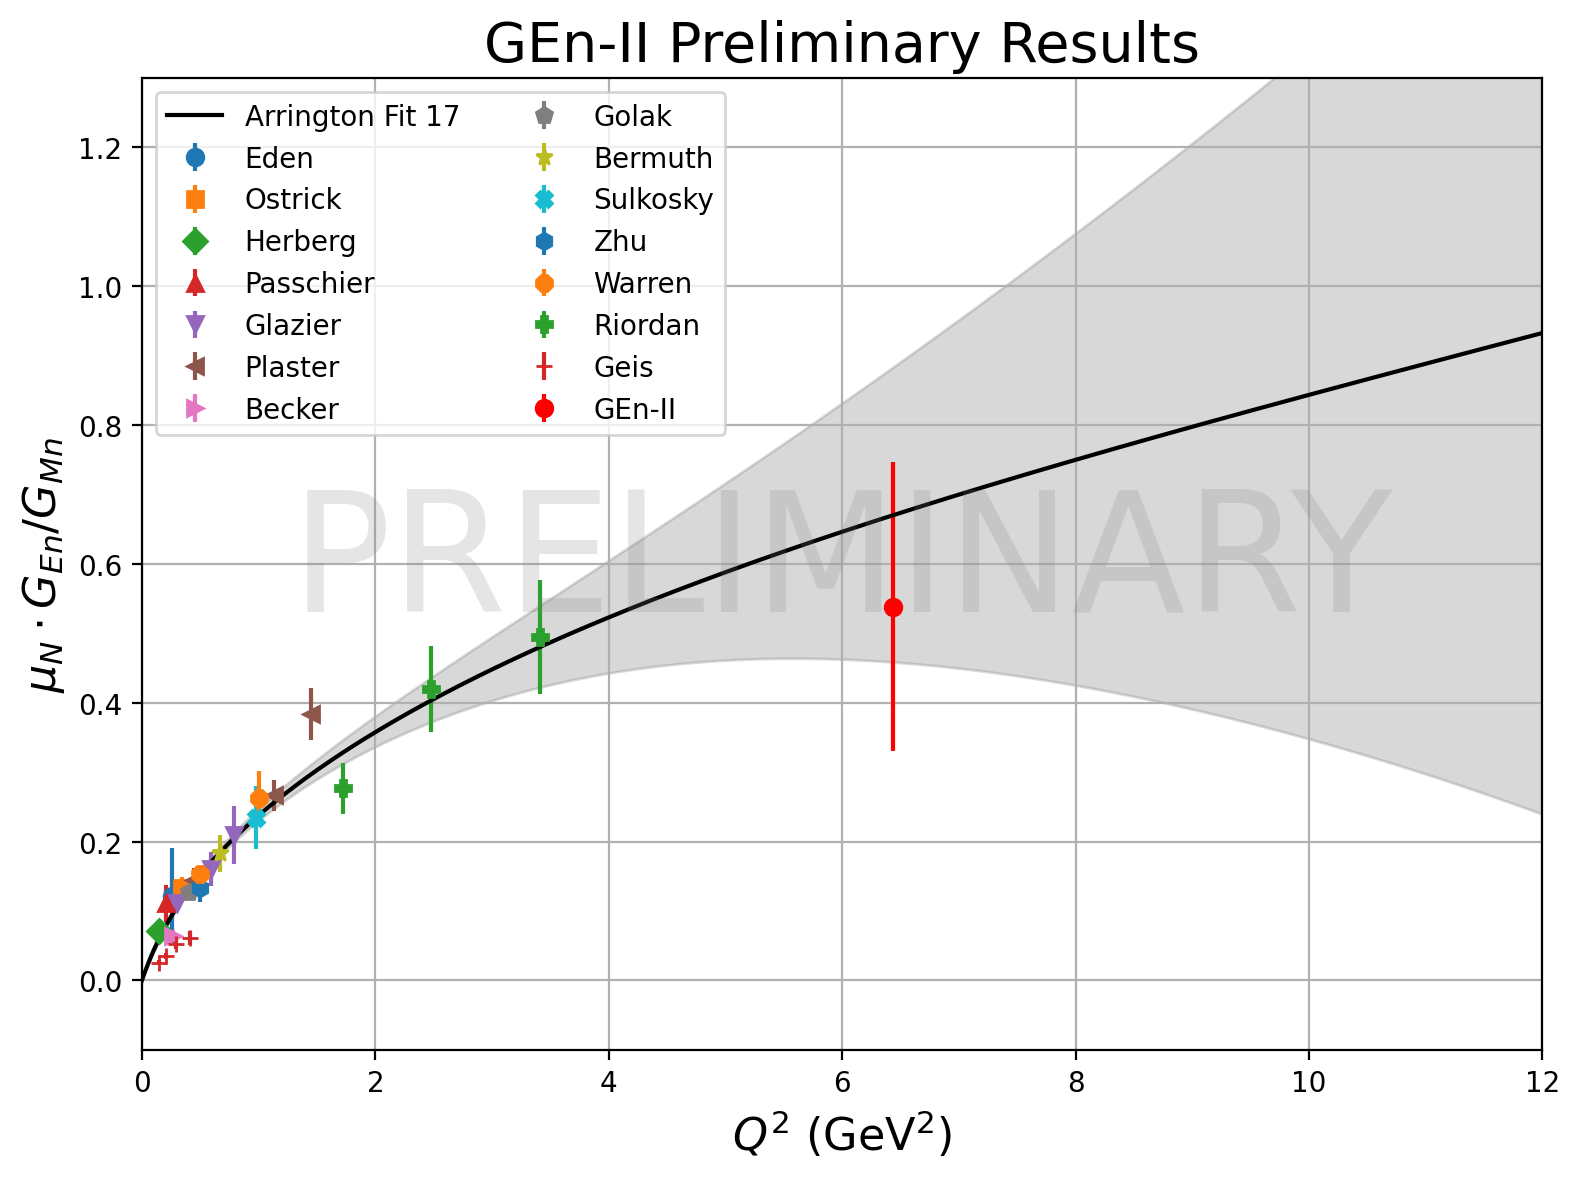

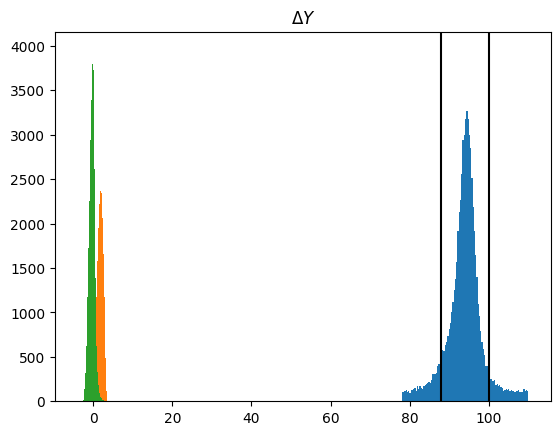

<Figure size 2000x1200 with 0 Axes>

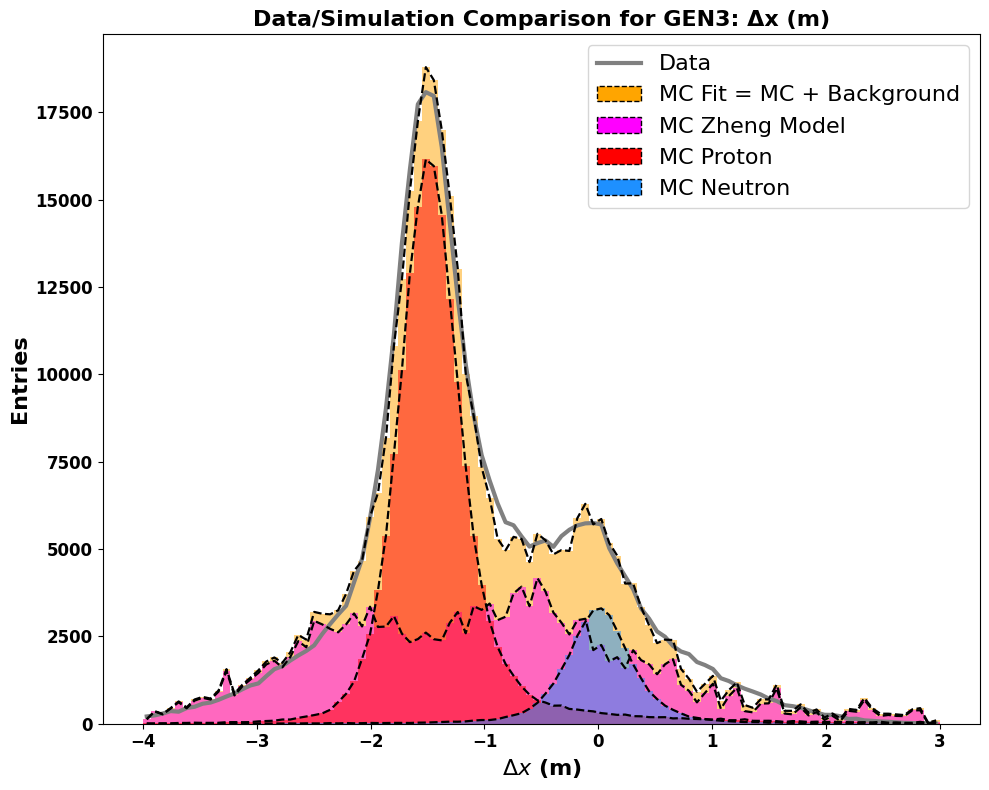

Total entries in fit: 366784.311086863
χ² = 38141.03
ndf = 97
Reduced χ² = 393.21


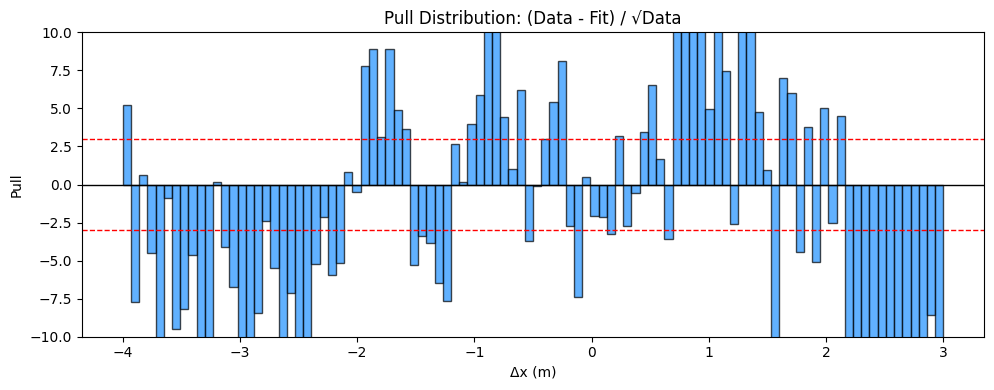

Total events in range (-0.4, 0.4):
  Sim Proton:   4123.52
  Sim Neutron:  27570.58
  Background:   28159.76
  Total:        59853.86
Fraction of events in range (-0.4, 0.4):
Proton Fraction: 0.07
Background Fraction: 0.47
Neutron Fraction: 0.46


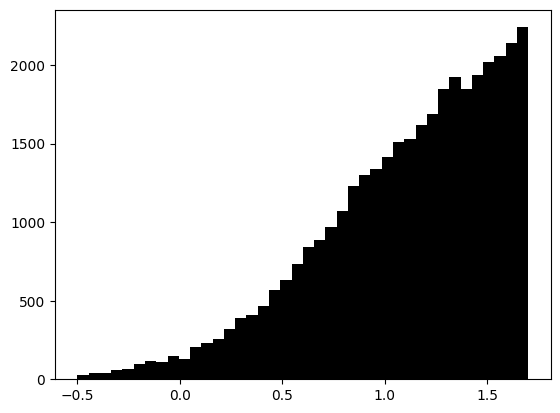

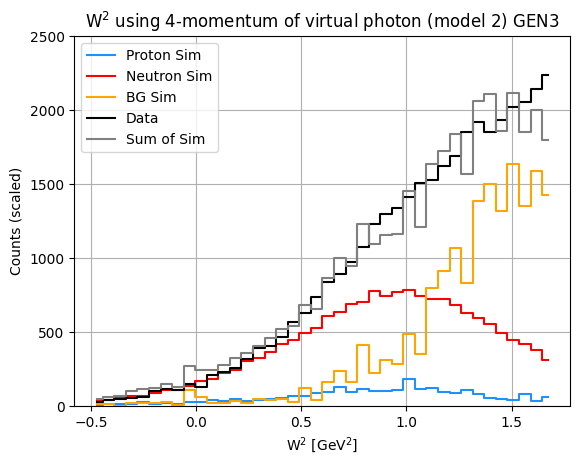

N_plus: 12712 N_minus: 12851
f_acc: 0.0761+=0.0012 A_acc: -0.005438+-0.0063
f_p: 0.0689+=0.0011 A_p: 0.0000192
N_plus: 28288 N_minus: 28010
A_raw: 0.0049+=0.0042
A_phys_weighted_avg: 0.06111+-0.04702+-0.01018
Combined Error: 0.04811
epsilon = 0.6306737451993581
tau_avg = 1.8213659661157195
Q2 = 6.410071668364475
Px: 0.9917 Pz: -0.0212
A = 0.02116 ± 0.01666
B = 0.50156 (no propagated error)
C = 0.04465 ± 0.04811
GEn/GMn*muN: 0.17072+--0.18463


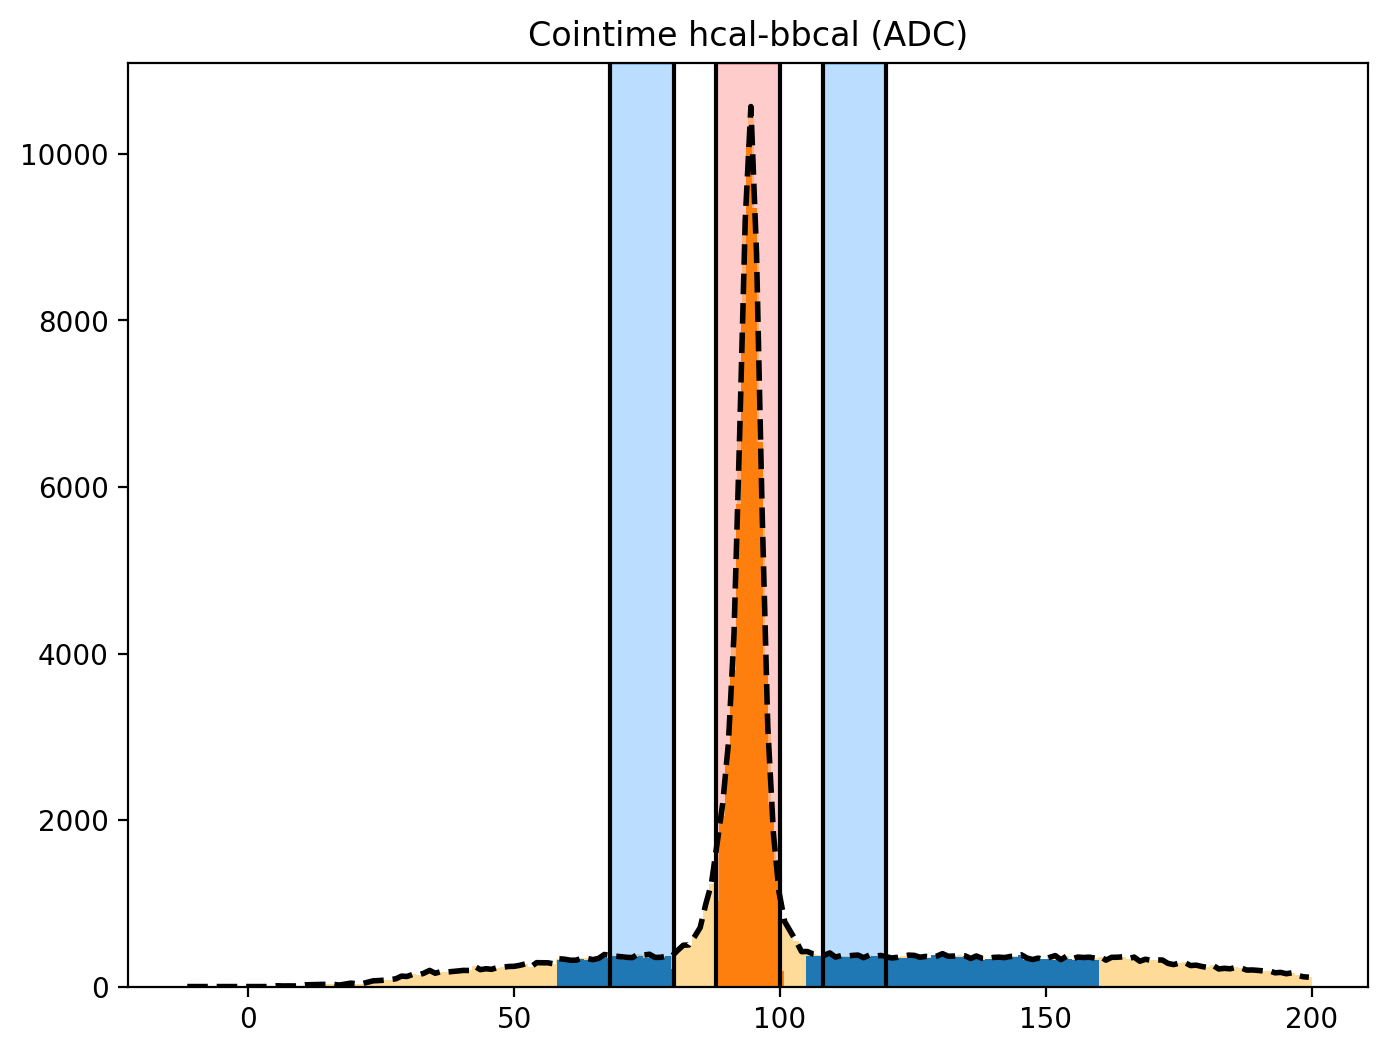

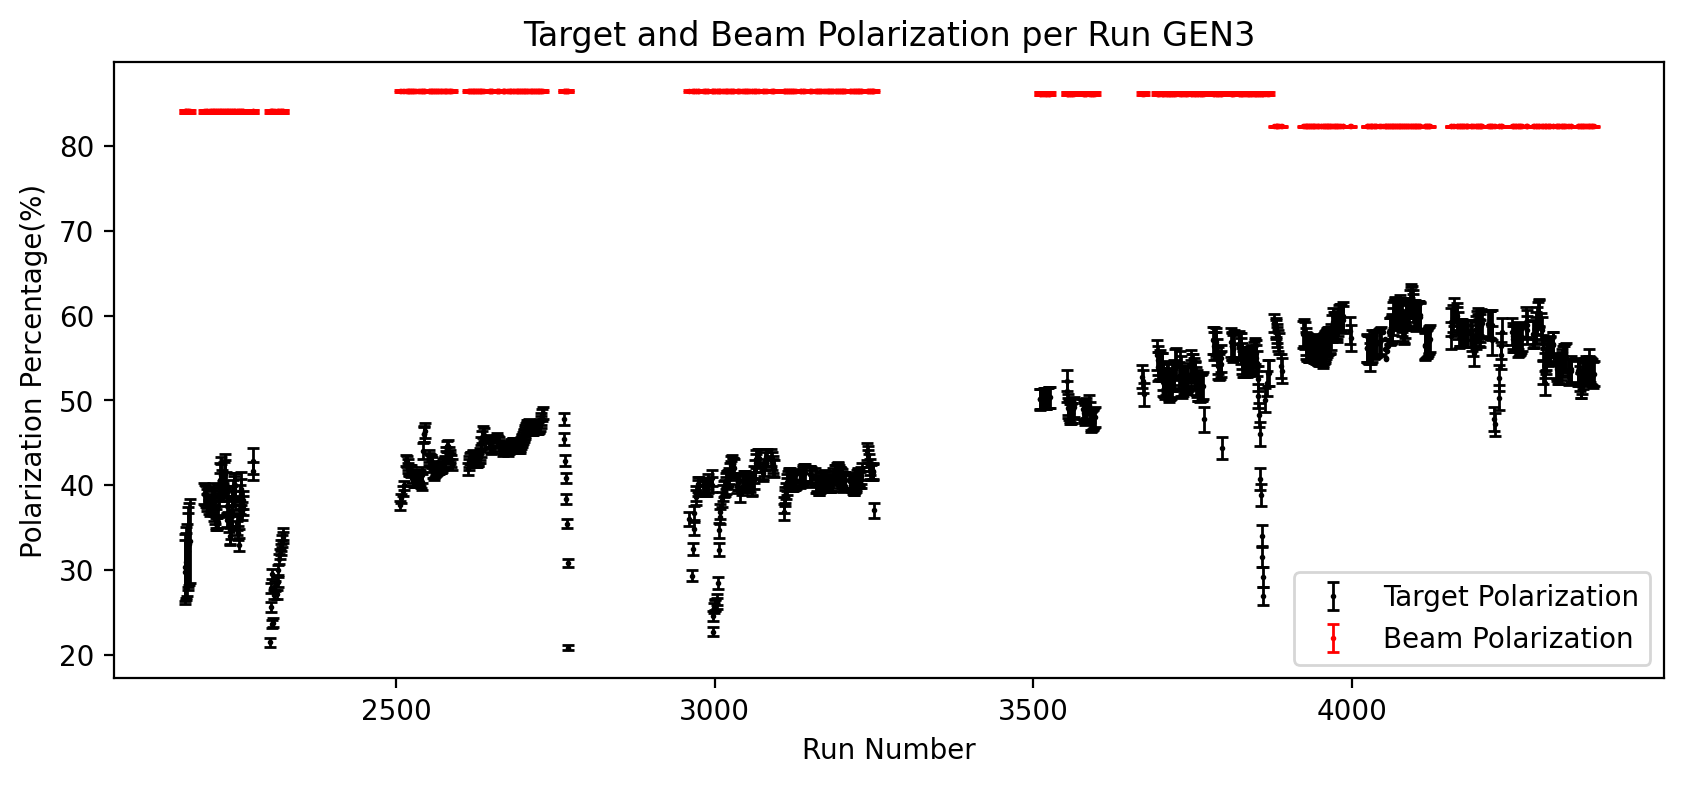

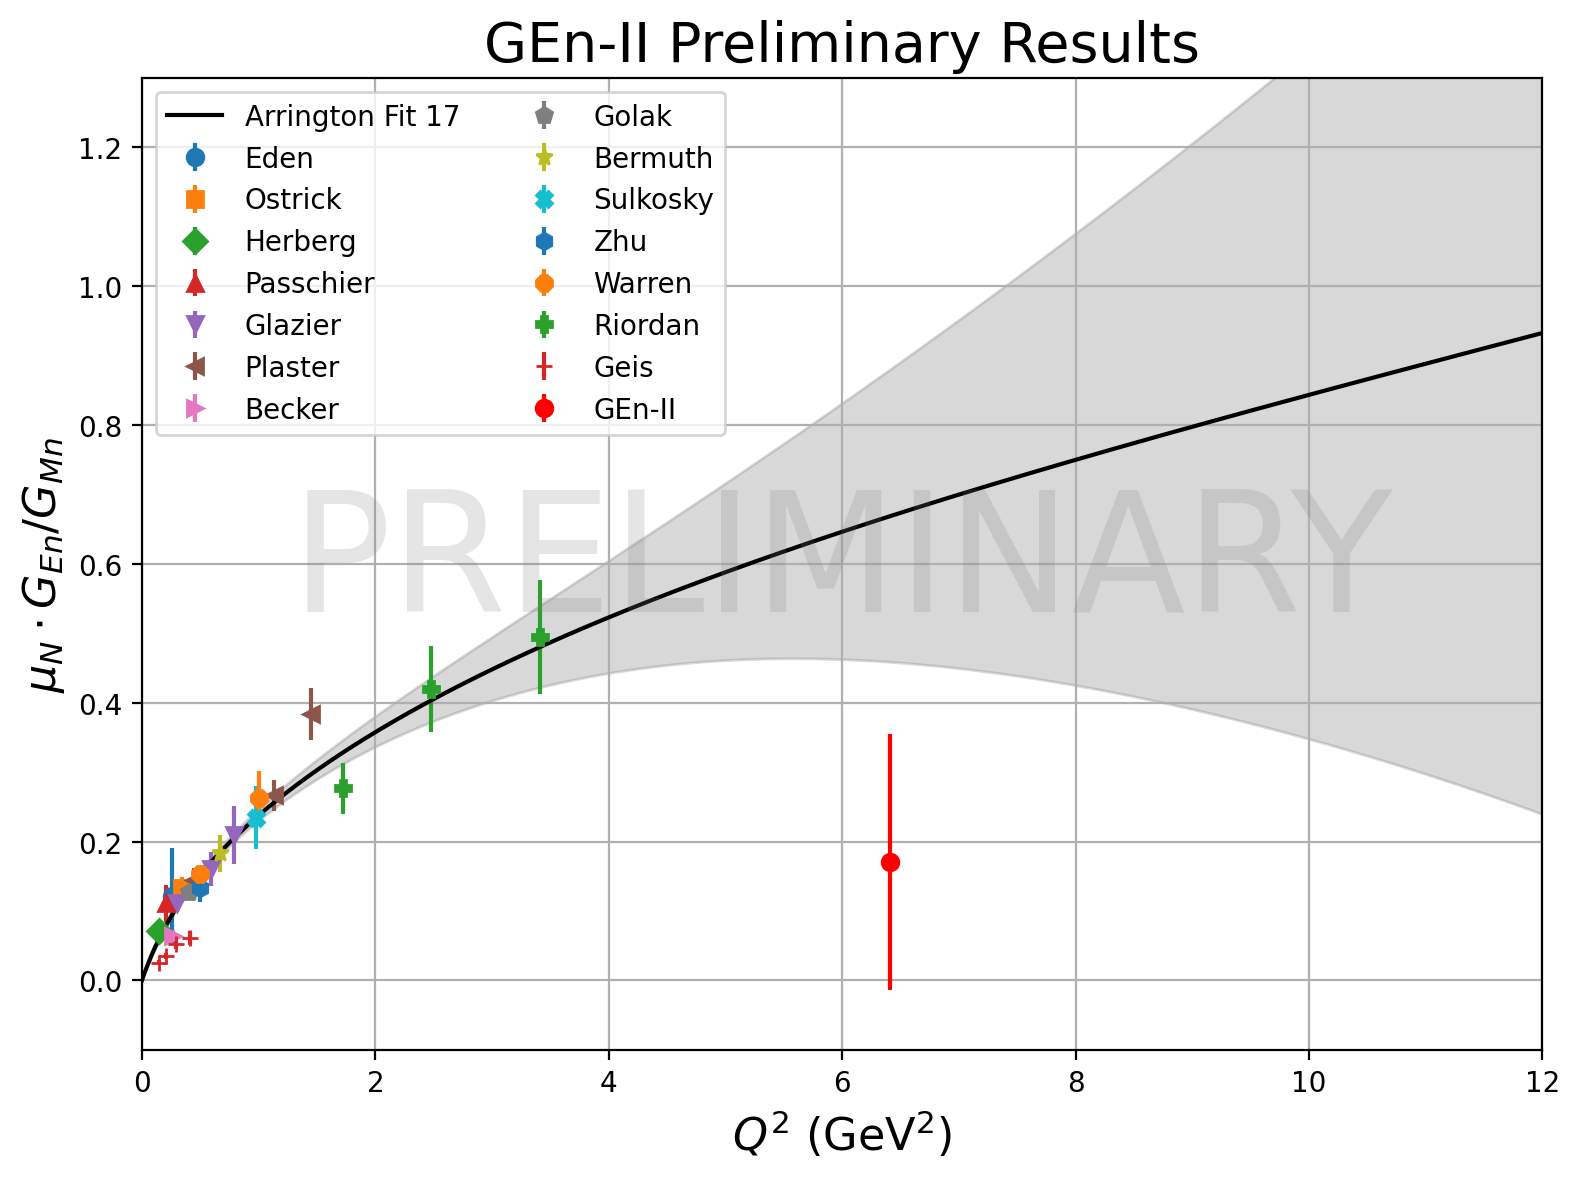

In [13]:
change=np.linspace(0,.5,10)
for i in range(0,len(change)):   
    IHWP_IN=np.where(generic["IHWP"]==1)
    helicity=generic["helicity"]
    helicity[IHWP_IN]*=-1

    ### Cuts for data, bgsim, np sim 

    wcut=(generic["W2"] < W2max+change[i])&(generic["W2"]>W2min-change[i]) 
    dycut=(abs(generic["dy"]) < 0.5) 
    dxcut=(generic["dx"] < dxmax)&(generic["dx"]>dxmin) 
    coincut=(coinmin < generic["coin_time"])&(generic["coin_time"] < coinmax)
    fullcut=wcut & dycut & dxcut & coincut
    if config=="2":
        grinchcut=(generic["BBgr_clus_size"]>4)&(generic["BBgr_clus_trackindex"]==0)
        pscut=(generic["ePS"]>.2)
        fullcutNoGrinch=fullcut & pscut
        fullcutWithGrinch=fullcut&grinchcut
        fullcut=fullcutWithGrinch


    anticoincut=(coinmin-8 > generic["coin_time"])|(generic["coin_time"] > coinmax+5)

    hpluscut=helicity==1
    hminuscut=helicity==-1

    bgcut=(genericSimIN["W2"] < W2max)&(genericSimIN["W2"]>W2min)&(abs(genericSimIN["dy"]) < 0.5) 

    Simwcut=(genericSim["W2"] < W2max)&(genericSim["W2"]>W2min) 
    Simdycut=(abs(genericSim["dy"]) < 0.5) 
    Simdxcut=(genericSim["dx"] < dxmax)&(genericSim["dx"]>dxmin) 
    Simfullcut=Simwcut & Simdycut & Simdxcut

    InSimdxcut=(genericSimIN["dx"] < dxmax)&(genericSimIN["dx"]>dxmin)
    InSimdycut=(genericSimIN["dy"] < dymax)&(genericSimIN["dy"]>dymin)



    # Data Histograms

    d=plt.hist(generic["coin_time"][wcut&dycut&dxcut],bins=100,range=(coinmin-10,coinmax+10))
    plt.title("Cointime hcal-bbcal (ADC)")
    plt.axvline(coinmin,color='black')
    plt.axvline(coinmax,color='black')
    coinmax-coinmin

    coinmax

    d=plt.hist(generic["W2"][dycut&dxcut&coincut],bins=100)
    plt.title(r"W$^2$ using 4-momentum of virtual photon (model 2)")

    d=plt.hist(generic["dy"][coincut&wcut&dxcut],bins=100)
    plt.title(r"$\Delta Y$")

    if config=="2":
        d=plt.hist(generic["ePS"],bins=100,range=(0,2),label="No grinch",color='dodgerblue',alpha=.5)
        d=plt.hist(generic["ePS"][grinchcut],bins=100,range=(0,2),label="Grinch cut",color='red',alpha=.5)
        #plt.yscale('log')
        plt.legend(loc='upper right')
        plt.ylim(0,400000)

    # Simulation Histograms

    ### Quasi Elastic

    protoncut=genericSim["fnucl"]==1
    neutroncut=genericSim["fnucl"]==0
    weight=genericSim["weight"]

    hdx_sim_p=plt.hist(genericSim["dx"][protoncut],range=(-4,4),bins=100,color='red',weights=weight[protoncut],alpha=.5)
    hdx_sim_n=plt.hist(genericSim["dx"][neutroncut],range=(-4,4),bins=100,color='dodgerblue',weights=weight[neutroncut],alpha=.5)




    ### Inelastic

    inweight=genericSimIN["weight"]
    hdx_sim_bg=plt.hist(genericSimIN["dx"][bgcut],range=(-4,4),bins=100,weights=inweight[bgcut],color='magenta',alpha=.5)






    # Fit dX



    plt.figure(figsize=(10,6),dpi=200)

    counts_p, bin_edges = np.histogram(genericSim["dx"][protoncut], bins=100, range=(-4, 3), weights=weight[protoncut])
    counts_n, _         = np.histogram(genericSim["dx"][neutroncut], bins=bin_edges, weights=weight[neutroncut])
    counts_bg,_         = np.histogram(genericSimIN["dx"][bgcut],bins=bin_edges,weights=genericSimIN["weight"][bgcut])
    counts_acc,_        =np.histogram(generic["dx"][wcut&dycut&anticoincut],bins=bin_edges)
    if config=="2":
        counts_data, _      = np.histogram(generic["dx"][dycut & coincut & wcut&grinchcut], bins=bin_edges)
    else:
        counts_data, _      = np.histogram(generic["dx"][dycut & coincut & wcut], bins=bin_edges)

    counts_p = counts_p.astype(float)
    counts_n = counts_n.astype(float)
    counts_bg = counts_bg.astype(float)
    counts_acc = counts_acc.astype(float)
    counts_data = counts_data.astype(float)
    bin_centers         = (bin_edges[:-1] + bin_edges[1:]) / 2
    shape=("from data")
    fit_obj = DistributionFits(bg_shape_option=shape)
    fit_obj.hdx_data = [bin_centers, counts_data]
    fit_obj.hdx_sim_p = [bin_centers, counts_p]
    fit_obj.hdx_sim_n = [bin_centers, counts_n]
    fit_obj.hdx_bg_data = [bin_centers, counts_bg] 
    fit_obj.hdx_acc_data = [bin_centers, counts_acc] 


    if shape=="from data+acc":
        bg_fit, total_fit, sim_p_scaled, sim_n_scaled,pop0,pop1,pop2,pop3,scale,acc_fit= fit_obj.He3_fit_dists(True)
    else:
        bg_fit, total_fit, sim_p_scaled, sim_n_scaled,pop0,pop1,pop2,scale= fit_obj.He3_fit_dists(True)



    import matplotlib.pyplot as plt
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    # Style config
    fig, ax = plt.subplots(figsize=(10, 8))
    lw = 1.6
    l = 3
    fs = 16
    fw = 'bold'
    a = 1  # transparency for bars
    bin_width = bin_centers[1] - bin_centers[0]

    # Optional override
    if config == "2":
        lw = 1
        l = 3
        typ = "4th Order Poly"
    else:
        typ = "Background Data"

    # --------- Data Line ---------
    #ax.bar(bin_centers, counts_data, width=bin_width, align='center', alpha=0.5, color='grey', label="Data")
    ax.plot(bin_centers, counts_data, '-', color='grey', linewidth=l, label='Data')

    # --------- Total Fit ---------
    ax.bar(bin_centers, total_fit, width=bin_width, align='center', alpha=0.5, color='orange', label="MC Fit = MC + Background")
    ax.plot(bin_centers, total_fit, '--', color='black', linewidth=lw)

    # --------- Inelastic ---------
    ax.bar(bin_centers, bg_fit, width=bin_width, align='center', alpha=0.5, color='magenta', label="MC Inelastic")
    ax.plot(bin_centers, bg_fit, '--', color='black', linewidth=lw)

    # --------- Accidental ---------
    #ax.bar(bin_centers, acc_fit, width=bin_width, align='center', alpha=0.5, color='magenta', label="MC Inelastic")
    #ax.plot(bin_centers, acc_fit, '--', color='black', linewidth=lw)

    # --------- Sim Proton ---------
    ax.bar(bin_centers, sim_p_scaled, width=bin_width, align='center', alpha=0.5, color='red', label="MC Proton")
    ax.plot(bin_centers, sim_p_scaled, '--', color='black', linewidth=lw)

    # --------- Sim Neutron ---------
    ax.bar(bin_centers, sim_n_scaled, width=bin_width, align='center', alpha=0.5, color='dodgerblue', label="MC Neutron")
    ax.plot(bin_centers, sim_n_scaled, '--', color='black', linewidth=lw)

    # --------- Custom Legend ---------
    legend_elements = [
        Line2D([0], [0], color='grey', linewidth=3, linestyle='-', label='Data'),
        Patch(facecolor='orange', edgecolor='black', linestyle='--', label='MC Fit = MC + Background', alpha=a),
        Patch(facecolor='magenta', edgecolor='black', linestyle='--', label='MC Zheng Model', alpha=a),
        Patch(facecolor='red', edgecolor='black', linestyle='--', label='MC Proton', alpha=a),
        Patch(facecolor='dodgerblue', edgecolor='black', linestyle='--', label='MC Neutron', alpha=a)
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=fs)

    # --------- Labels, ticks, etc. ---------
    ax.set_title(f'Data/Simulation Comparison for GEN{config}: Δx (m)', fontsize=fs, fontweight=fw)
    ax.set_xlabel(r'$\Delta x$ (m)', fontsize=fs, fontweight=fw)
    ax.set_ylabel('Entries', fontsize=fs, fontweight=fw)
    ax.tick_params(axis='both', labelsize=fs-4)
    plt.xticks(fontsize=fs-4, fontweight=fw)
    plt.yticks(fontsize=fs-4, fontweight=fw)
    plt.tight_layout()

    # --------- Save and show ---------
    #plt.savefig(f'../plots/DataSimPass{pas}GEN{config}.png')
    plt.show()

    # Optional: Check total counts
    print("Total entries in fit:", np.sum(total_fit))


    def compute_reduced_chi2(y_obs, y_fit, n_params):
        valid = y_obs > 0  # Ignore bins with no data
        residuals = y_obs[valid] - y_fit[valid]
        errors = np.sqrt(y_obs[valid] + (0.03 * y_obs[valid])**2)  # 2% systematic uncertainty

        chi2 = np.sum((residuals / errors)**2)

        dof = np.sum(valid) - n_params
        reduced_chi2 = chi2 / dof if dof > 0 else np.nan

        return reduced_chi2, chi2, dof
    n_fit_params = 3  # Norm_overall, R_pn, Bg_norm — from 'from data' bg, so no bg shape params

    reduced_chi2, chi2, dof = compute_reduced_chi2(counts_data, total_fit, n_fit_params)

    print(f"χ² = {chi2:.2f}")
    print(f"ndf = {dof}")
    print(f"Reduced χ² = {reduced_chi2:.2f}")


    def compute_log_likelihood(y_obs, y_fit):
        valid = y_obs > 0
        ratio = y_obs[valid] / y_fit[valid]
        ll = 2 * np.sum(y_obs[valid] * np.log(ratio))
        return ll


    compute_log_likelihood(counts_data,total_fit)

    import numpy as np
    import matplotlib.pyplot as plt

    def plot_pulls(x, data_counts, model_counts):
        # Only compute pulls where data > 0 to avoid divide-by-zero
        valid = data_counts > 0
        pulls = np.zeros_like(data_counts)
        pulls[valid] = (data_counts[valid] - model_counts[valid]) / np.sqrt(data_counts[valid])

        plt.figure(figsize=(10, 4))
        plt.axhline(0, color='black', lw=1)
        plt.axhline(3, color='red', ls='--', lw=1)
        plt.axhline(-3, color='red', ls='--', lw=1)
        plt.bar(x, pulls, width=(x[1] - x[0]), alpha=0.7, color='dodgerblue', edgecolor='black')
        plt.xlabel("Δx (m)")
        plt.ylabel("Pull")
        plt.title("Pull Distribution: (Data - Fit) / √Data")
        plt.tight_layout()
        plt.ylim(-10,10)
        #plt.xlim(dxmin,dxmax)

        plt.show()
    plot_pulls(bin_centers, counts_data, total_fit)

    # Fit Fractions

    # Find indices of bins within dxmin and dxmax
    mask = (bin_centers >= dxmin) & (bin_centers <= dxmax)

    # Sum the corresponding bin contents
    N_p  = np.sum(sim_p_scaled[mask])
    N_n  = np.sum(sim_n_scaled[mask])
    N_bg = np.sum(bg_fit[mask])
    if shape=="from data+acc":
        N_acc = np.sum(acc_fit[mask])
    N_total = np.sum(total_fit[mask])


    print(f"Total events in range ({dxmin}, {dxmax}):")
    print(f"  Sim Proton:   {N_p:.2f}")
    print(f"  Sim Neutron:  {N_n:.2f}")
    print(f"  Background:   {N_bg:.2f}")
    if shape=="from data+acc":
        print(f"  Accidental:   {N_acc:.2f}")

    print(f"  Total:        {N_total:.2f}")


    f_p=N_p/N_total
    f_bg=N_bg/N_total
    f_n=N_n/N_total
    f_p_error=f_p * math.sqrt(1 / N_p + 1 / N_total)
    f_bg_error=f_bg* math.sqrt(1 / N_bg + 1 / N_total)
    f_n_error=f_n* math.sqrt(1 / N_n + 1 / N_total)

    print(f"Fraction of events in range ({dxmin}, {dxmax}):")
    print(f"Proton Fraction: {f_p:.2f}")
    print(f"Background Fraction: {f_bg:.2f}")
    print(f"Neutron Fraction: {f_n:.2f}")

    # W2 Spectra

    neutronW2=neutroncut&Simdycut&Simdxcut
    protonW2=protoncut&Simdycut&Simdxcut
    bgW2=InSimdycut&InSimdxcut
    dataW2=dycut&dxcut&coincut


    # Data (no scaling/normalization for raw data)
    hist_data = plt.hist(generic["W2"][dataW2], bins=40, range=(-.5, 1.7), color='black')
    counts_data, bins_data = hist_data[0], hist_data[1]
    scale=np.sum(counts_data)

    # Sim proton
    hist_p = plt.hist(genericSim["W2"][protonW2], bins=40,weights=weight[protonW2], range=(-.5, 1.7), color='dodgerblue', alpha=0.5)
    counts_p, bins_p = hist_p[0], hist_p[1]
    norm_counts_p = counts_p / np.sum(counts_p)
    scaled_counts_p = norm_counts_p *f_p

    # Sim neutron
    hist_n = plt.hist(genericSim["W2"][neutronW2], bins=40, weights=weight[neutronW2],range=(-.5, 1.7), color='red', alpha=0.5)
    counts_n, bins_n = hist_n[0], hist_n[1]
    norm_counts_n = counts_n / np.sum(counts_n)
    scaled_counts_n = norm_counts_n * (f_n)

    # Background
    hist_bg = plt.hist(genericSimIN["W2"][bgW2], bins=40,weights=genericSimIN["weight"][bgW2], range=(-.5, 1.7), color='orange', alpha=0.5)
    counts_bg, bins_bg = hist_bg[0], hist_bg[1]
    norm_counts_bg = counts_bg / np.sum(counts_bg)
    scaled_counts_bg = norm_counts_bg * (f_bg)


    # Bin centers
    bin_centers_p = 0.5 * (bins_p[1:] + bins_p[:-1])
    bin_centers_n = 0.5 * (bins_n[1:] + bins_n[:-1])
    bin_centers_bg = 0.5 * (bins_bg[1:] + bins_bg[:-1])
    bin_centers_data = 0.5 * (bins_data[1:] + bins_data[:-1])

    # Plot
    plt.figure()
    plt.step(bin_centers_p, scaled_counts_p*scale, where='mid', color='dodgerblue', label='Proton Sim')
    plt.step(bin_centers_n, scaled_counts_n*scale, where='mid', color='red', label='Neutron Sim')
    plt.step(bin_centers_bg, scaled_counts_bg*scale, where='mid', color='orange', label='BG Sim')
    plt.step(bin_centers_data, counts_data, where='mid', color='black', label='Data')
    plt.step(bin_centers_data, scaled_counts_p*scale+scaled_counts_n*scale+scaled_counts_bg*scale, where='mid', color='grey', label='Sum of Sim')

    plt.title(r"W$^2$ using 4-momentum of virtual photon (model 2) GEN3")
    plt.xlabel(r"W$^2$ [GeV$^2$]")
    plt.ylabel("Counts (scaled)")
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 2500)
    plt.show()


    # Corrections

    ### Accidentals


    accBinRange=100
    plt.figure(figsize=(8,6),dpi=200)
    coin_hist,coin_edges=np.histogram(generic["coin_time"][wcut&dycut&dxcut],bins=200,range=(coinmin-accBinRange,coinmax+accBinRange))
    coin_centers= (coin_edges[:-1] + coin_edges[1:]) / 2

    d=plt.hist(generic["coin_time"][wcut&dycut&dxcut],bins=200,range=(coinmin-accBinRange,coinmax+accBinRange),color='orange',alpha=.4)
    plt.plot(coin_centers, coin_hist,'--',color='black',linewidth=2)

    plt.title("Cointime hcal-bbcal (ADC)")

    plt.axvline(coinmin,color='black')
    plt.axvline(coinmax,color='black')
    plt.axvspan(coinmin, coinmax, color='red', alpha=0.2)

    plt.axvline(coinmin+20,color='black')
    plt.axvline(coinmax+20,color='black')
    plt.axvspan(coinmin+20, coinmax+20, color='dodgerblue', alpha=0.3)

    plt.axvline(coinmin-20,color='black')
    plt.axvline(coinmax-20,color='black')
    plt.axvspan(coinmin-20, coinmax-20, color='dodgerblue', alpha=0.3)

    outside_coin_right=(coin_centers >= coinmin+20) & (coin_centers <= coinmax+20)
    outside_coin_left=(coin_centers >= coinmin-20) & (coin_centers <= coinmax-20)
    inside_coin=(coin_centers >= coinmin) & (coin_centers <= coinmax)

    outside_number=(np.sum(coin_hist[outside_coin_right])+np.sum(coin_hist[outside_coin_left]))/2
    inside_number=(np.sum(coin_hist[inside_coin]))

    f_acc=outside_number/inside_number
    f_acc_error=f_acc * math.sqrt(1 / outside_number + 1 / inside_number)

    plus_coin_hist,plus_coin_edges=np.histogram(generic["coin_time"][wcut&dycut&dxcut&hpluscut&anticoincut],bins=100,range=(coinmin-30,coinmax+60))
    minus_coin_hist,minus_coin_edges=np.histogram(generic["coin_time"][wcut&dycut&dxcut&hminuscut&anticoincut],bins=100,range=(coinmin-30,coinmax+60))
    plt.hist(generic["coin_time"][wcut&dycut&dxcut&anticoincut],bins=100,
            range=(coinmin-30,coinmax+60))
    plt.hist(generic["coin_time"][wcut&dycut&dxcut&coincut],bins=100,
            range=(coinmin-30,coinmax+60))
    coin_plus_total = np.sum(plus_coin_hist)
    coin_minus_total = np.sum(minus_coin_hist)

    A_acc=(coin_plus_total-coin_minus_total)/(coin_plus_total+coin_minus_total)
    A_acc_error=2*math.sqrt(coin_plus_total * coin_minus_total) / (coin_plus_total + coin_minus_total)**(3/2)
    print(f"N_plus: {coin_plus_total} N_minus: {coin_minus_total}")
    print(f"f_acc: {f_acc:.4f}+={f_acc_error:.4f} A_acc: {A_acc:.6f}+-{A_acc_error:.4f}")


    ### Inelastic

    ### Protons


    mup=2.793
    Q2=CONFIG.Function_JSON("Q2",f"../config/cuts{config}.cfg")
    def load_data(file_path):
        """
        Load the data from the given file path into a pandas DataFrame.
        """
        columns = ["Q2", "GEp/GD", "dGEp/GD", "dGEp_Par/GD", "GMp/mu_p/GD", "dGMp/mu_p/GD", "dGMp_Par/mu_p/GD"]
        data = pd.read_csv(file_path, delim_whitespace=True, comment='#', names=columns)
        return data
    def find_closest_row(data, input_Q2):
        """
        Find the row in the data with the Q2 value closest to the input_Q2.
        """
        closest_row = data.iloc[(data['Q2'] - input_Q2).abs().argmin()]
        return closest_row
    def main(input_Q2):
        file_path = '../DB/proton_lookup.dat'
        data = load_data(file_path)
        closest_row = find_closest_row(data, input_Q2)
        return closest_row
    row=main(Q2)
    R=np.round(row[1]/row[4]/mup,4)


    #in GeV^2
    m=.938
    if config=="2":
        tau=Q2/(4*m**2)
        theta=29.5*pi/180
    if config=="3":
        tau=Q2/(4*m**2)
        theta=36.5*pi/180
    if config=="4":
        tau=Q2/(4*m**2)
        theta=35*pi/180

    def Aperp(R, tau, theta):
        tan_half_theta = np.tan(np.radians(theta) / 2)
        numerator = -R * 2 * np.sqrt(tau * (tau + 1)) * tan_half_theta
        denominator = R**2 + (tau + 2 * tau * (1 + tau) * tan_half_theta**2)
        A_perp = numerator / denominator
        return A_perp

    Ap=Aperp(R,tau,theta)
    P_p=-.04 # seamus thesis
    P_beam=CONFIG.Function_JSON("Pbeam",f"../config/cuts{config}.cfg")
    P_target=CONFIG.Function_JSON("Ptarget",f"../config/cuts{config}.cfg")

    A_p=Ap*P_p*P_beam*P_target/100/100
    #Aphys_p=Ap*P_p*P_beam*P_target/100/100

    print(f"f_p: {f_p:.4f}+={f_p_error:.4f} A_p: {A_p:.7f}")

    ### Nitrogen

    ### Pions 

    # Raw Asymmetry

    N_minus_raw=len(np.where(helicity[fullcut]==-1)[0])
    N_plus_raw=len(np.where(helicity[fullcut]==1)[0])
    A_raw=(N_plus_raw-N_minus_raw)/(N_plus_raw+N_minus_raw)
    A_raw_error=2*math.sqrt(N_plus_raw * N_minus_raw) / (N_plus_raw + N_minus_raw)**(3/2)
    print(f"N_plus: {N_plus_raw} N_minus: {N_minus_raw}")
    print(f"A_raw: {A_raw:.4f}+={A_raw_error:.4f}")

    # Beam and Target Polarimetry

    plt.figure(figsize=(10,4),dpi=200)
    plt.errorbar(target_run_num,target_pol,target_polE,
                 fmt='o',capsize=2,linewidth=1,
                 color='black',markersize=1,
                 label="Target Polarization")
    plt.errorbar(target_run_num,beam_pol,beam_polE,
                 fmt='o',capsize=2,linewidth=1,
                 color='red',markersize=1,
                 label="Beam Polarization")
    plt.legend(loc="lower right")
    #plt.ylim(40, 50)  # This *calls* the function and sets the y-axis limits
    plt.title(f"Target and Beam Polarization per Run GEN{config}")
    plt.xlabel("Run Number")
    plt.ylabel("Polarization Percentage(%)")

    # Run Summation

    ### Asymmetry per run

    #helicity and runs with QE cuts
    runnums = generic["runnum"][fullcut]
    pluscut=helicity[fullcut]==1
    minuscut=helicity[fullcut]==-1
    #Unique runs and compute asymmetry
    unique_runnum, run_idx=np.unique(runnums, return_inverse=True)
    N_plus_per_run=np.bincount(run_idx, weights=pluscut.astype(int))
    N_minus_per_run=np.bincount(run_idx, weights=minuscut.astype(int))
    A_raw_per_run=(N_plus_per_run-N_minus_per_run)/(N_plus_per_run+N_minus_per_run)
    A_raw_error_per_run=2*(N_plus_per_run * N_minus_per_run)**(1/2) / (N_plus_per_run + N_minus_per_run)**(3/2)

    ### Polarizations per run

    matching_pol_runs_i = np.searchsorted(target_run_num, unique_runnum)
    P_beam_per_run = beam_pol[matching_pol_runs_i]/100
    P_beamE_per_run = beam_polE[matching_pol_runs_i]/100
    P_target_per_run = target_pol[matching_pol_runs_i]/100
    P_targetE_per_run = target_polE[matching_pol_runs_i]/100



    # A_Phys Calculation



    A_inelastic=.0015 
    A_inelastic_error=.0005 

    f_nitrogen=.2
    f_nitrogen_error=.001

    f_inelastic=f_bg-f_acc
    f_inelastic_error=np.sqrt(f_acc_error**2+f_bg_error**2+f_nitrogen_error**2)

    def weighted_avg(values, errors):
        weights = 1 / errors**2
        return np.sum(values * weights) / np.sum(weights)




    fA=f_acc*A_acc + f_inelastic*A_inelastic + f_p*A_p
    f=f_acc+f_nitrogen+f_p+f_inelastic


    #####ERROR######
    fA_error = np.sqrt(
        (f_acc * A_acc_error)**2 + (A_acc * f_acc_error)**2 +
        (f_inelastic * A_inelastic_error)**2 + (A_inelastic * f_inelastic_error)**2 +
        (f_p * 0)**2 + (A_p * f_p_error)**2
    )

    f_error = np.sqrt(f_acc_error**2 + f_nitrogen_error**2 + f_p_error**2 + f_inelastic_error**2)


    P_neutron = 0.95 

    #______________________________Statistical_________________________________________________________
    A_corrected_per_run = (A_raw_per_run - fA) / (1 - f)
    f_n=(1-f)
    A_phys_per_run = A_corrected_per_run / (P_beam_per_run * P_target_per_run * P_neutron)
    statistical_error_per_run=A_raw_error_per_run/(P_beam_per_run * P_target_per_run * P_neutron*(1-f))
    #______________________________Statistical_________________________________________________________





    weights = 1 / (statistical_error_per_run**2)
    numerator = np.sum(A_phys_per_run * weights)
    denominator = np.sum(weights)

    numeratorPb = np.sum(P_beam_per_run * weights)
    denominatorPb = np.sum(weights)

    numeratorPt = np.sum(P_target_per_run * weights)
    denominatorPt = np.sum(weights)

    P_beam_avg=numeratorPb/denominatorPb
    P_target_avg=numeratorPt/denominatorPt
    P_beam_error_avg=P_beamE_per_run.mean()
    P_target_error_avg=P_targetE_per_run.mean()


    A_phys_weighted_avg = numerator / denominator
    A_phys_stat_error=1/((denominator)**(1/2))



    #Annoying Error Prop :)))))))))


    f1=f_acc
    sig_f1=f_acc_error

    A1=A_acc
    sig_A1=A_acc_error

    f2=f_p
    sig_f2=f_p_error

    A2=A_p
    sig_A2=0

    f3=f_inelastic
    sig_f3=f_inelastic_error

    A3=A_inelastic
    sig_A3=A_inelastic_error

    f4=f_nitrogen
    sig_f4=f_nitrogen_error

    Pb=P_beam_avg
    sig_Pb=P_beam_error_avg

    Pt=P_target_avg
    sig_Pt=.02

    Pn=P_neutron

    P_total=Pb*Pt*Pn
    sig_P_total=((sig_Pb*Pt*Pn)**2+(sig_Pt*Pb*Pn)**2)**(1/2)

    fn=1-f1-f2-f3-f4

    A = A_phys_weighted_avg
    P=P_total

    dAdf1=((A*P-A1)/(P*fn)*sig_f1)**2
    dAdf2=((A*P-A2)/(P*fn)*sig_f2)**2
    dAdf3=((A*P-A3)/(P*fn)*sig_f3)**2
    dAdf4=((A*P)/(P*fn)*sig_f4)**2

    dAdA1=(f1/(P*fn)*sig_A1)**2
    dAdA2=(f2/(P*fn)*sig_A2)**2
    dAdA3=(f3/(P*fn)*sig_A3)**2

    dAdP=(A/P**2*sig_P_total)**2

    A_phys_sys_error=(dAdf1+dAdf2+dAdf3+dAdf4+dAdA1+dAdA2+dAdA3+dAdP)**(1/2)

    A_phys_comb_error=np.sqrt(A_phys_sys_error**2+A_phys_stat_error**2)

    print(f"A_phys_weighted_avg: {A_phys_weighted_avg:.5f}+-{A_phys_stat_error:.5f}+-{A_phys_sys_error:.5f}")
    print(f"Combined Error: {A_phys_comb_error:.5f}")








    # Optional: Print breakdown of contributions
    
    # GEn Calculation

    ### Average Kinematics 

    goodhel=(helicity[fullcut]==1) | (helicity[fullcut]==-1)

    Q2_avg=np.mean(generic["Q2"][fullcut][goodhel])
    etheta_avg=np.mean(generic["etheta"][fullcut][goodhel])

    tau_avg=Q2_avg/(4*m**2)

    epsilon_avg=1/(1+2*(1+tau_avg)*math.tan(etheta_avg/2)**2)

    print(f"epsilon = {epsilon_avg}")
    print(f"tau_avg = {tau_avg}")
    print(f"Q2 = {Q2_avg}")

    ### Px and Pz

    trPx = generic["trPx"][fullcut][goodhel]
    trPy = generic["trPy"][fullcut][goodhel]
    trPz = generic["trPz"][fullcut][goodhel]
    ebeam = generic["ebeam"][fullcut][goodhel]

    Px,Pz=compute_Px_Pz(trPx,trPy,trPz,ebeam,spintheta,spinphi)
    Px_avg=np.mean(Px)
    Pz_avg=np.mean(Pz)
    print(f"Px: {Px_avg:.4f} Pz: {Pz_avg:.4f}")

    #  $G^n_E/G^n_M$



    A=epsilon_avg/tau_avg*A_phys_weighted_avg
    B=np.sqrt((2*epsilon_avg)*(1-epsilon_avg)/tau_avg)*Px_avg
    C=A_phys_weighted_avg+np.sqrt(1-epsilon_avg**2)*Pz_avg

    A_error = (epsilon_avg / tau_avg) * A_phys_comb_error
    C_error = A_phys_comb_error

    # Results
    print(f"A = {A:.5f} ± {A_error:.5f}")
    print(f"B = {B:.5f} (no propagated error)")
    print(f"C = {C:.5f} ± {C_error:.5f}")

    ratio=(-B+np.sqrt(B**2-4*A*C))/(2*A)

    discriminant = B**2 - 4*A*C
    ratio_error = np.sqrt(((C / (A * np.sqrt(discriminant)) + ratio / A)**2) * A_error**2 + (C_error**2 / discriminant))


    print(f"GEn/GMn*muN: {ratio*muN:.5f}+-{ratio_error*muN:.5f}")

    # Tables

    # Plots

    ratio_error

    GEGM=ratio
    GEGME=ratio_error

    GEN2Data = {
        'Q2': [Q2_avg],
        'ExpName': ['GEn-II'],
        'R': [muN*GEGM ],
        'R_err': [abs(muN*GEGME)],
        'GEn': [0],   # assuming GEn and GEn_err are present in the file
        'GEn_err': [0]
    }

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from GETFF import Function_GETFF  # Assuming you have this imported somewhere

    # Load theory Q2 and GEn/GD ratio
    GEntheory = np.transpose(np.loadtxt('../DB/neutron_lookup.dat'))
    Q2t = np.sort(GEntheory[0])

    # Calculate GE/GM and uncertainties using GETFF
    GEGD, GEGDE, GMGD, GMGDE = [], [], [], []
    for q2 in Q2t:
        GEGD.append(Function_GETFF(3, q2)[0])
        GEGDE.append(Function_GETFF(3, q2)[1])
        GMGD.append(Function_GETFF(4, q2)[0])
        GMGDE.append(Function_GETFF(4, q2)[1])

    GEGD = np.array(GEGD)
    GEGDE = np.array(GEGDE)
    GMGD = np.array(GMGD)
    GMGDE = np.array(GMGDE)

    # Error propagation: GE/GM with uncertainty
    def eprop(GE, GEE, GM, GMM):
        R = GE / GM
        fractional_error = np.sqrt((GEE / GE)**2 + (GMM / GM)**2)
        return R, R * fractional_error

    RatFit, RatFitE = eprop(GEGD, GEGDE, GMGD, GMGDE)

    # Load world data
    df = pd.read_csv("../DB/GEn_World_Data.csv")
    mu_n = 1.91

    # Setup plot
    fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
    marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'X', 'h', '8', 'P', '+', 'x', '|', '_']
    experiments = df["Experiment"].unique()
    markers = {exp: marker_styles[i % len(marker_styles)] for i, exp in enumerate(experiments)}

    # Plot world data
    for exp in experiments:
        subset = df[df["Experiment"] == exp]
        ax.errorbar(subset["Q2"], mu_n * subset["GEn"] / subset["GMn"],
                    subset["RatE"], fmt=markers[exp], label=exp)
    plt.errorbar(GEN2Data['Q2'],GEN2Data['R'],GEN2Data['R_err'],fmt='o',color='red',label='GEn-II')

    # Plot fit and shaded error band
    ax.plot(Q2t, RatFit, color='black', label='Arrington Fit 17')
    ax.fill_between(Q2t, RatFit - RatFitE, RatFit + RatFitE, color='gray', alpha=0.3)

    # Watermark and labels
    ax.text(0.5, 0.5, 'PRELIMINARY', fontsize=60, color='gray',
            ha='center', va='center', alpha=0.2, transform=ax.transAxes)

    ax.set_xlim(0, 12)
    ax.set_ylim(-0.1, 1.3)
    ax.grid(True)
    ax.set_xlabel('$Q^2$ (GeV$^2$)', fontsize=16)
    ax.set_ylabel(r'$\mu_N \cdot G_{En} / G_{Mn}$', fontsize=16)
    ax.set_title('GEn-II Preliminary Results', fontsize=20)
    ax.legend(loc='upper left', fontsize=10, ncol=2)

    plt.tight_layout()
    plt.savefig("PrelimResults.pdf")
    plt.show()


